# Road Accident Analysis in the USA — From Raw Data to Insights

This notebook presents a comprehensive analysis of a road accident dataset from the United States.  
It follows a structured data science workflow starting from:

- **Understanding the dataset**
- **Data Cleaning & Preprocessing**
- **Exploratory Data Analysis (EDA)**

The main goals of this notebook are to:
- Prepare the dataset for accurate analysis and modeling
- Understand accident patterns, trends, and risk factors
- Visualize key relationships between environmental, demographic, and response factors

By the end of this analysis, we aim to uncover valuable insights that can support road safety improvements and optimize emergency response strategies.

## Dataset Metadata

Below is a detailed description of each feature in the dataset:

| Column Name                          | Description                                                                                      |
|-------------------------------------|--------------------------------------------------------------------------------------------------|
| `ID`                                | A unique identifier for each accident record. Starts from 165433 and increases incrementally.   |
| `State`                             | The U.S. state where the accident occurred.                                                      |
| `Date`                              | The date and time of the accident.                                                              |
| `Day_of_Week`                       | The day of the week when the accident occurred.                                                  |
| `Time_of_Day`                       | The specific time of day when the accident occurred.                                             |
| `Weather_Conditions`                | Weather at the time of the accident (e.g., Sunny, Rainy, Foggy).                                 |
| `Road_Conditions`                   | Road surface condition (e.g., Dry, Wet, Snowy, Icy).                                              |
| `Light_Conditions`                  | Lighting condition (e.g., Daylight, Night, Dusk).                                                 |
| `Type_of_Road`                      | The type of road (e.g., Highway, Freeway, Rural).                                                 |
| `Type_of_Junction`                 | The type of junction where the accident occurred (e.g., Intersection, Roundabout).               |
| `Type_of_Accident`                  | Type of accident (e.g., Rear-end collision, Pedestrian involved).                                |
| `Vehicle_Type`                      | Type of vehicle involved (e.g., Car, Truck, Motorcycle).                                          |
| `Driver_Age_Group`                  | Age group of the driver (e.g., Teenager, Young Adult).                                            |
| `Num_Vehicles_Involved`            | Number of vehicles involved in the accident.                                                      |
| `Num_Casualties`                    | Total number of casualties (injuries or fatalities).                                              |
| `Speed_Limit`                       | Speed limit at the accident location.                                                            |
| `Distance_to_Nearest_Hospital`      | Distance from the accident site to the nearest hospital (in kilometers or miles).                |
| `Distance_to_Nearest_Police_Station`| Distance to the nearest police station from the accident site.                                   |
| `Visibility`                        | Visibility level at the time of the accident.                                                     |
| `Road_Width`                        | Width of the road where the accident occurred.                                                    |
| `Road_Surface_Friction_Coefficient`| The coefficient of friction of the road surface (affects skidding and braking).                  |
| `Vehicle_Speed`                     | Speed of the vehicle at the time of the accident.                                                 |
| `Time_Taken_for_Emergency_Response`| Time taken for emergency services to respond (in minutes).                                       |


## Data Cleaning & Preprocessing

Before analyzing the dataset, we need to ensure it is clean, consistent, and ready for exploration.  
This phase includes:

- **Loading the dataset** with proper parsing (e.g., datetime handling)
- **Handling missing values** using techniques such as:
  - Forward/Backward fill for categorical data
  - Mode, mean, or median imputation for numerical features
- **Removing unnecessary columns**
- **Fixing data types** (e.g., converting columns to `category` where appropriate)
- **Detecting and verifying outliers** using Z-score

These steps ensure the quality and integrity of the data for reliable insights.


In [63]:
# Importing Libraries

# Data Manipulation
import pandas as pd        # For working with tabular data
import numpy as np         # For numerical computations

# Statistical Analysis
from scipy.stats import zscore  # For identifying outliers using Z-score

# Data Visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For more advanced, stylish plots

These libraries are the foundation of most data analysis workflows:
- **Pandas & NumPy** allow us to manipulate data efficiently.
- **Scipy.stats** helps us detect outliers and perform statistical analysis.
- **Matplotlib & Seaborn** are used to visualize data trends and distributions, which are crucial for EDA.

---
### Loading the Dataset

We now load the dataset into a pandas DataFrame. The dataset contains information about road accidents. While reading the CSV file, we specify:
- `index_col="ID"`: Sets the unique identifier column as the index.
- `parse_dates=["Date"]`: Ensures the "Date" column is interpreted as a datetime object.

In [64]:
# Load the dataset into a DataFrame
main_df = pd.read_csv(
    r"Raw Data/road_accident_data.csv",   # Path to the dataset
    index_col="ID",                       # Use the 'ID' column as index
    parse_dates=["Date"]                  # Convert 'Date' column to datetime
)

# Display the first few rows of the dataset
main_df.head()

State                Date Day_of_Week Time_of_Day  \
ID                                                                  
165433    Connecticut 2024-02-20 05:46:20     Tuesday    19:59:02   
165434  Massachusetts 2024-01-09 05:08:31   Wednesday    21:28:51   
165435        Wyoming 2024-02-20 08:26:27    Thursday    18:04:26   
165436         Hawaii 2024-01-15 03:23:47      Sunday    16:51:02   
165437       Oklahoma 2024-02-10 10:17:29     Tuesday    14:19:19   

       Weather_Conditions Road_Conditions Light_Conditions Type_of_Road  \
ID                                                                        
165433              Rainy           Muddy         Daylight       Street   
165434              Sunny           Muddy         Daylight      Highway   
165435              Snowy           Snowy             Dawn       Street   
165436              Snowy             Icy         Daylight       Street   
165437              Foggy             Icy            Night        Rural   

       Type_of_Junction  Type_of_Accident  ... Num_Vehicles_Involved  \
ID                                         ...                         
165433       T-Junction      Run-off-road  ...                     2   
165434     Intersection    Side collision  ...                     1   
165435        Underpass  Cyclist involved  ...                     3   
165436     Intersection      Run-off-road  ...                     5   
165437       T-Junction      Run-off-road  ...                     2   

       Num_Casualties  Speed_Limit  Distance_to_Nearest_Hospital  \
ID                                                                 
165433              3         57.0                      3.303606   
165434              0         55.0                      2.715327   
165435              1         38.0                      4.811429   
165436              0         59.0                      6.976968   
165437              0         53.0                      3.724599   

        Distance_to_Nearest_Police_Station  Visibility  Road_Width  \
ID                                                                   
165433                            3.139351  485.649011    4.886202   
165434                            3.634593  616.979936    4.677592   
165435                            9.631561  838.741654    9.926058   
165436                            2.334468  842.441019    4.351822   
165437                            4.359620  905.620262    6.626862   

        Road_Surface_Friction_Coefficient  Vehicle_Speed  \
ID                                                         
165433                           0.904971           45.0   
165434                           0.949236           41.0   
165435                           0.184447           64.0   
165436                           0.195811            NaN   
165437                           0.954821           81.0   

        Time_Taken_for_Emergency_Response  
ID                                         
165433                          25.152781  
165434                          23.163817  
165435                           6.697750  
165436                           6.595036  
165437                          22.913128  

[5 rows x 22 columns]

> 📌 **Note:** Always inspect the first few rows after loading the data to verify correct parsing and structure.

---
### Initial Data Cleaning

To simplify the dataset and remove irrelevant information, we drop the `"Time_of_Day"` column, which is not needed for our current analysis. After that, we inspect the structure of the dataset using `.info()` to understand the number of entries, data types, and missing values.


In [65]:
# Drop unnecessary column
main_df.drop(columns=["Time_of_Day"], inplace=True)  # Remove the 'Time_of_Day' column from the dataset

# Get a concise summary of the dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 165433 to 167042
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   State                               1610 non-null   object        
 1   Date                                1610 non-null   datetime64[ns]
 2   Day_of_Week                         1610 non-null   object        
 3   Weather_Conditions                  1461 non-null   object        
 4   Road_Conditions                     1610 non-null   object        
 5   Light_Conditions                    1610 non-null   object        
 6   Type_of_Road                        1610 non-null   object        
 7   Type_of_Junction                    1455 non-null   object        
 8   Type_of_Accident                    1610 non-null   object        
 9   Vehicle_Type                        1610 non-null   object        
 10  Driver_Age_Group      

> ℹ️ **Tip:** `info()` is very helpful to check:
> - Number of rows and columns
> - Data types of each column
> - Number of non-null (non-missing) values

---
### Converting Columns to Categorical Type

Certain columns represent categories rather than continuous values. To optimize memory usage and improve performance in operations such as grouping or plotting, we convert these columns to the `category` data type.

In [66]:
# Convert appropriate columns to 'category' data type
main_df["Day_of_Week"] = main_df["Day_of_Week"].astype("category")
main_df["Weather_Conditions"] = main_df["Weather_Conditions"].astype("category")
main_df["Road_Conditions"] = main_df["Road_Conditions"].astype("category")
main_df["Light_Conditions"] = main_df["Light_Conditions"].astype("category")
main_df["Type_of_Road"] = main_df["Type_of_Road"].astype("category")
main_df["Type_of_Junction"] = main_df["Type_of_Junction"].astype("category")
main_df["Type_of_Accident"] = main_df["Type_of_Accident"].astype("category")
main_df["Vehicle_Type"] = main_df["Vehicle_Type"].astype("category")
main_df["Driver_Age_Group"] = main_df["Driver_Age_Group"].astype("category")
main_df["Num_Vehicles_Involved"] = main_df["Num_Vehicles_Involved"].astype("category")
main_df["Num_Casualties"] = main_df["Num_Casualties"].astype("category")

# Display updated data types
print(f"Updated Data Type:\n{main_df.dtypes}")

Updated Data Type:
State                                         object
Date                                  datetime64[ns]
Day_of_Week                                 category
Weather_Conditions                          category
Road_Conditions                             category
Light_Conditions                            category
Type_of_Road                                category
Type_of_Junction                            category
Type_of_Accident                            category
Vehicle_Type                                category
Driver_Age_Group                            category
Num_Vehicles_Involved                       category
Num_Casualties                              category
Speed_Limit                                  float64
Distance_to_Nearest_Hospital                 float64
Distance_to_Nearest_Police_Station           float64
Visibility                                   float64
Road_Width                                   float64
Road_Surface_Friction_Coeff

> 📌 **Why convert to `category`?**
> - Saves memory by storing repeated values efficiently.
> - Enables faster operations like filtering, grouping, and plotting.

---
### Missing Values Analysis

Before proceeding with deeper analysis, it’s essential to check for missing values. This helps us understand whether data imputation or removal is needed.

We start by:
- Printing the percentage of missing values per column.
- Visualizing the pattern of missing data using a heatmap.

Percentage of Missing Values:
State                                  0.00
Date                                   0.00
Day_of_Week                            0.00
Weather_Conditions                     9.25
Road_Conditions                        0.00
Light_Conditions                       0.00
Type_of_Road                           0.00
Type_of_Junction                       9.63
Type_of_Accident                       0.00
Vehicle_Type                           0.00
Driver_Age_Group                       0.00
Num_Vehicles_Involved                  0.00
Num_Casualties                         0.00
Speed_Limit                            9.50
Distance_to_Nearest_Hospital           0.00
Distance_to_Nearest_Police_Station     0.00
Visibility                             0.00
Road_Width                             9.75
Road_Surface_Friction_Coefficient      0.00
Vehicle_Speed                         10.99
Time_Taken_for_Emergency_Response     10.31
dtype: float64
_______________________________

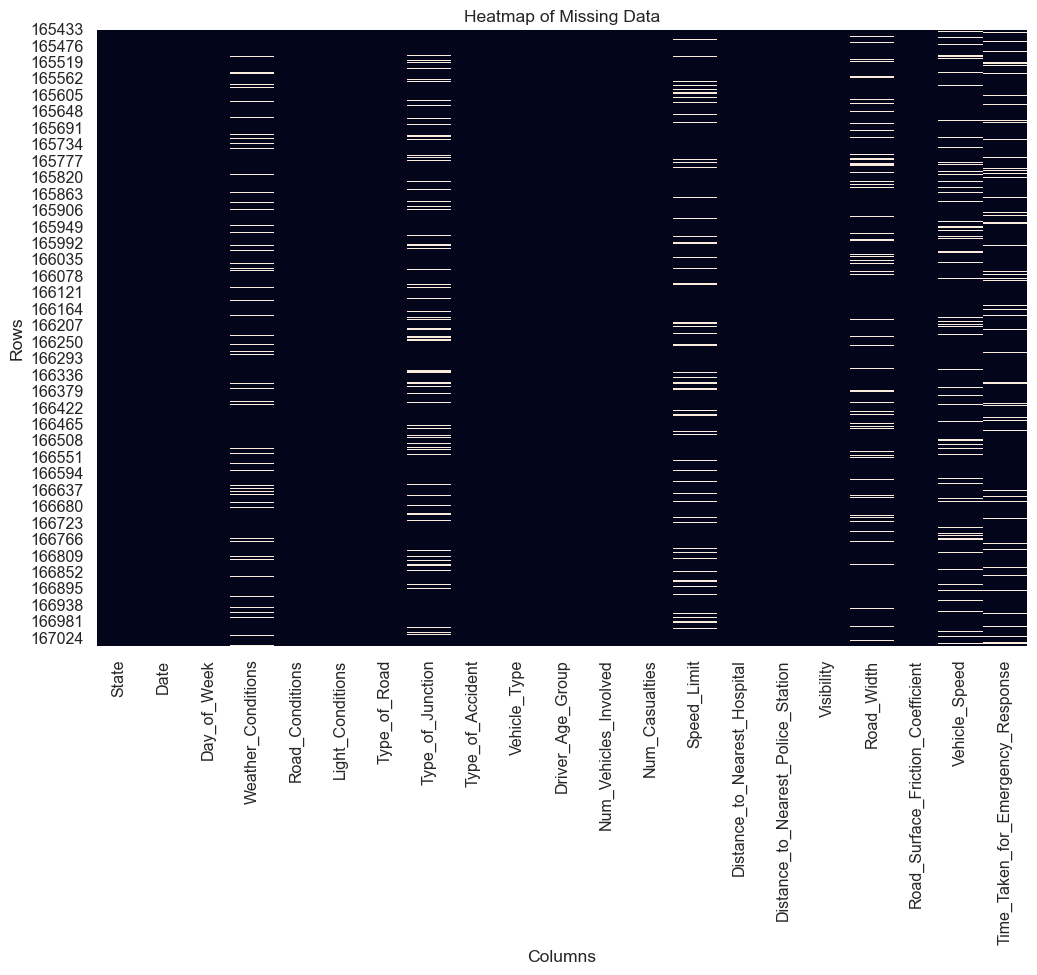

In [67]:
# Calculate and display percentage of missing values
print("Percentage of Missing Values:")
print(np.round(main_df.isna().sum() * 100 / len(main_df), 2))
print("_" * 184)

# Heatmap for Missing Data
# Set a consistent Seaborn style
sns.set(style="whitegrid", palette="Set2", font_scale=1.05)

plt.figure(figsize=(12, 8))
sns.heatmap(main_df.isnull(), cbar=False)  # White areas = missing data
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


> 📌 **Key Insights:**
> - Columns with high percentages of missing values might need to be dropped or filled.
> - The heatmap helps visualize patterns (e.g., if missing values are concentrated in specific rows/columns).

---
### Handling Missing Values in "Weather_Conditions"

We start by inspecting the value counts of the `Weather_Conditions` column, including missing values.  
Since weather is likely to be consistent over a short period within a specific state, we use **forward fill** followed by **backward fill** to impute missing entries within each `State` group.

In [68]:
# Check value counts before cleaning (including NaN)
print("The Values Count of Weather Conditions before Cleaning:")
print(main_df['Weather_Conditions'].value_counts(dropna=False))
print()
print("_" * 184)

# Sort by State and Date to prepare for filling
main_df.sort_values(by=['State', 'Date'], inplace=True)

# Fill missing Weather_Conditions values using forward fill within each State
main_df['Weather_Conditions'] = main_df.groupby('State')['Weather_Conditions'].fillna(method='ffill')

# Apply backward fill as a fallback within each State
main_df['Weather_Conditions'] = main_df.groupby('State')['Weather_Conditions'].fillna(method='bfill')

# Check value counts after filling
print("The Values Count of Weather Conditions after Cleaning:")
print(main_df['Weather_Conditions'].value_counts(dropna=False))
print()

The Values Count of Weather Conditions before Cleaning:
Weather_Conditions
Rainy     313
Snowy     302
Sunny     287
Stormy    285
Foggy     274
NaN       149
Name: count, dtype: int64

________________________________________________________________________________________________________________________________________________________________________________________
The Values Count of Weather Conditions after Cleaning:
Weather_Conditions
Rainy     338
Snowy     337
Stormy    314
Sunny     313
Foggy     308
Name: count, dtype: int64



C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2845616169.py:11: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  main_df['Weather_Conditions'] = main_df.groupby('State')['Weather_Conditions'].fillna(method='ffill')
C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2845616169.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_df['Weather_Conditions'] = main_df.groupby('State')['Weather_Conditions'].fillna(method='ffill')
C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2845616169.py:14: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use

> 📝 **Note:**
> - `ffill` fills missing values using the previous non-null value.
> - `bfill` fills any remaining missing values using the next non-null value.
> - This method maintains logical consistency by filling within the same state and temporal context.

---

### Handling Missing Values in "Type_of_Junction"

We inspect the distribution of values in the `Type_of_Junction` column before cleaning.  
Since the type of junction is usually consistent within a region (state), we fill missing values with the **most frequent value (mode)** within each `State`.  
This approach helps preserve local patterns and avoid introducing bias.

In [69]:
# Value counts before cleaning (including NaNs)
print("The Values Count of Type of Junction before Cleaning:")
print(main_df['Type_of_Junction'].value_counts(dropna=False))
print()
print("_" * 184)

# Fill missing values using the most frequent value (mode) per state
main_df['Type_of_Junction'] = (
    main_df.groupby('State')['Type_of_Junction']
           .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
)

# Value counts after imputation
print("The Values Count of Type of Junction after Cleaning:")
print(main_df['Type_of_Junction'].value_counts(dropna=False))
print()

The Values Count of Type of Junction before Cleaning:
Type_of_Junction
Underpass       255
Intersection    252
Overpass        251
Roundabout      237
Crossroads      232
T-Junction      228
NaN             155
Name: count, dtype: int64

________________________________________________________________________________________________________________________________________________________________________________________
The Values Count of Type of Junction after Cleaning:
Type_of_Junction
Intersection    282
Overpass        282
Underpass       274
Roundabout      264
Crossroads      263
T-Junction      245
Name: count, dtype: int64



> 📌 **Note:**
> - Using `mode()` ensures the most common junction type in each state is used.
> - If the mode is not available (in rare cases), we use `'Unknown'` as a fallback.

---
### Cleaning Missing Values in Numerical Columns

We continue our data cleaning process by focusing on **numerical columns** with missing values.  
First, we identify which numerical columns still contain null values and examine their statistical properties.

In [70]:
# First Cell: Identify and describe numerical columns with missing values

# Identify columns that still contain missing values
missing_columns = main_df.isna().sum() > 0
missing_columns = missing_columns.index[missing_columns]  # Extract column names

# Display descriptive statistics for numerical columns with missing values
print("Summary of Missed Numerical Values before Cleaning:\n")
main_df[missing_columns].describe().T  # Transpose for better readability

Summary of Missed Numerical Values before Cleaning:



count       mean        std        min  \
Speed_Limit                        1457.0  50.144132  11.869475  30.000000   
Road_Width                         1453.0   6.537440   2.011750   3.000363   
Vehicle_Speed                      1433.0  49.933008  29.279972   0.000000   
Time_Taken_for_Emergency_Response  1444.0  17.771576   7.245455   5.032373   

                                         25%        50%        75%         max  
Speed_Limit                        40.000000  50.000000  60.000000   70.000000  
Road_Width                          4.773072   6.623199   8.284306    9.996583  
Vehicle_Speed                      24.000000  49.000000  76.000000  100.000000  
Time_Taken_for_Emergency_Response  11.501425  17.498544  24.183088   29.981212

> 🧠 **Insight:** We use the descriptive stats to choose the best imputation method (mean or median) depending on the distribution.

#### Filling Missing Values in Numerical Columns

We fill the missing values using:
- **Mean** for normally distributed features (`Speed_Limit`, `Road_Width`).
- **Median** for skewed features (`Vehicle_Speed`, `Time_Taken_for_Emergency_Response`).

In [71]:
# Second Cell: Fill missing values appropriately

# Fill with mean
main_df['Speed_Limit'].fillna(main_df['Speed_Limit'].mean(), inplace=True)
main_df['Road_Width'].fillna(main_df['Road_Width'].mean(), inplace=True)

# Fill with median
main_df['Vehicle_Speed'].fillna(main_df['Vehicle_Speed'].median(), inplace=True)
main_df['Time_Taken_for_Emergency_Response'].fillna(main_df['Time_Taken_for_Emergency_Response'].median(), inplace=True)

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1911547461.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Speed_Limit'].fillna(main_df['Speed_Limit'].mean(), inplace=True)
C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1911547461.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

> **Why median for some columns?**  
> Median is more robust to outliers in skewed distributions, while mean works better for symmetric distributions.

#### Verifying After Cleaning

We verify that all previously identified columns are now clean by rechecking their statistical summary.


In [72]:
# Third Cell: Confirm missing values have been handled
print("Summary of Missed Numerical Values after Cleaning:\n")
main_df[missing_columns].describe().T

Summary of Missed Numerical Values after Cleaning:



count       mean        std        min  \
Speed_Limit                        1610.0  50.144132  11.291046  30.000000   
Road_Width                         1610.0   6.537440   1.911082   3.000363   
Vehicle_Speed                      1610.0  49.830435  27.624116   0.000000   
Time_Taken_for_Emergency_Response  1610.0  17.743425   6.862030   5.032373   

                                         25%        50%        75%         max  
Speed_Limit                        41.000000  50.144132  59.000000   70.000000  
Road_Width                          4.939065   6.537440   8.113626    9.996583  
Vehicle_Speed                      28.000000  49.000000  73.000000  100.000000  
Time_Taken_for_Emergency_Response  12.464749  17.498544  23.534142   29.981212

> 🎯 **Result:** All missing values in the selected numerical columns have been successfully filled.

---
### Final Check: Heatmap of Missing Values

To ensure our data is now clean, we visualize the dataset again using a **heatmap** to confirm that all missing values have been handled.

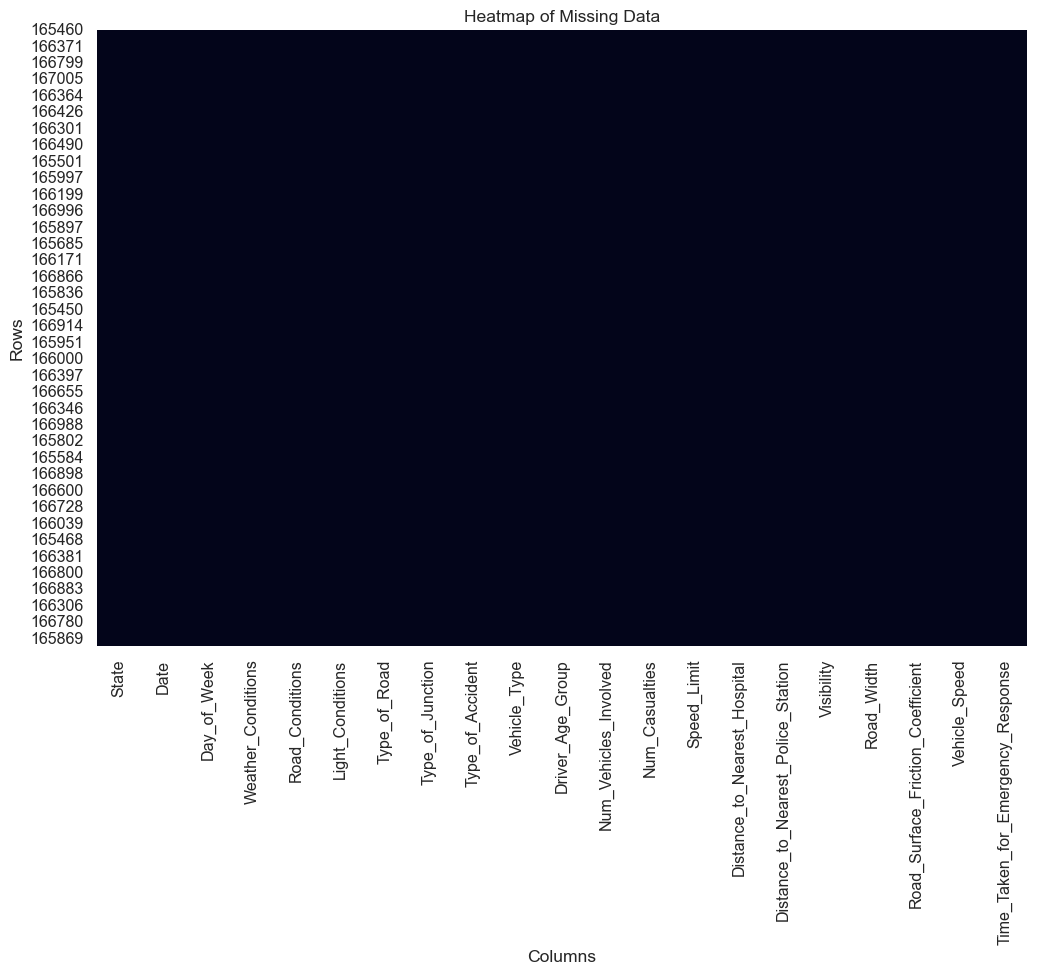

In [73]:
# Heatmap for Final Missing Data Check

sns.set(style="whitegrid", palette="Set2", font_scale=1.05)  # Set plot style

plt.figure(figsize=(12, 8))
sns.heatmap(main_df.isnull(), cbar=False)  # White = missing, so expect no white
plt.title('Heatmap of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


> **Clean Result Expected:**  
> The heatmap should show a solid block (no white areas), indicating that all missing values have been successfully imputed.

---
### Outlier Detection using Z-Score

Outliers can significantly skew our analysis and distort statistical models.  
To detect outliers in **numerical columns**, we apply the **Z-Score** method:

- A Z-score > 3 (or < -3) is considered an outlier.
- We only apply this to columns with `float64` data type (i.e., continuous numerical features).


In [74]:
# Select numerical features only (float64)
numerical_features = main_df.select_dtypes(include=['float64']).columns.to_list()

# Compute Z-scores for each value in the selected numerical features
z_scores = main_df[numerical_features].apply(zscore)

# Count the number of outliers (Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).sum()

# Display results
print("Outliers detected using Z-Score:\n", outliers)


Outliers detected using Z-Score:
 Speed_Limit                           0
Distance_to_Nearest_Hospital          0
Distance_to_Nearest_Police_Station    0
Visibility                            0
Road_Width                            0
Road_Surface_Friction_Coefficient     0
Vehicle_Speed                         0
Time_Taken_for_Emergency_Response     0
dtype: int64


> **Result:** No outliers were detected in the dataset using the Z-Score method.

---
### Saving the Cleaned Dataset

After completing the data cleaning process (handling missing values, encoding categorical data, detecting outliers, etc.),  
we now export the cleaned dataset to a new CSV file for future use in analysis or modeling.

In [75]:
# Save the cleaned DataFrame to a new CSV file
main_df.to_csv(r"Cleaned Data/cleaned_Dataset.csv")

> ✅ **File Saved:** The cleaned dataset is now stored in the `Cleaned Data` directory as `cleaned_Dataset.csv`.

---
## Exploratory Data Analysis (EDA)

After cleaning the dataset, we perform Exploratory Data Analysis (EDA) to understand patterns, relationships, and distributions within the data.  
This step is essential for:

- Understanding the **central tendencies** and **variability** of features.
- Identifying **outliers**, **skewness**, and **data ranges**.
- Exploring **relationships between variables** using visualizations.
- Detecting any further issues before modeling.

We divide EDA into the following parts:

1. Central Tendency (Mean, Median, Mode)  
2. Dispersion (Std, Variance, IQR)  
3. Distribution Summary (Min, Max, Percentiles)  
4. Unique Value Counts  
5. Histograms and Boxplots for numerical features  
6. Pairwise Scatter Plots  
7. Boxplots of numerical features vs categorical features  
8. Correlation Heatmap  
9. Countplots for categorical features  
10. Barplot of average emergency response time per weekday


---
### Central Tendency

To understand the typical values in our dataset, we calculate:
- **Mean**: Average value for numerical features.
- **Median**: Middle value (less affected by outliers).
- **Mode**: Most frequent value (for both numerical and categorical).


In [76]:
# Central Tendency
mean_values = main_df[numerical_features].mean()
median_values = main_df[numerical_features].median()
not_num_columns = [col for col in main_df.columns if col not in numerical_features]
mode_values = main_df[not_num_columns].mode().iloc[0]  # First mode for each column

# Display Results
print("### Central Tendency ###")
print(f"Mean:\n{mean_values}")
print("_"*182)
print(f"\nMedian:\n{median_values}")
print("_"*182)
print(f"\nMode:\n{mode_values}")

### Central Tendency ###
Mean:
Speed_Limit                            50.144132
Distance_to_Nearest_Hospital            5.062241
Distance_to_Nearest_Police_Station      5.049247
Visibility                            553.774075
Road_Width                              6.537440
Road_Surface_Friction_Coefficient       0.549663
Vehicle_Speed                          49.830435
Time_Taken_for_Emergency_Response      17.743425
dtype: float64
______________________________________________________________________________________________________________________________________________________________________________________

Median:
Speed_Limit                            50.144132
Distance_to_Nearest_Hospital            5.151083
Distance_to_Nearest_Police_Station      4.977115
Visibility                            557.361549
Road_Width                              6.537440
Road_Surface_Friction_Coefficient       0.550753
Vehicle_Speed                          49.000000
Time_Taken_for_Emergency_Re

---
### Dispersion (Spread of Data)

Dispersion shows how much the data varies. We compute:
- **Standard Deviation**: How spread out values are from the mean.
- **Variance**: Square of standard deviation.
- **Range**: Difference between max and min.
- **IQR (Interquartile Range)**: Spread of middle 50% of the data.

In [77]:
# Dispersion
std_dev = main_df[numerical_features].std()
variance = main_df[numerical_features].var()
range_values = main_df[numerical_features].max() - main_df[numerical_features].min()
iqr = main_df[numerical_features].quantile(0.75) - main_df[numerical_features].quantile(0.25)

print("\n### Dispersion ###")
print(f"Standard Deviation:\n{std_dev}")
print("_"*182)
print(f"\nVariance:\n{variance}")
print("_"*182)
print(f"\nRange:\n{range_values}")
print("_"*182)
print(f"\nInterquartile Range (IQR):\n{iqr}")


### Dispersion ###
Standard Deviation:
Speed_Limit                            11.291046
Distance_to_Nearest_Hospital            2.890145
Distance_to_Nearest_Police_Station      2.800700
Visibility                            258.589644
Road_Width                              1.911082
Road_Surface_Friction_Coefficient       0.259722
Vehicle_Speed                          27.624116
Time_Taken_for_Emergency_Response       6.862030
dtype: float64
______________________________________________________________________________________________________________________________________________________________________________________

Variance:
Speed_Limit                             127.487714
Distance_to_Nearest_Hospital              8.352938
Distance_to_Nearest_Police_Station        7.843919
Visibility                            66868.603823
Road_Width                                3.652233
Road_Surface_Friction_Coefficient         0.067455
Vehicle_Speed                           763.091802
Ti

---
### Distribution Summary

We explore the distribution of numerical values using:
- **Minimum and Maximum values**
- **Key Percentiles** (25th, 50th, and 75th)

In [78]:
# Distribution
min_values = main_df[numerical_features].min()
max_values = main_df[numerical_features].max()
percentiles = main_df[numerical_features].quantile([0.25, 0.5, 0.75])
percentiles.index = ['25%', '50%', '75%']

print("\n### Distribution ###")
print(f"Minimum Values:\n{min_values}")
print("_"*182)
print(f"\nMaximum Values:\n{max_values}")
print("_"*182)
print("\nPercentiles:")
percentiles.T


### Distribution ###
Minimum Values:
Speed_Limit                            30.000000
Distance_to_Nearest_Hospital            0.113713
Distance_to_Nearest_Police_Station      0.100520
Visibility                            100.224514
Road_Width                              3.000363
Road_Surface_Friction_Coefficient       0.100261
Vehicle_Speed                           0.000000
Time_Taken_for_Emergency_Response       5.032373
dtype: float64
______________________________________________________________________________________________________________________________________________________________________________________

Maximum Values:
Speed_Limit                            70.000000
Distance_to_Nearest_Hospital            9.999620
Distance_to_Nearest_Police_Station      9.998113
Visibility                            999.931342
Road_Width                              9.996583
Road_Surface_Friction_Coefficient       0.999489
Vehicle_Speed                         100.000000
Time_Taken_f

25%         50%         75%
Speed_Limit                          41.000000   50.144132   59.000000
Distance_to_Nearest_Hospital          2.549658    5.151083    7.563470
Distance_to_Nearest_Police_Station    2.708608    4.977115    7.474726
Visibility                          327.701610  557.361549  781.561590
Road_Width                            4.939065    6.537440    8.113626
Road_Surface_Friction_Coefficient     0.315058    0.550753    0.774580
Vehicle_Speed                        28.000000   49.000000   73.000000
Time_Taken_for_Emergency_Response    12.464749   17.498544   23.534142

---
### Unique Values in Columns

Understanding how many unique values are in each column helps identify:
- Potential categorical columns
- Columns suitable for encoding or grouping

In [79]:
# Unique Values
unique_values_count = main_df.nunique()
true_columns = (unique_values_count < 10)
unique_values = true_columns.index[true_columns].to_list()
unique_values = [main_df[col].value_counts() for col in unique_values]

print("\n### Unique Values ###\n")
print(f"Unique Values Count:\n{unique_values_count}")
print()
print("_"*182)
print()
print("Unique Values:")
for u in unique_values:
    print(f"{u}\n")


### Unique Values ###

Unique Values Count:
State                                   50
Date                                  1610
Day_of_Week                              7
Weather_Conditions                       5
Road_Conditions                          5
Light_Conditions                         4
Type_of_Road                             5
Type_of_Junction                         6
Type_of_Accident                         7
Vehicle_Type                             5
Driver_Age_Group                         4
Num_Vehicles_Involved                    5
Num_Casualties                           4
Speed_Limit                             42
Distance_to_Nearest_Hospital          1610
Distance_to_Nearest_Police_Station    1610
Visibility                            1610
Road_Width                            1454
Road_Surface_Friction_Coefficient     1610
Vehicle_Speed                          101
Time_Taken_for_Emergency_Response     1445
dtype: int64

______________________________________

---
### Visualizing Distributions: Histograms & Boxplots

For each numerical feature:
- A **histogram** shows the frequency distribution.
- A **boxplot** reveals the spread and potential outliers.

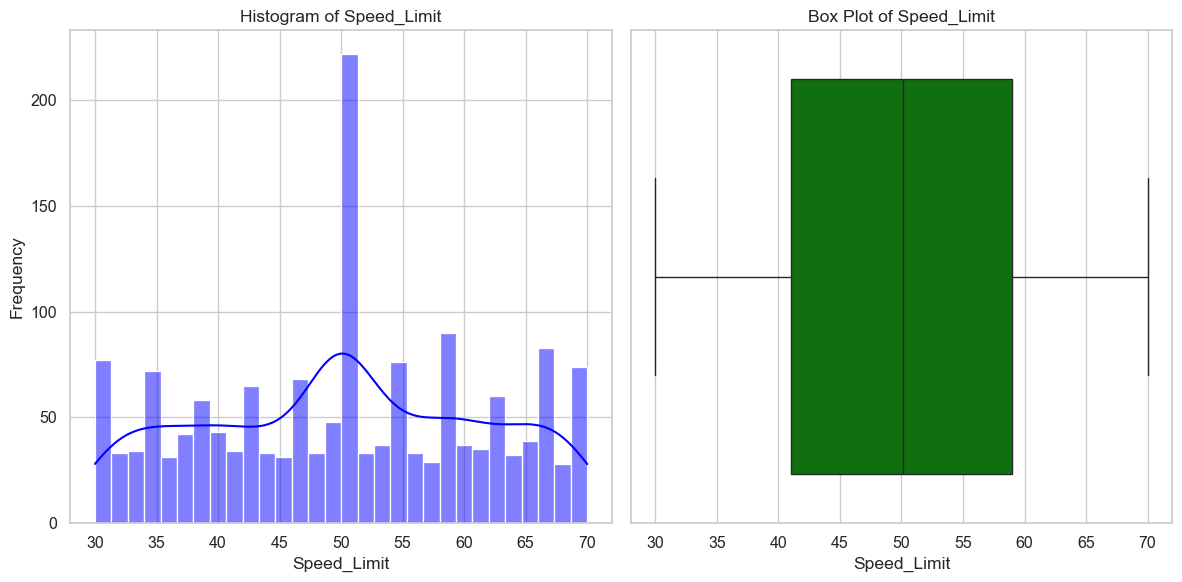

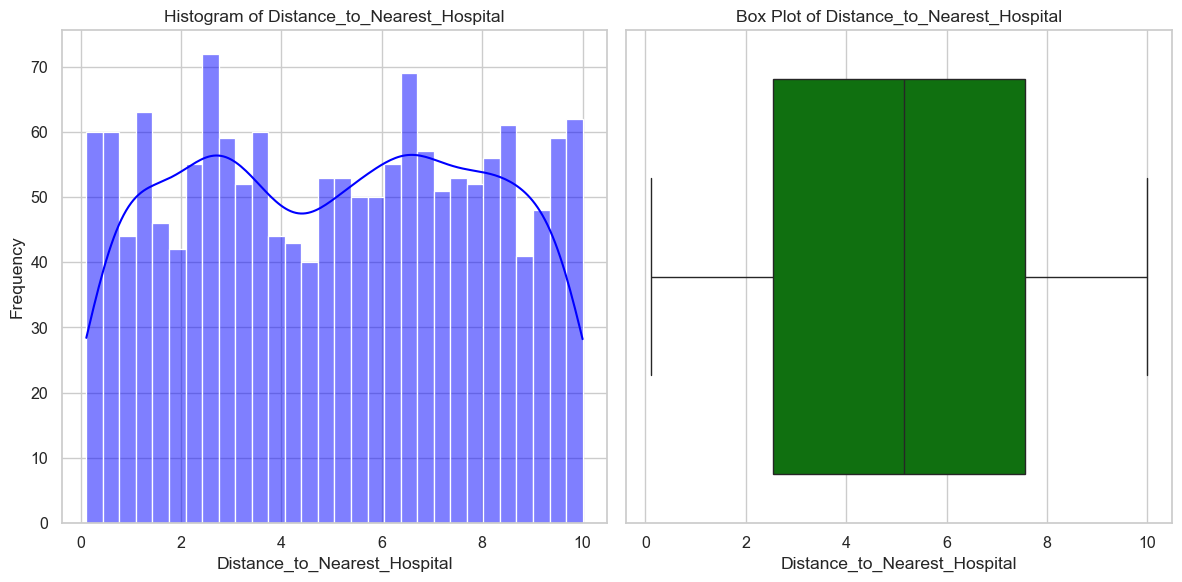

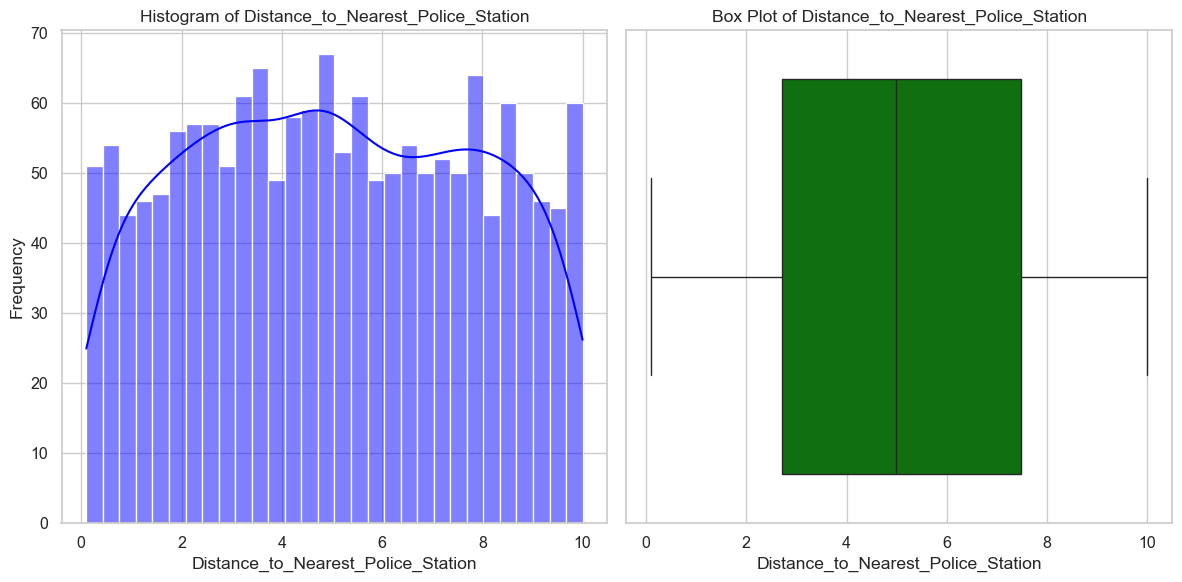

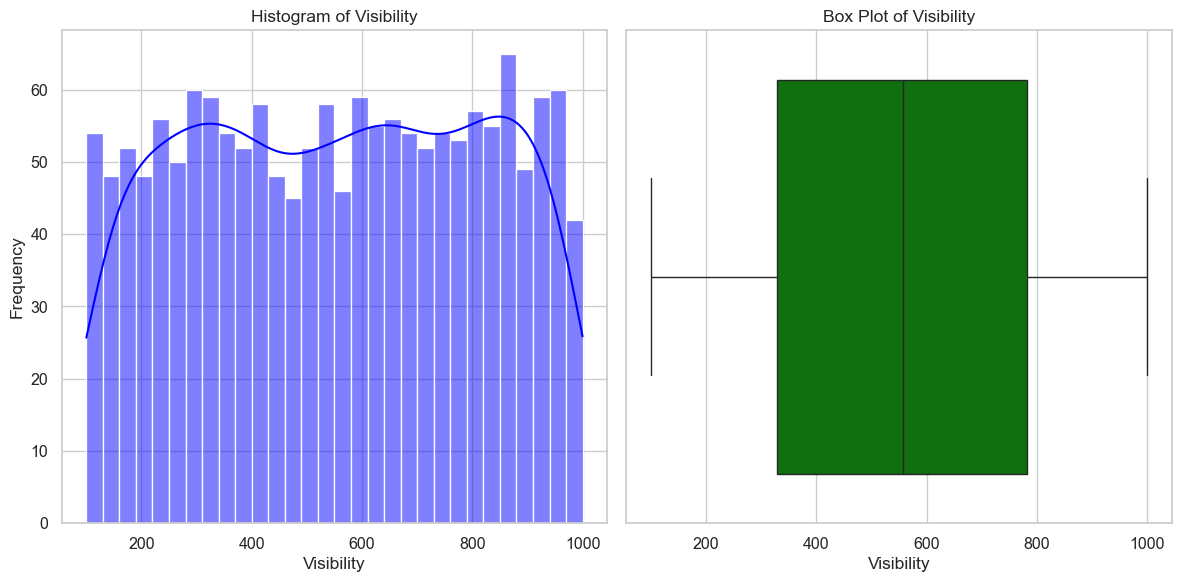

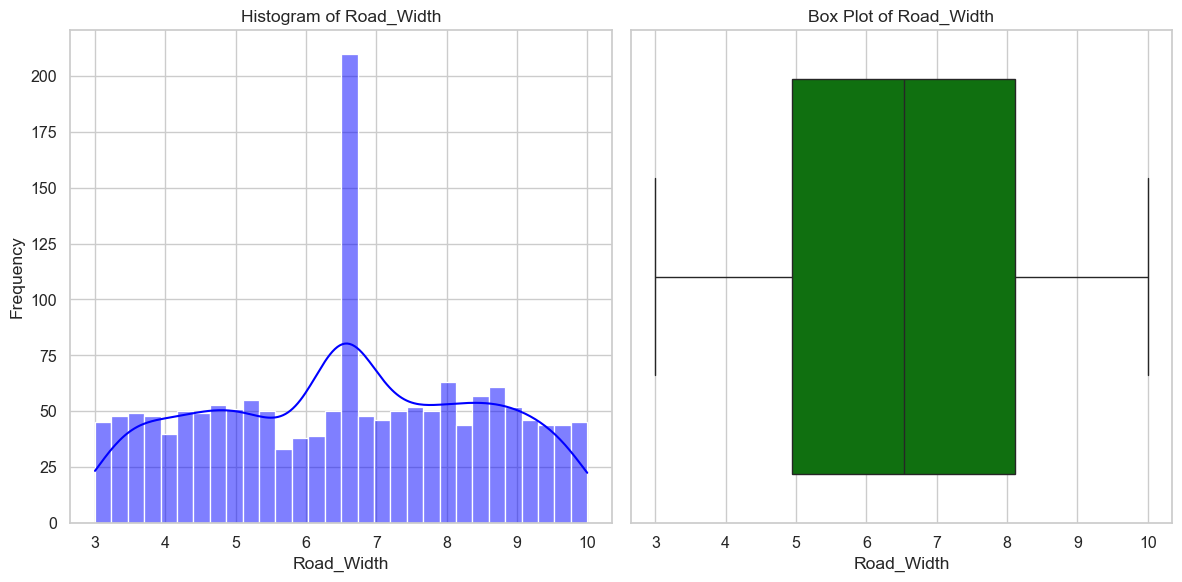

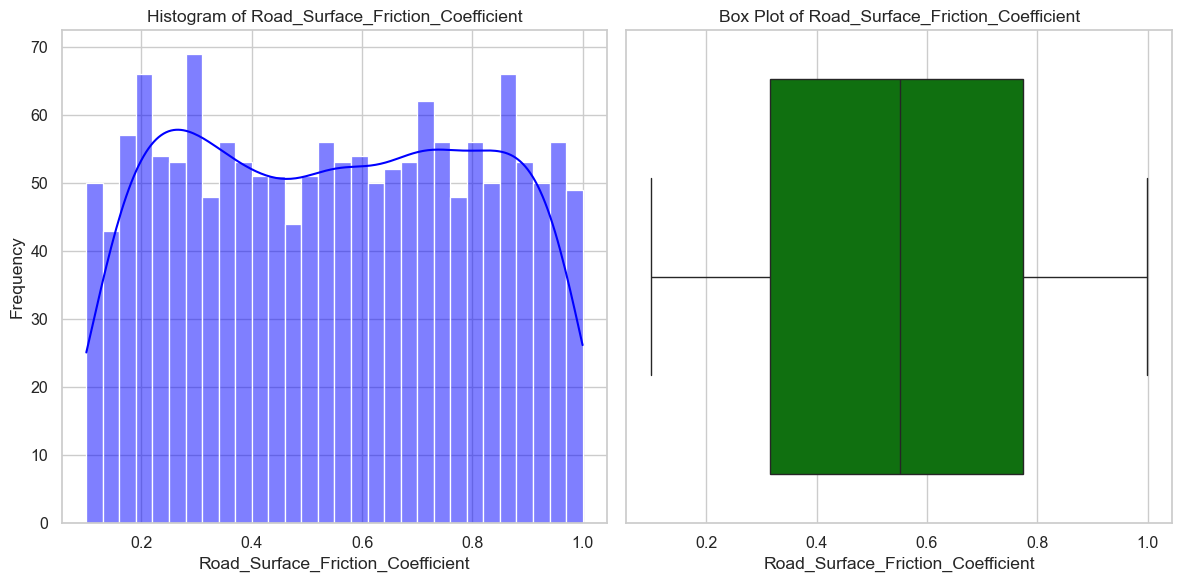

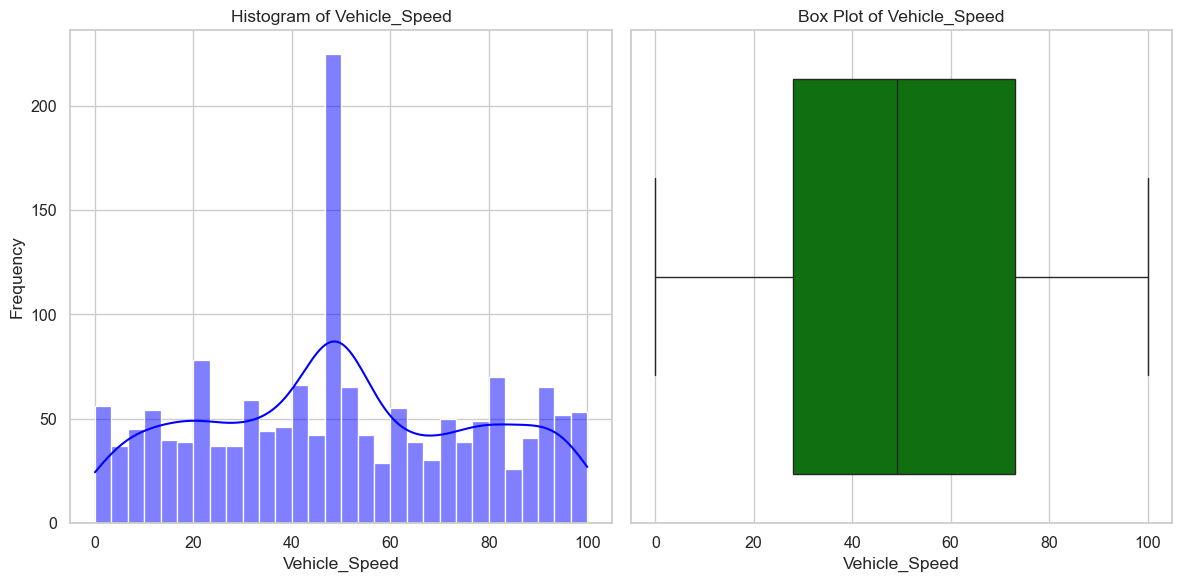

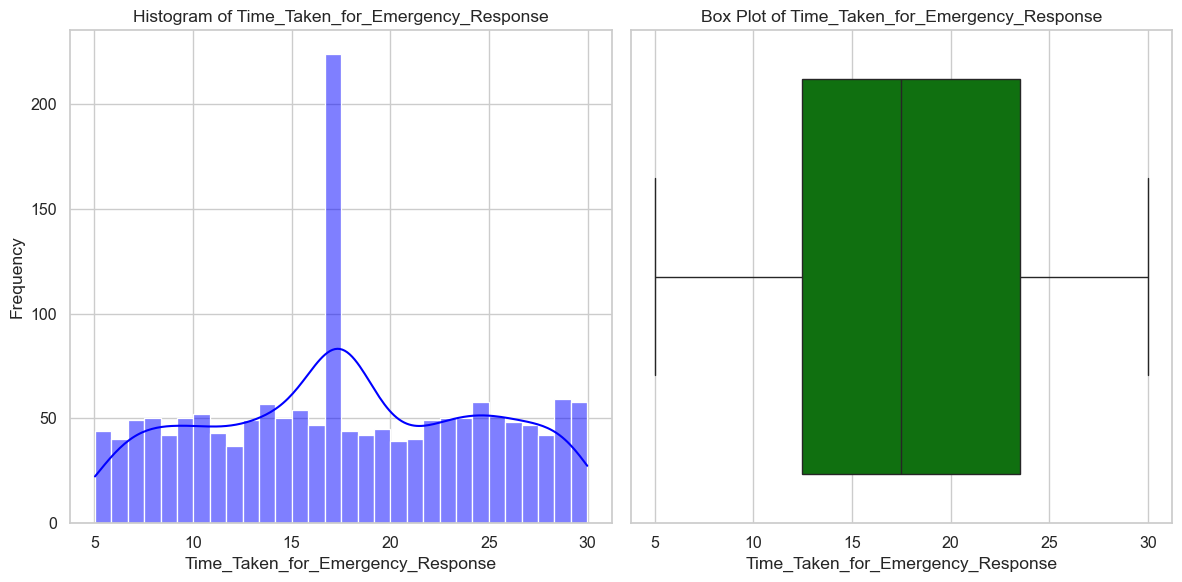

In [80]:
# Plot histograms and box plots for numerical features

for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(main_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=main_df[feature], color='green')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()

---
### Pairwise Relationships Between Numerical Features

We visualize the relationships between pairs of numerical variables using a pairplot.  
This helps detect potential linear or nonlinear relationships and clusters.

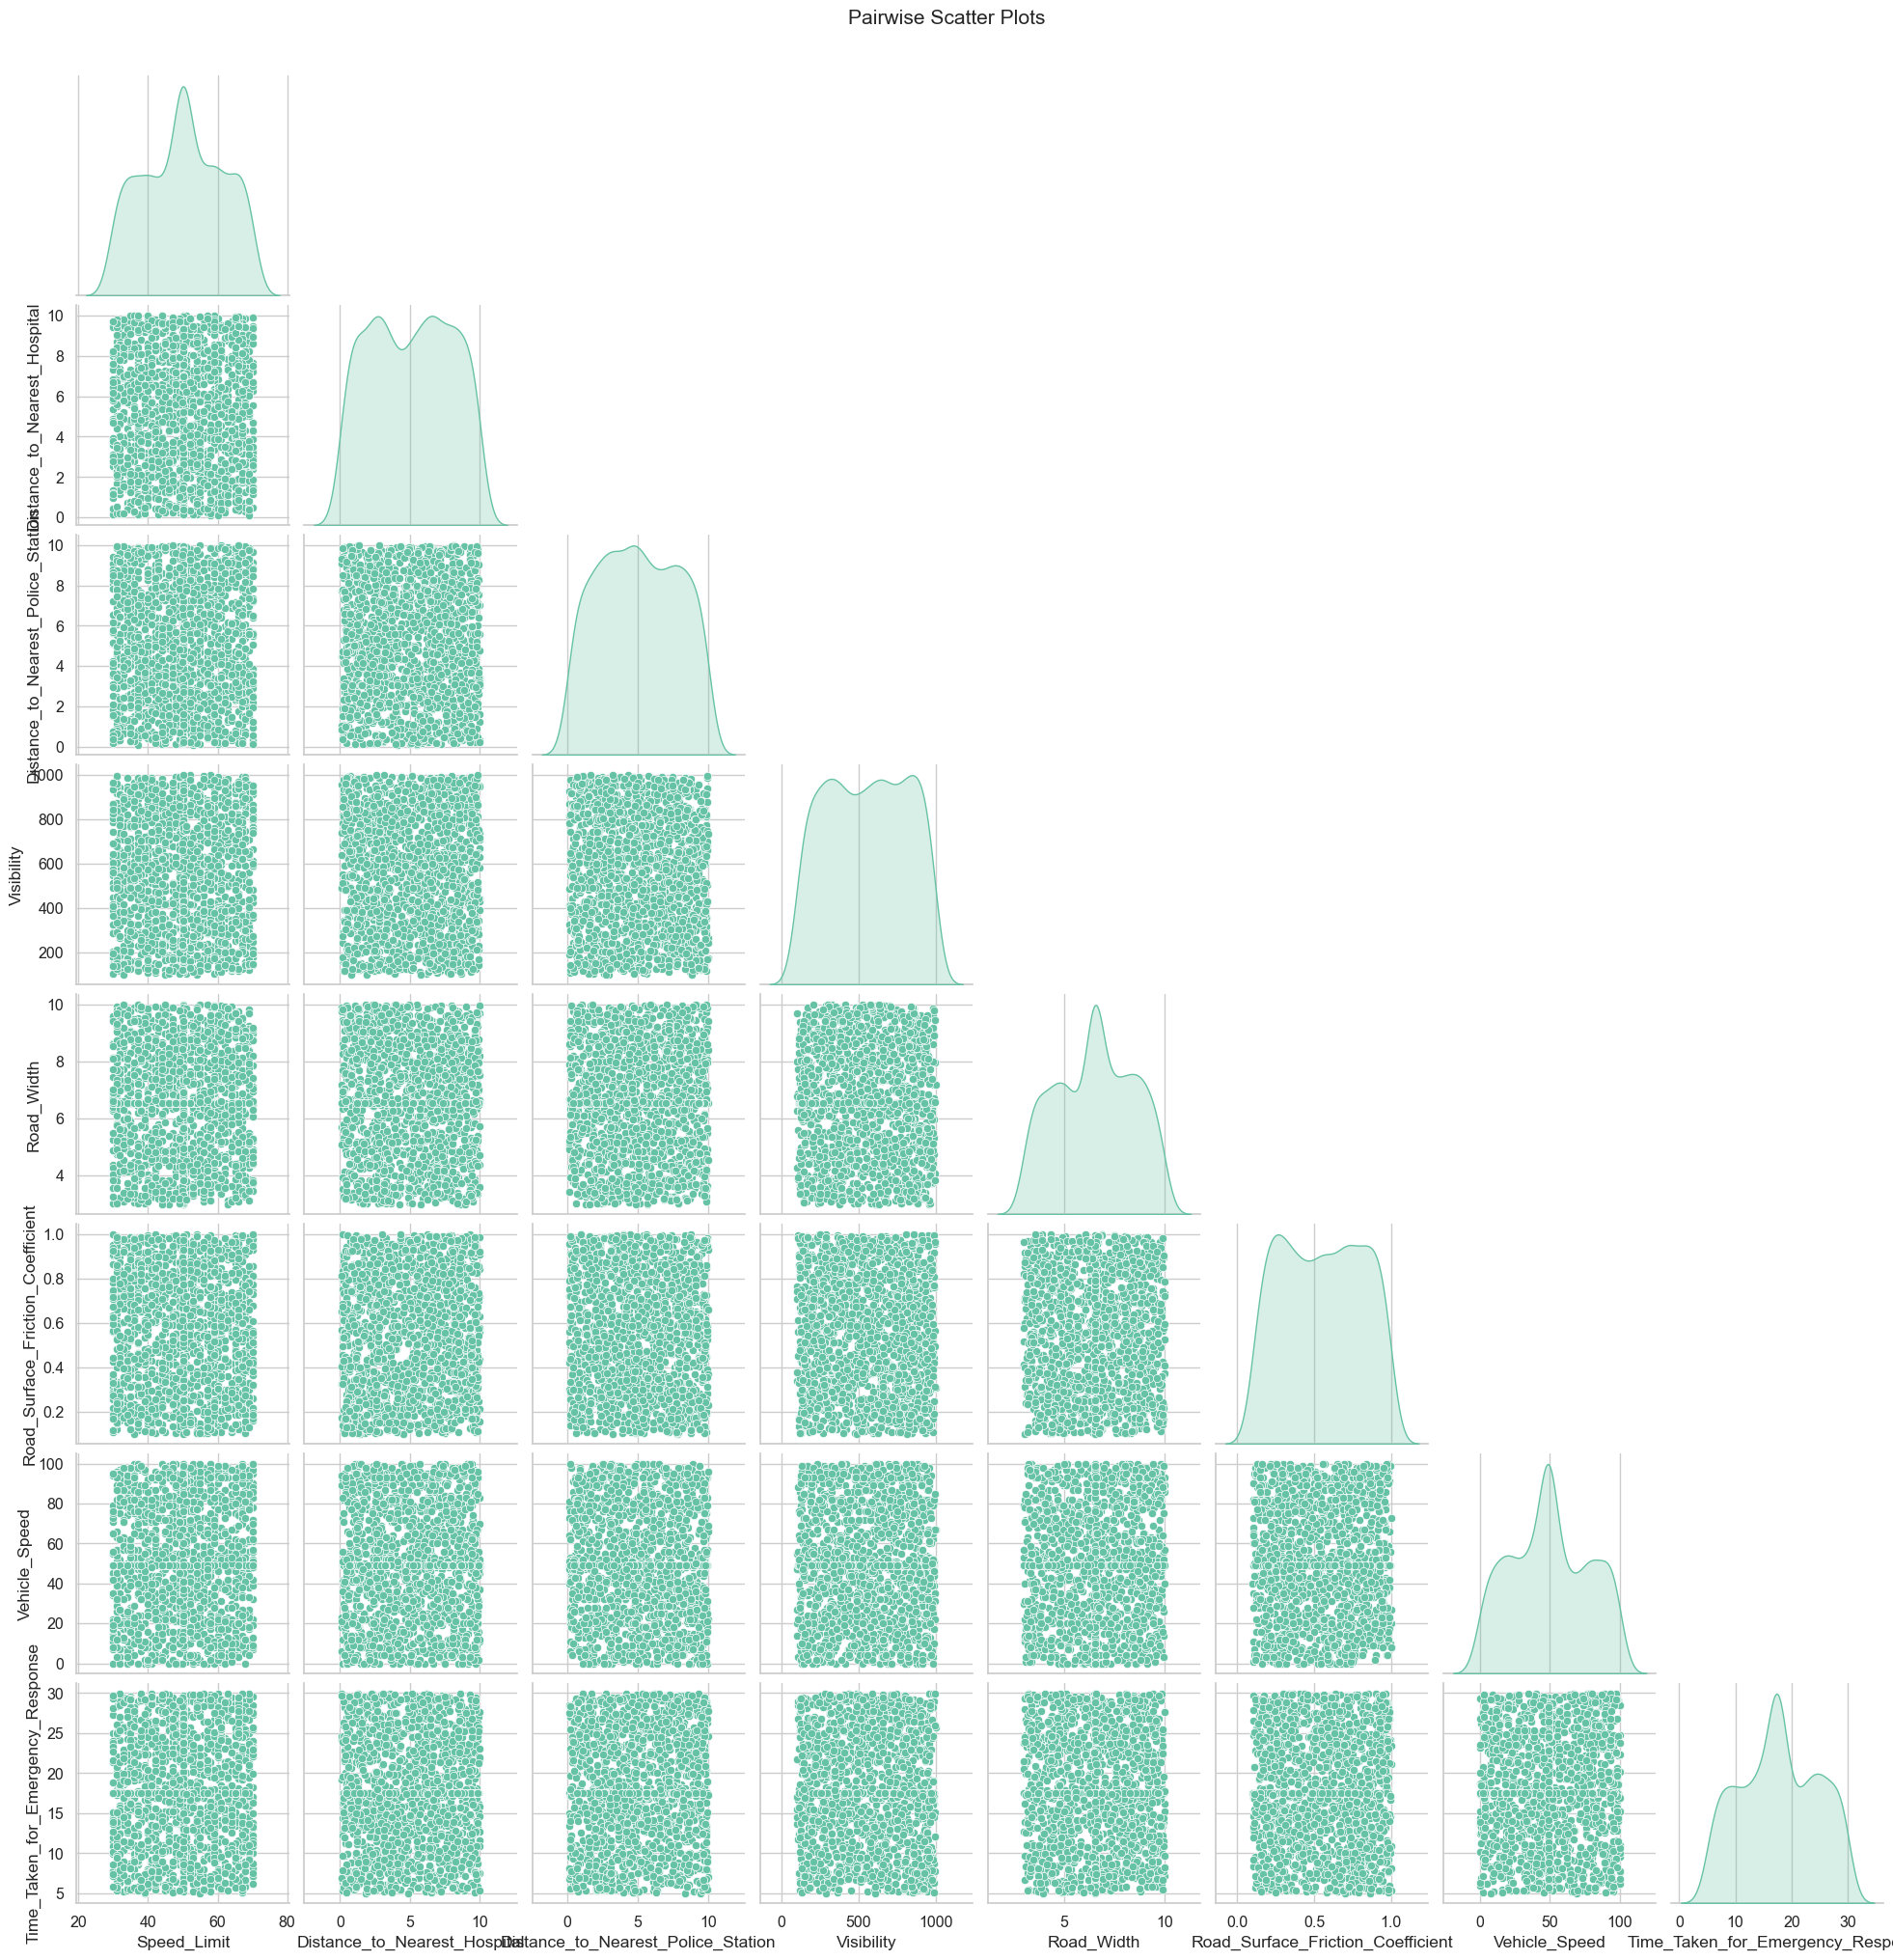

In [ ]:
# Pairwise scatter plots for numerical features
sns.pairplot(main_df[numerical_features], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

---
### Numerical Features by Categorical Groups

We analyze how numerical features vary across different categories using boxplots.  
This helps spot trends, medians, and outliers grouped by each category.

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


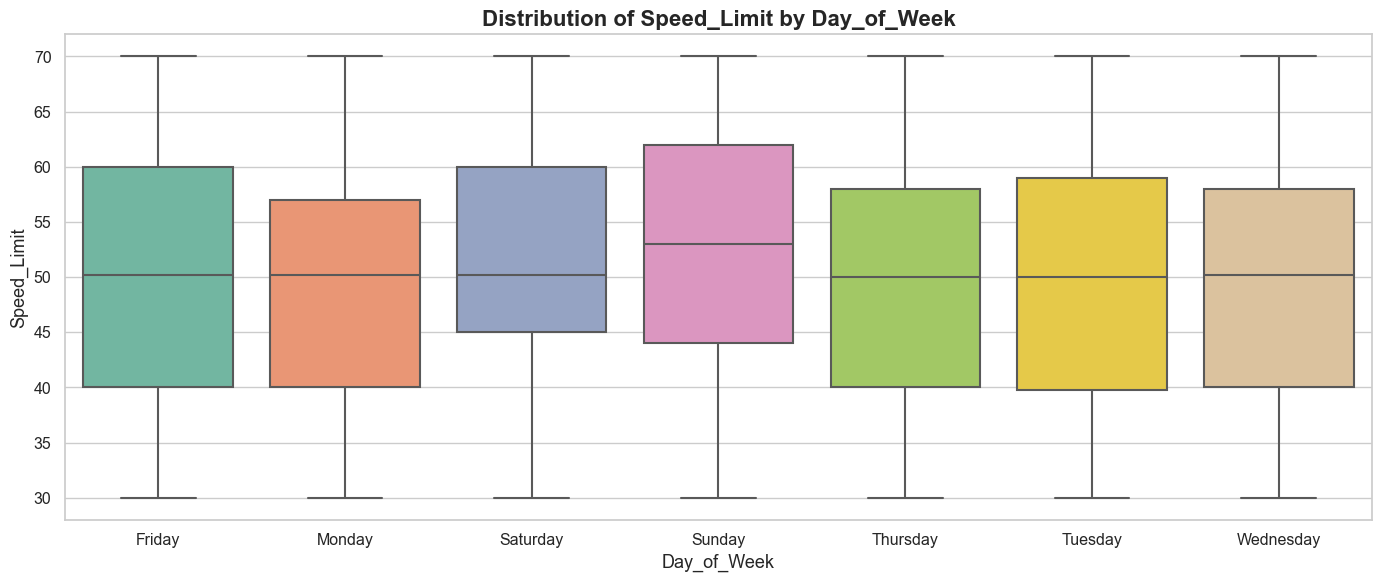

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


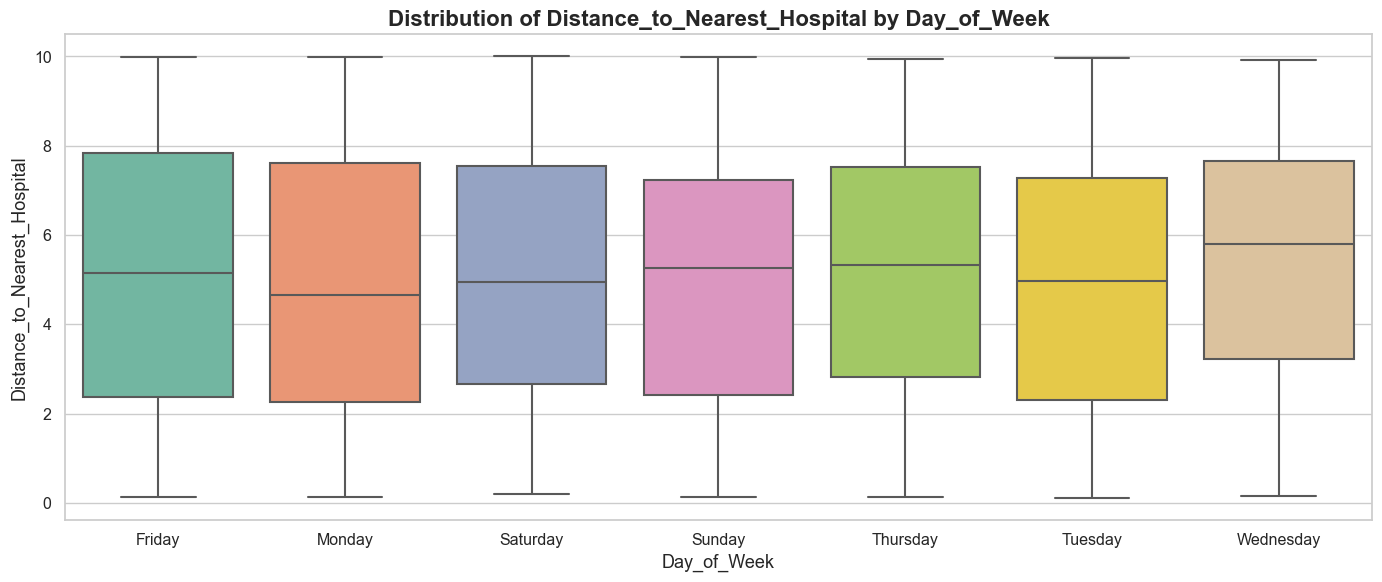

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


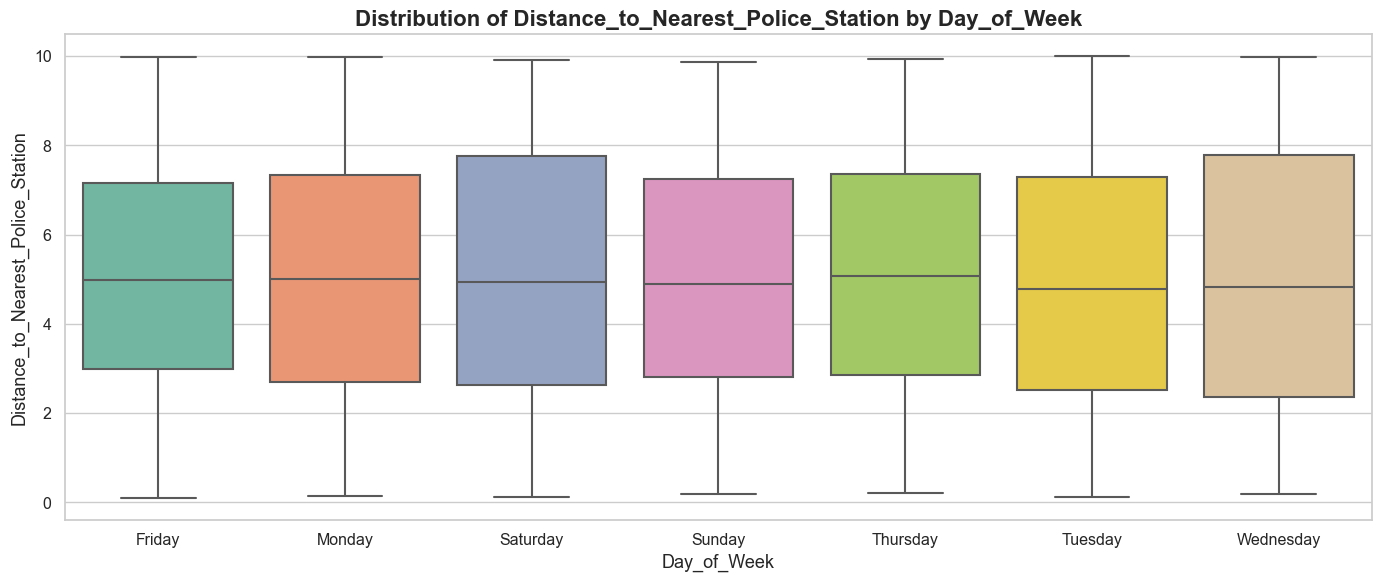

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


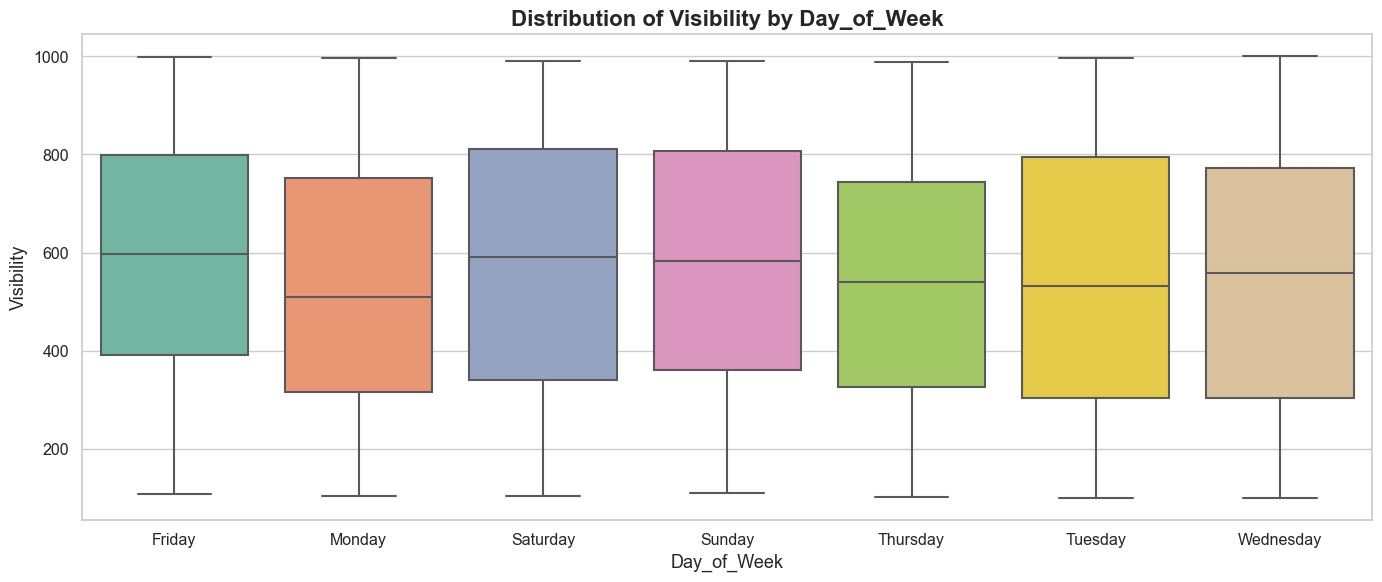

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


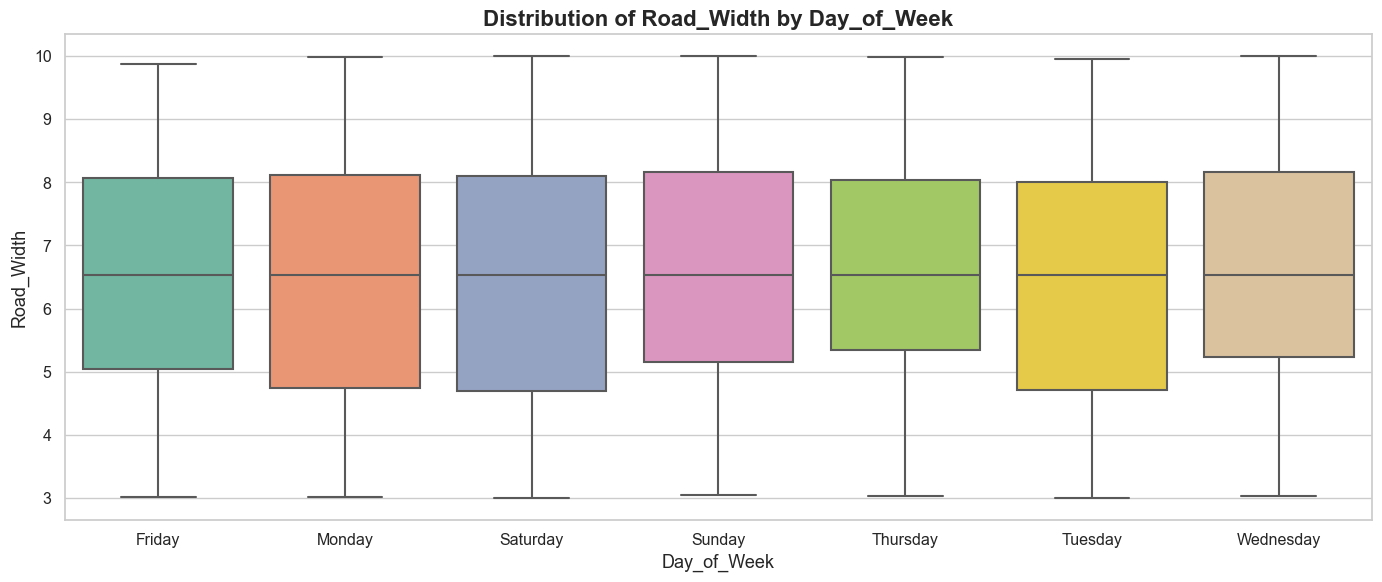

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


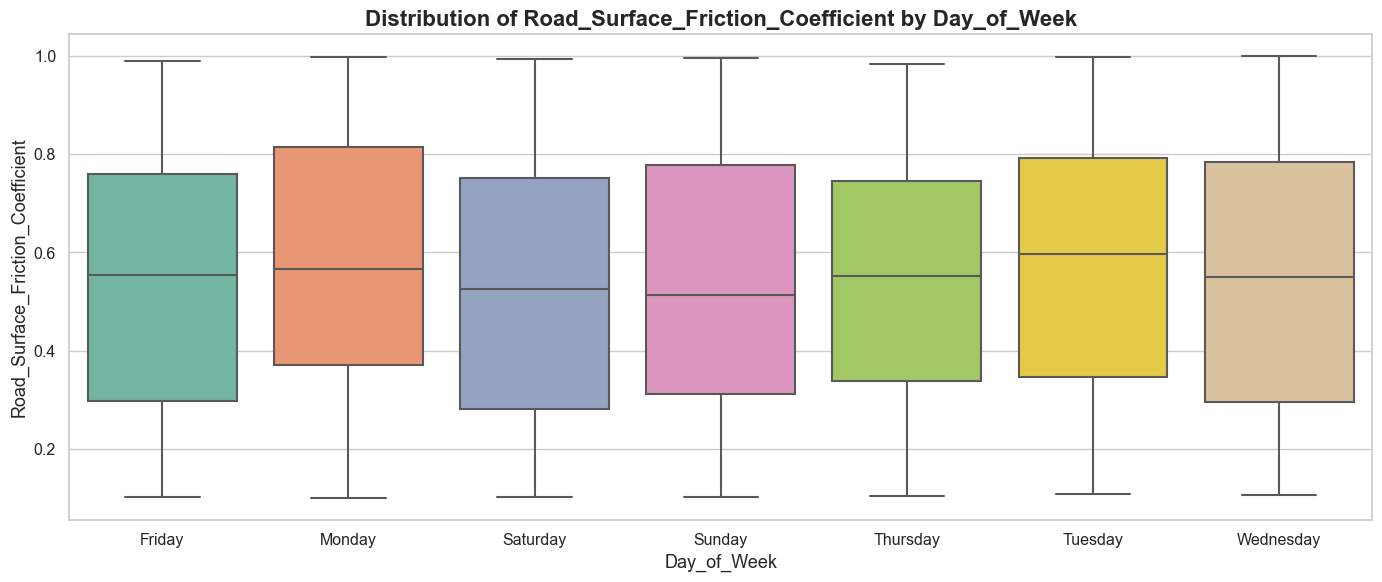

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


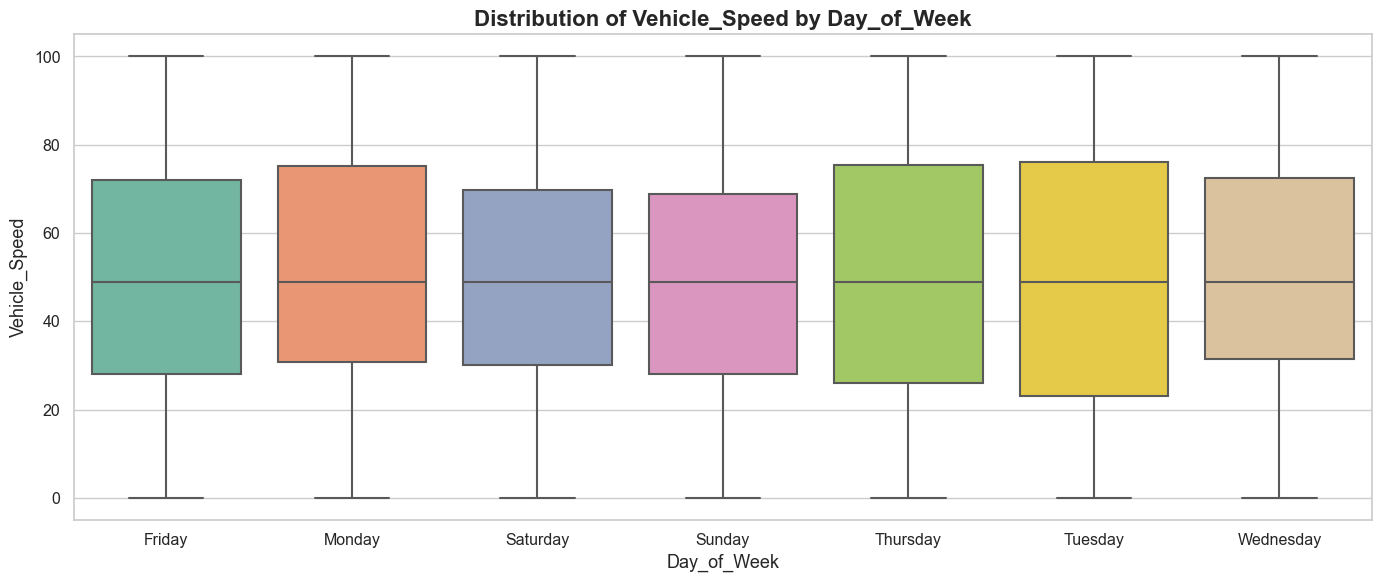

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


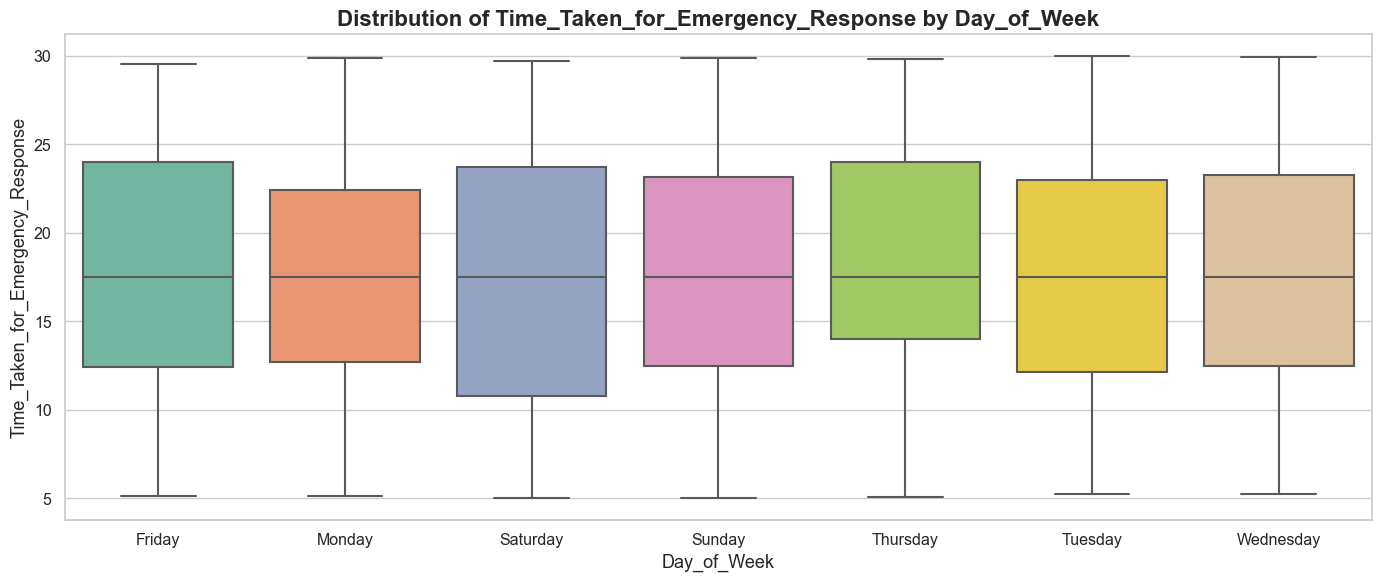

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


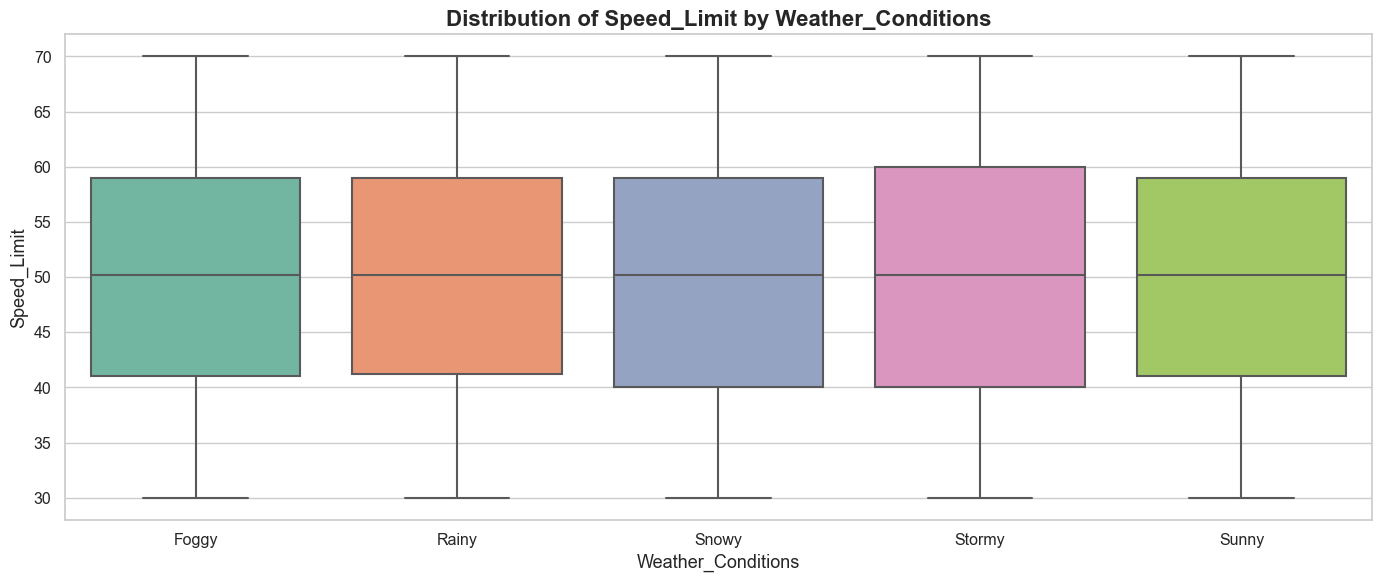

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


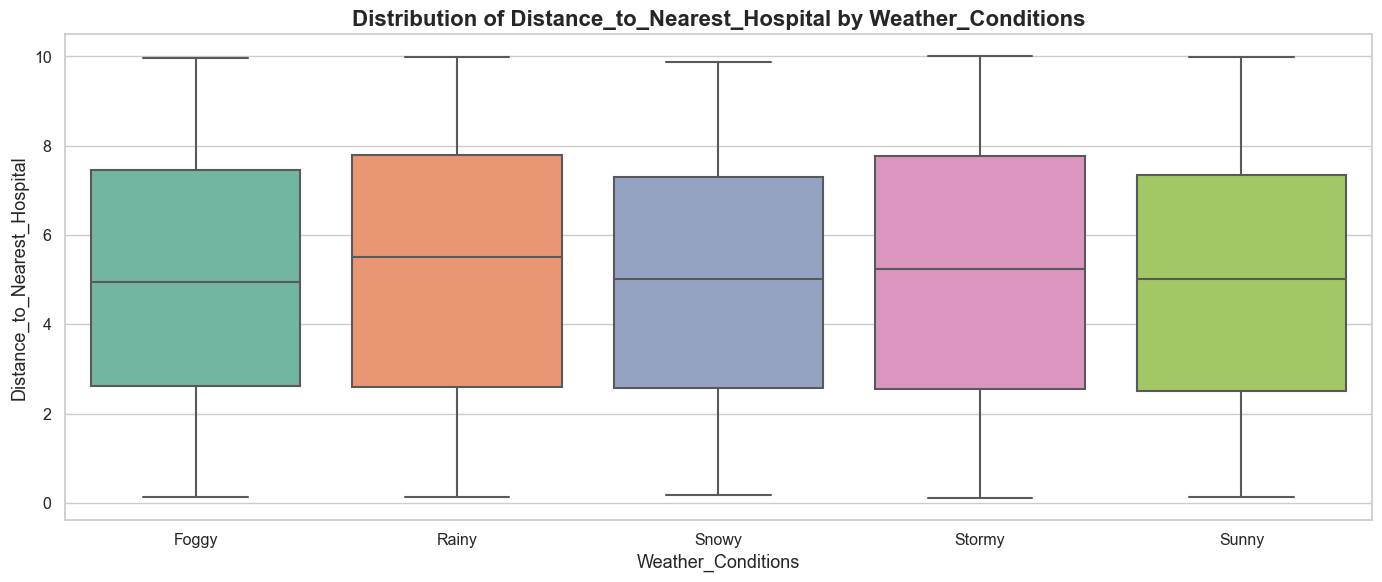

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


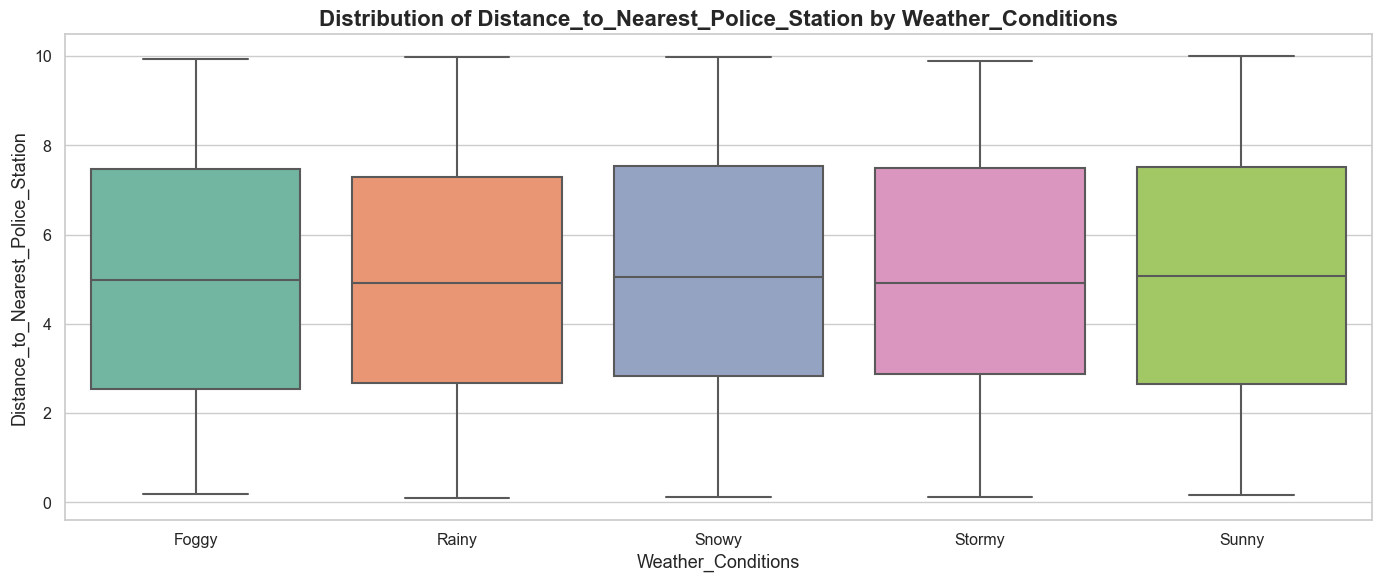

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


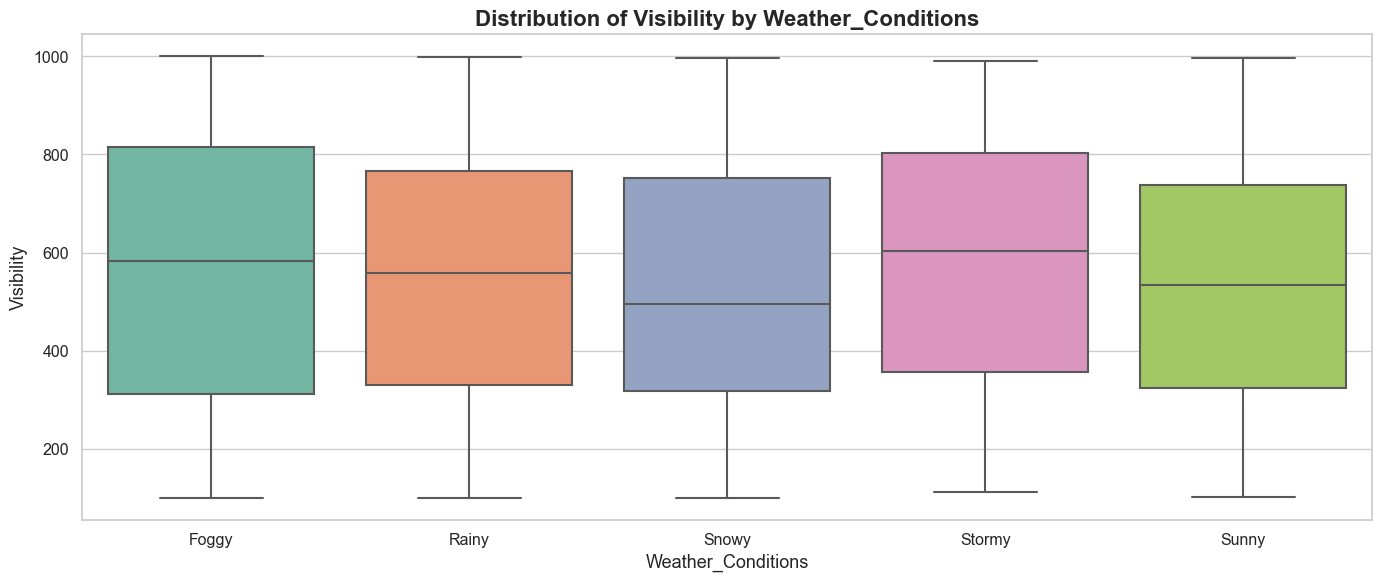

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


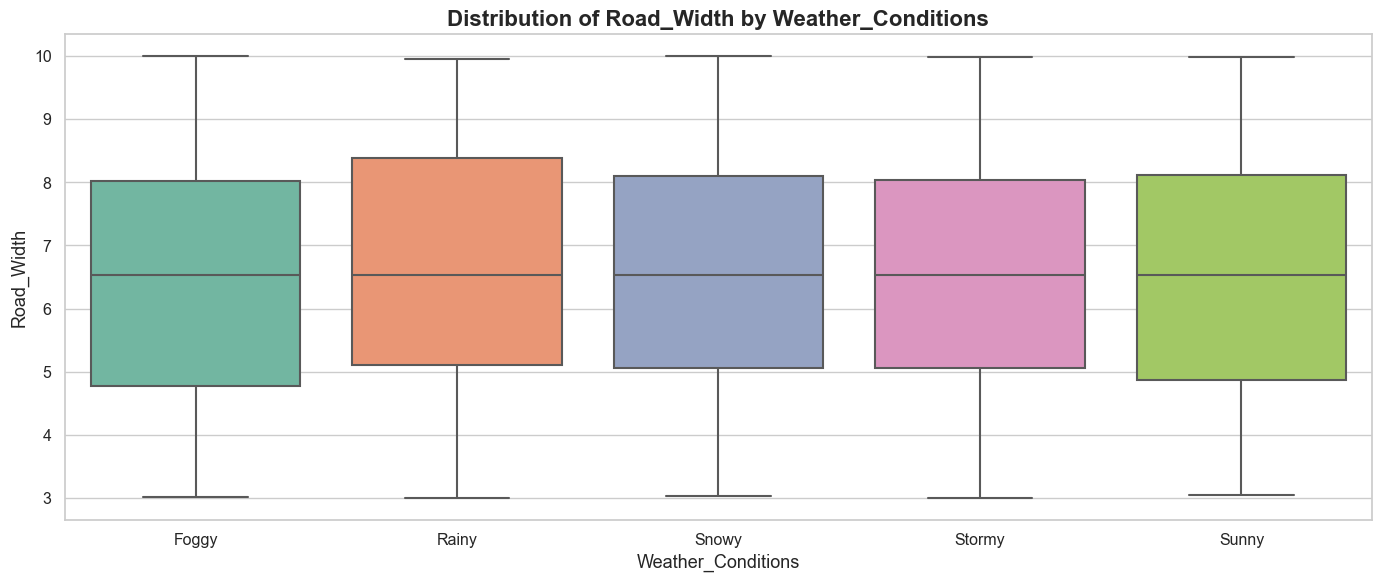

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


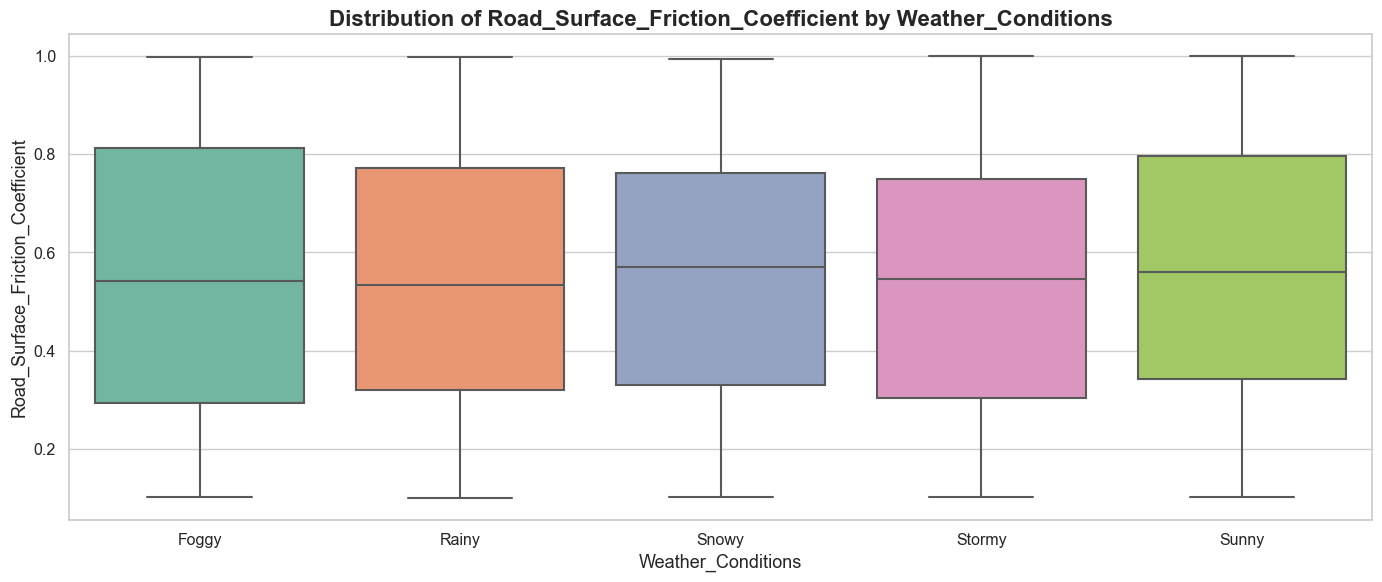

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


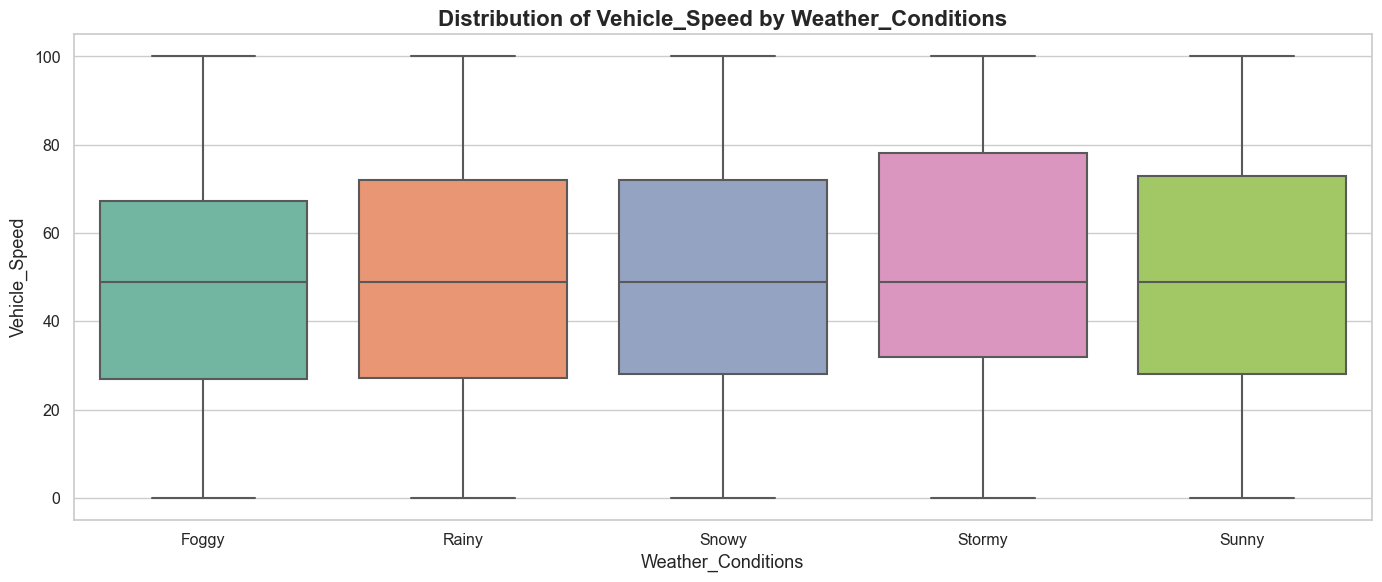

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


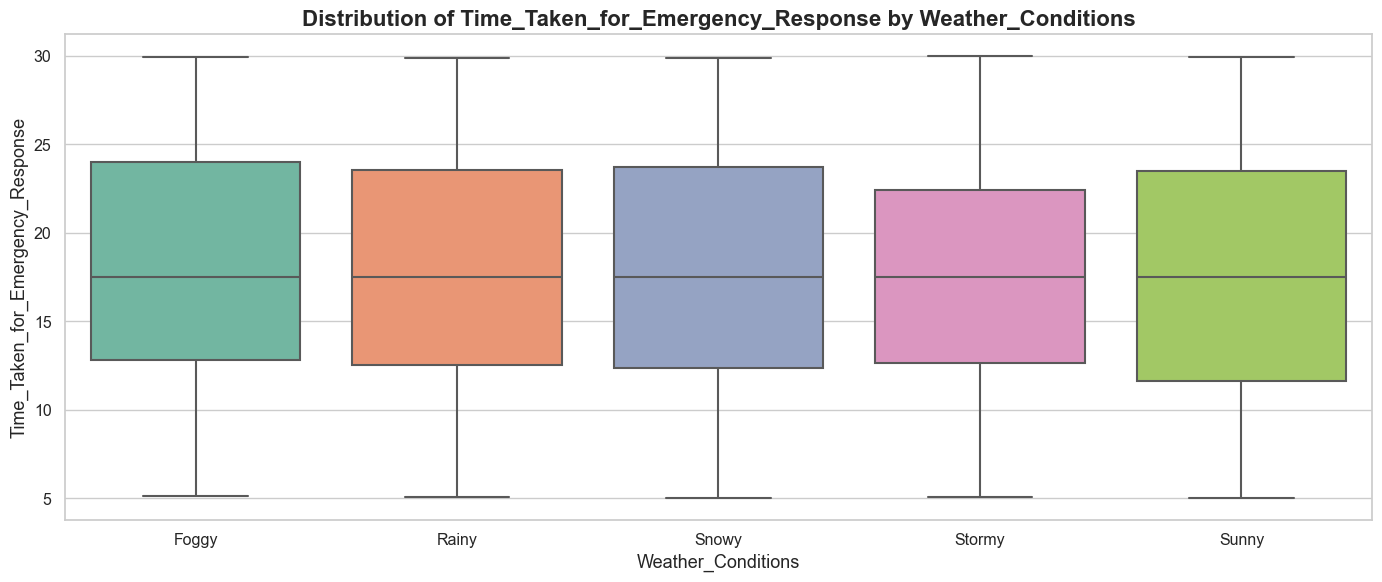

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


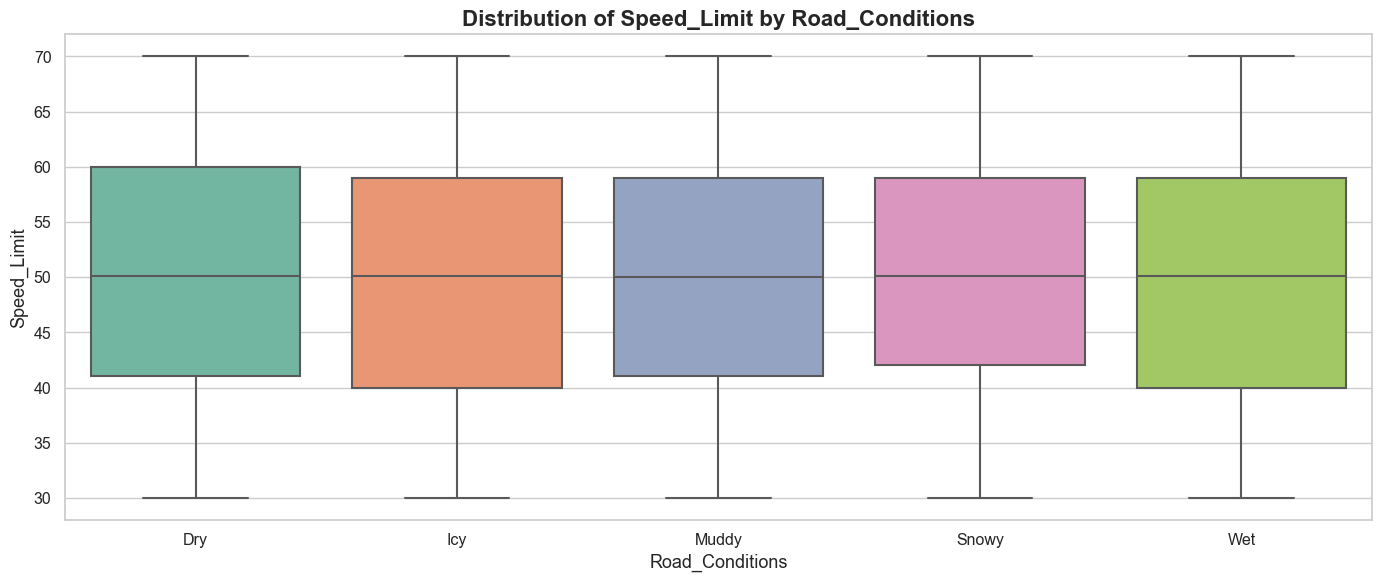

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


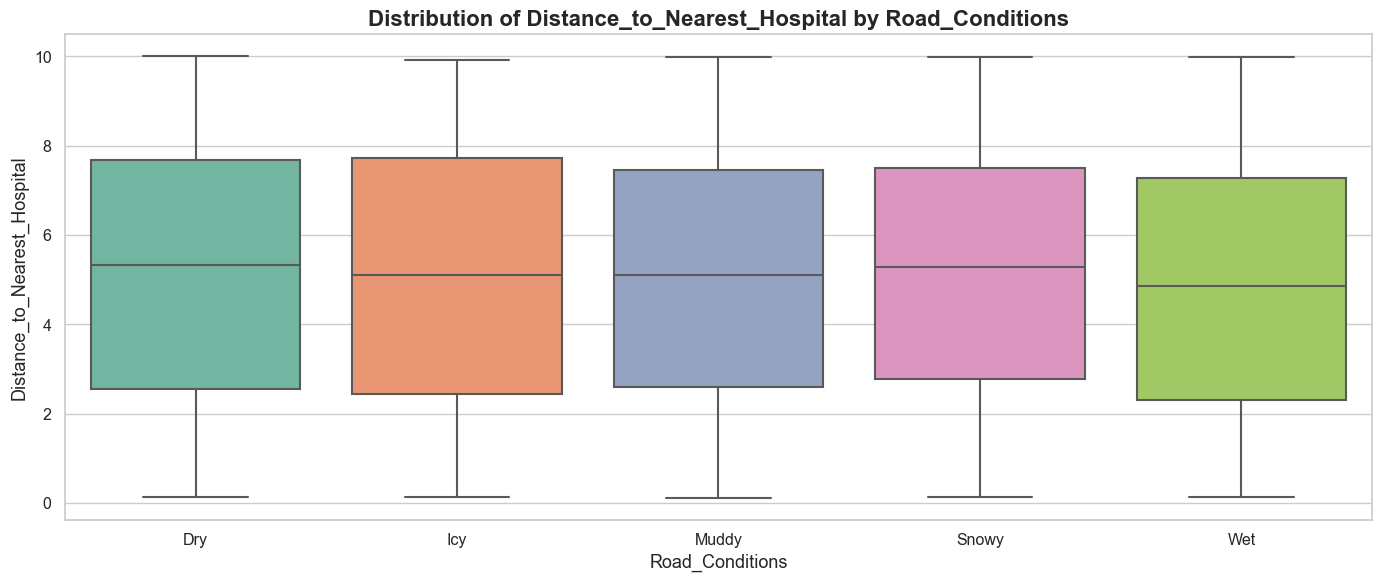

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


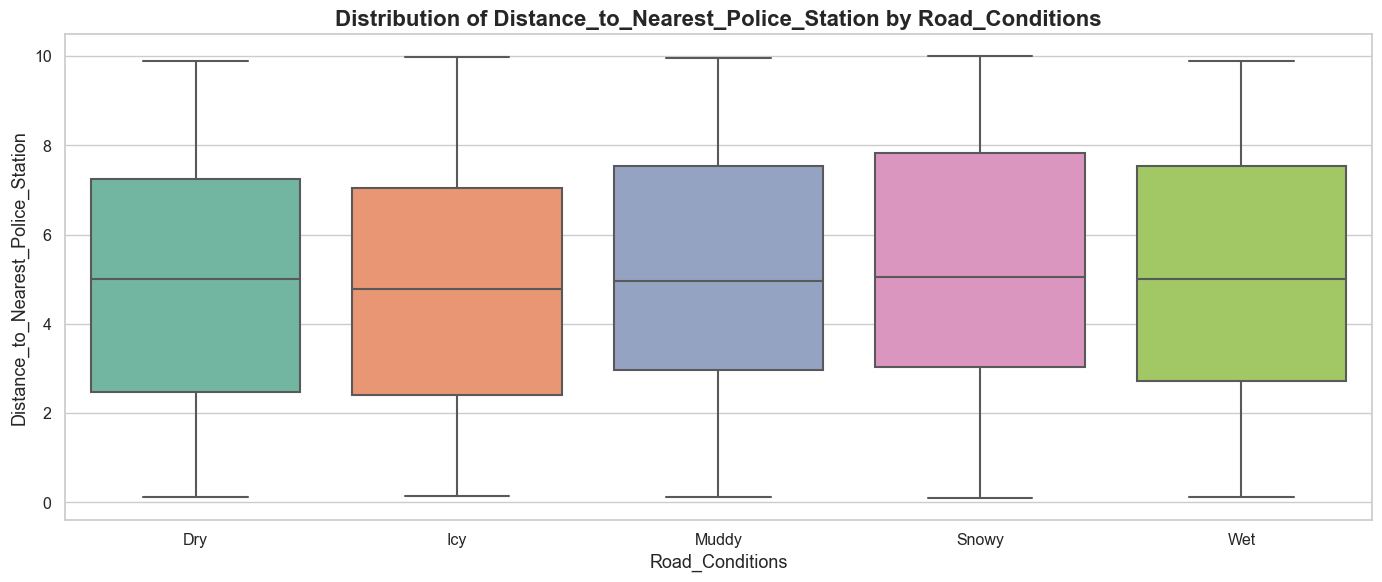

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


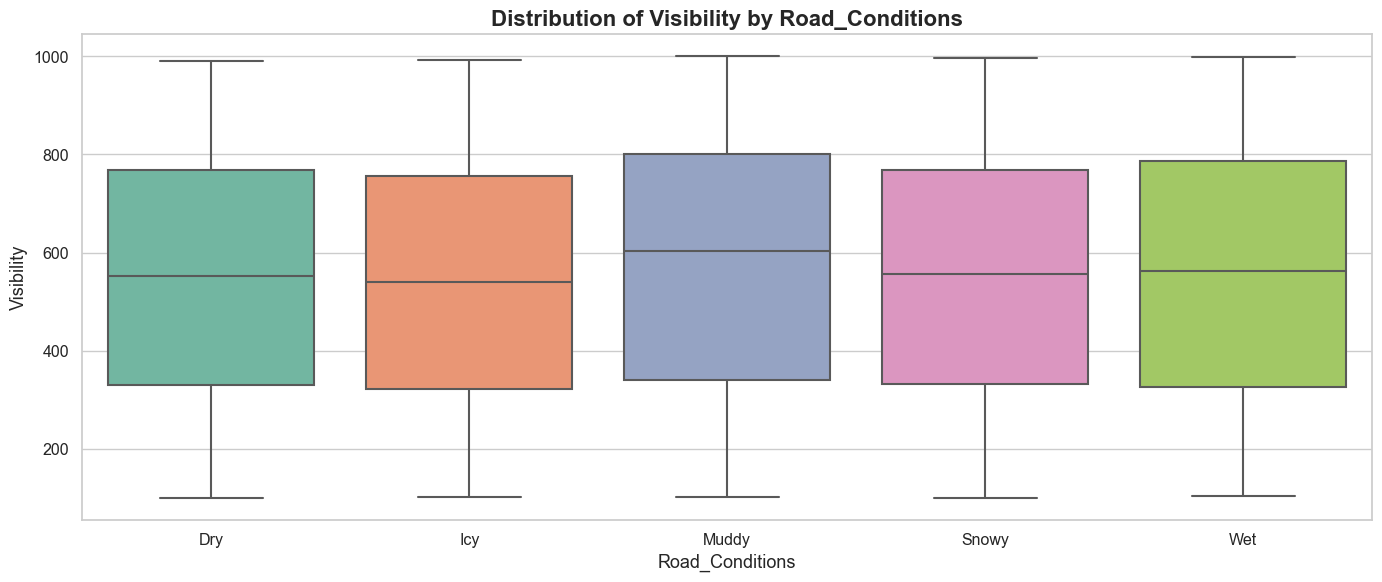

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


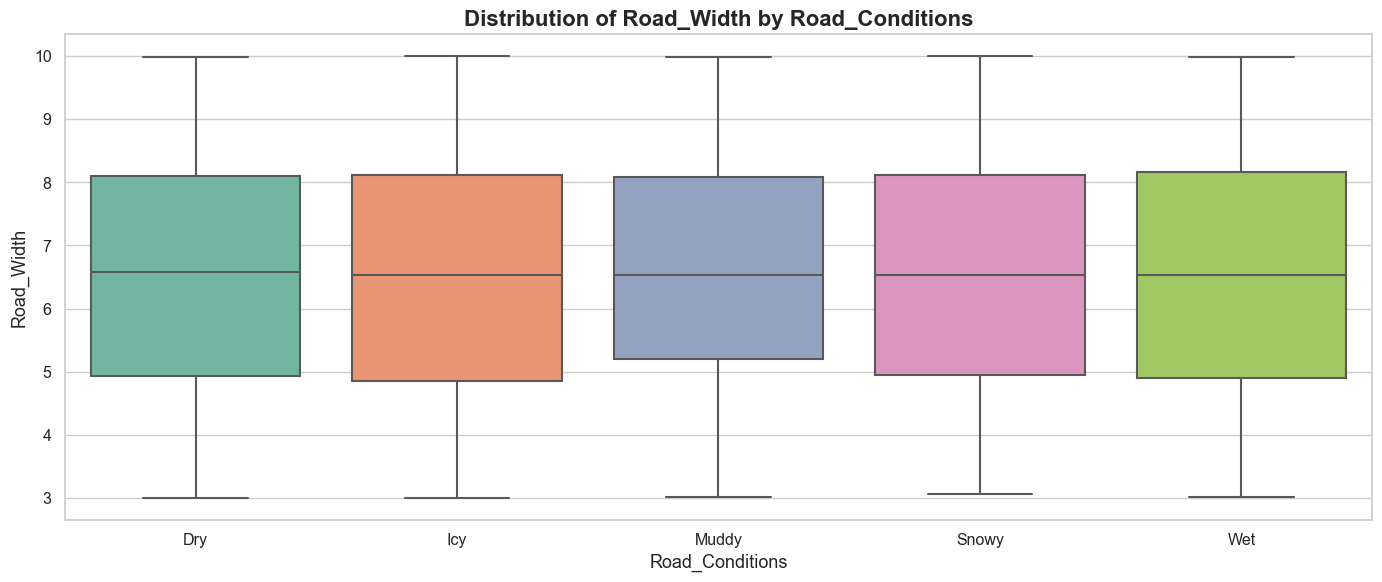

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


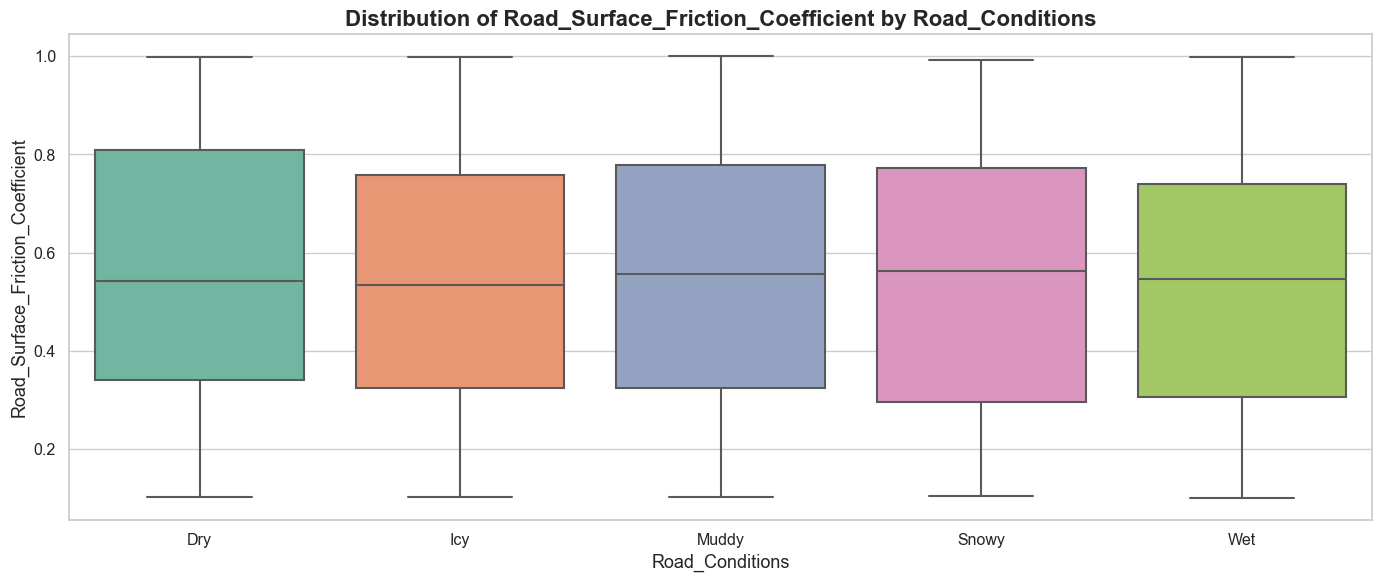

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


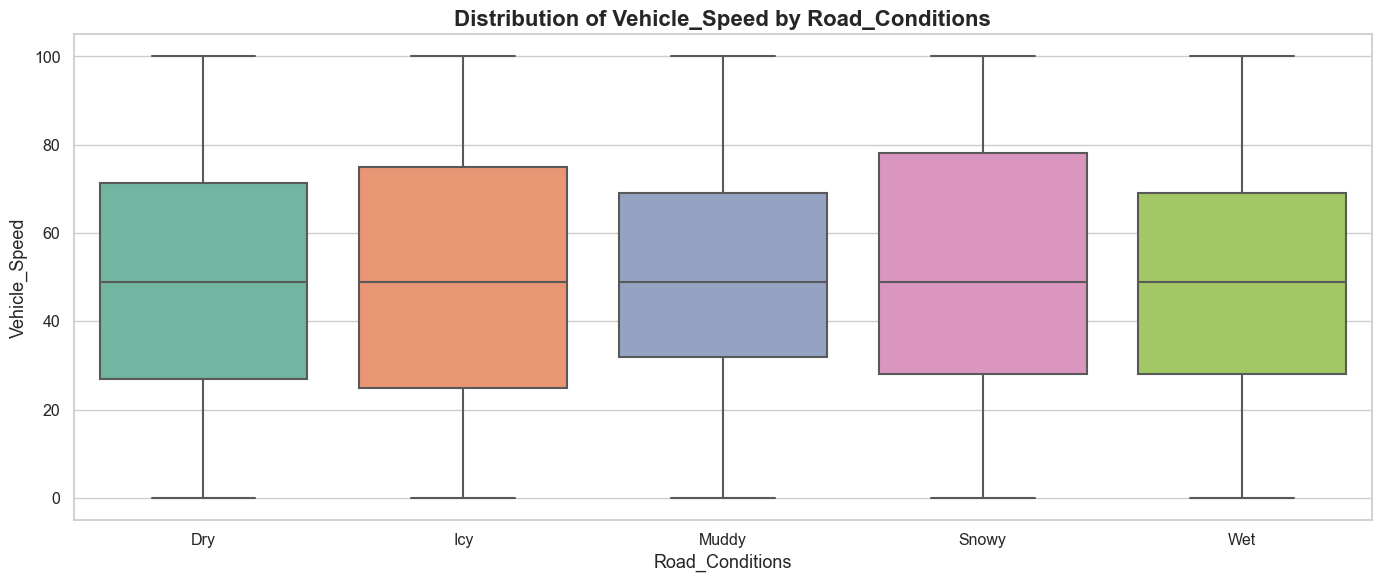

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


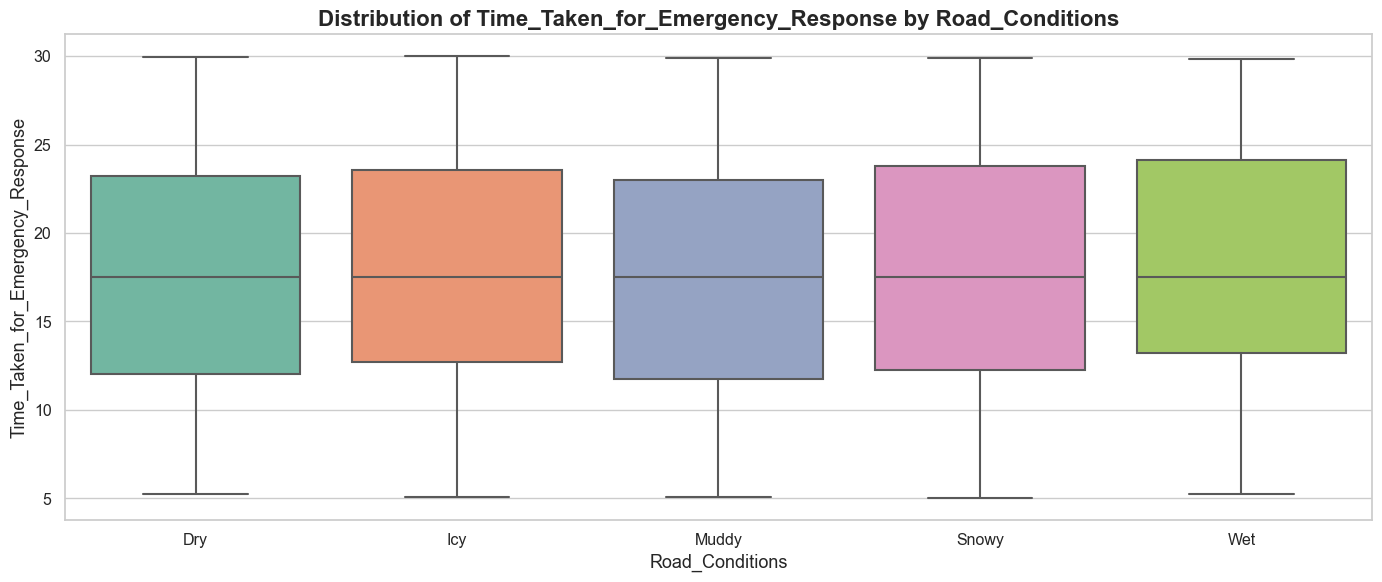

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


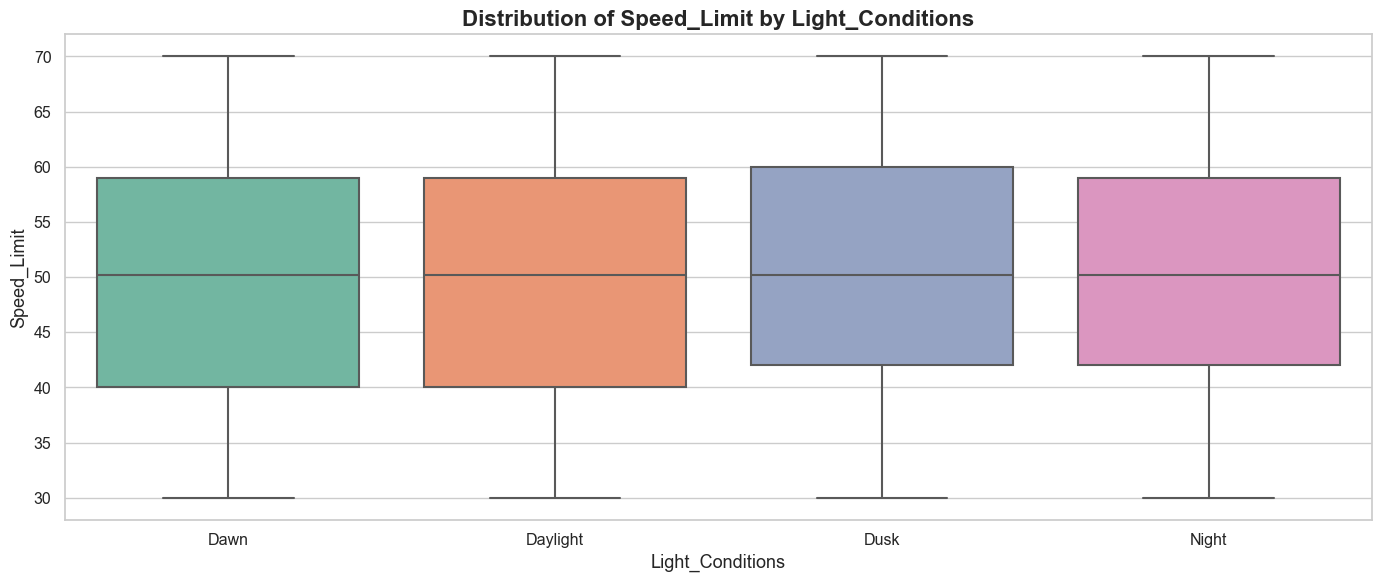

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


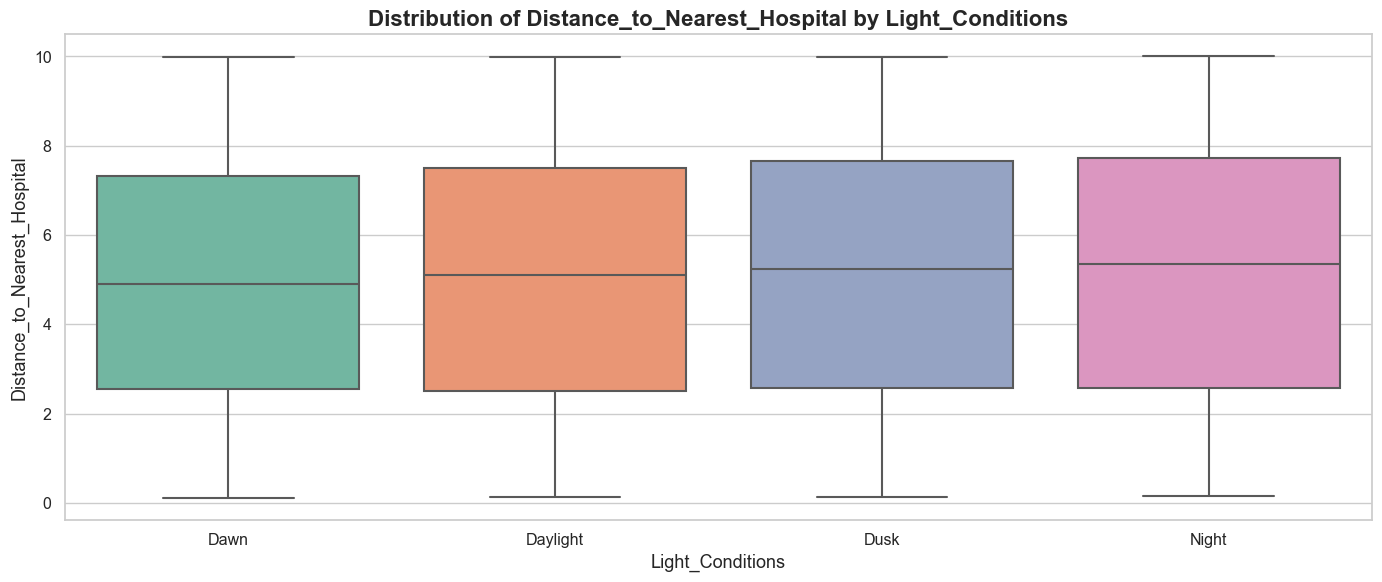

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


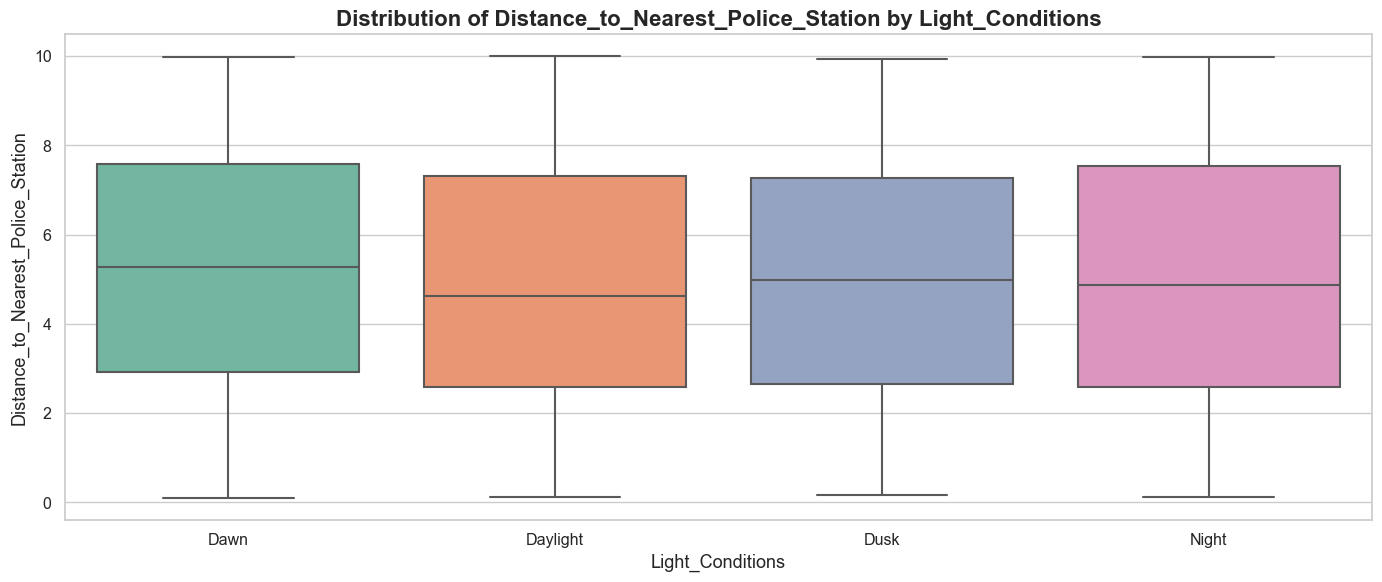

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


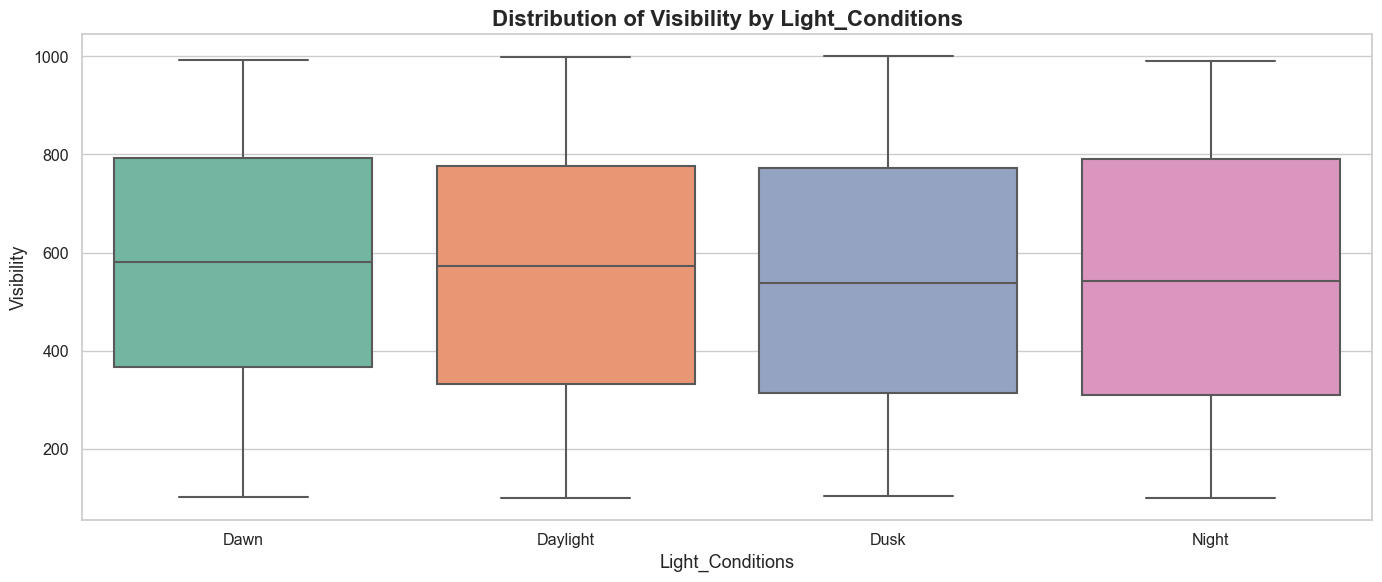

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


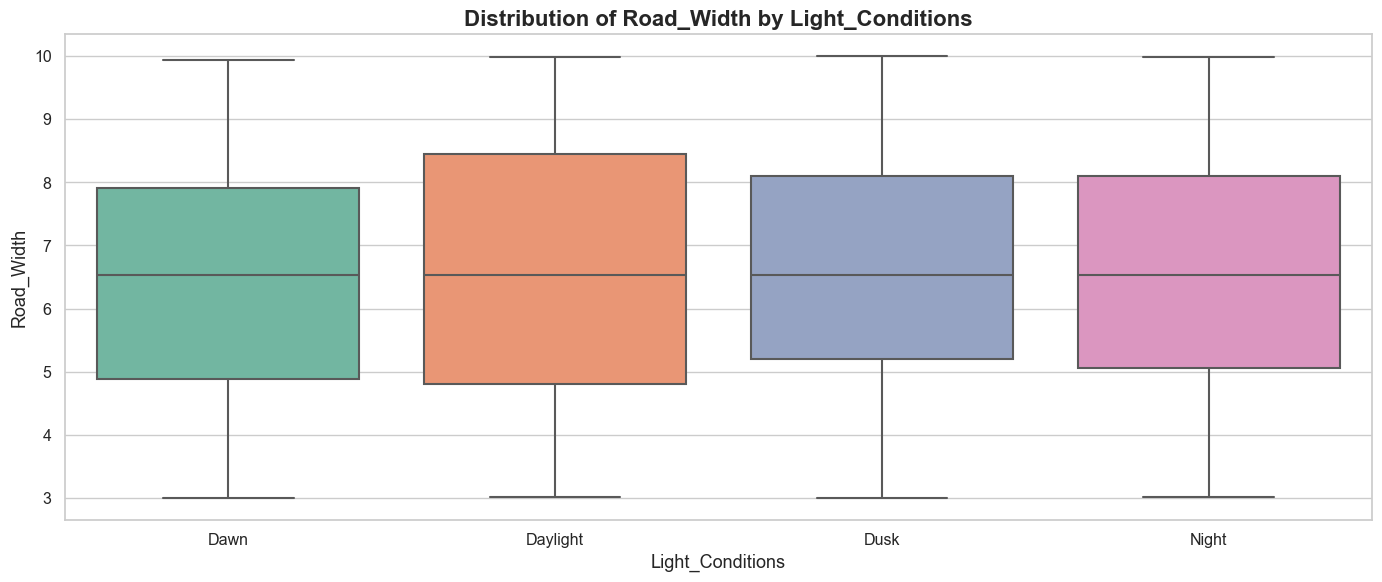

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


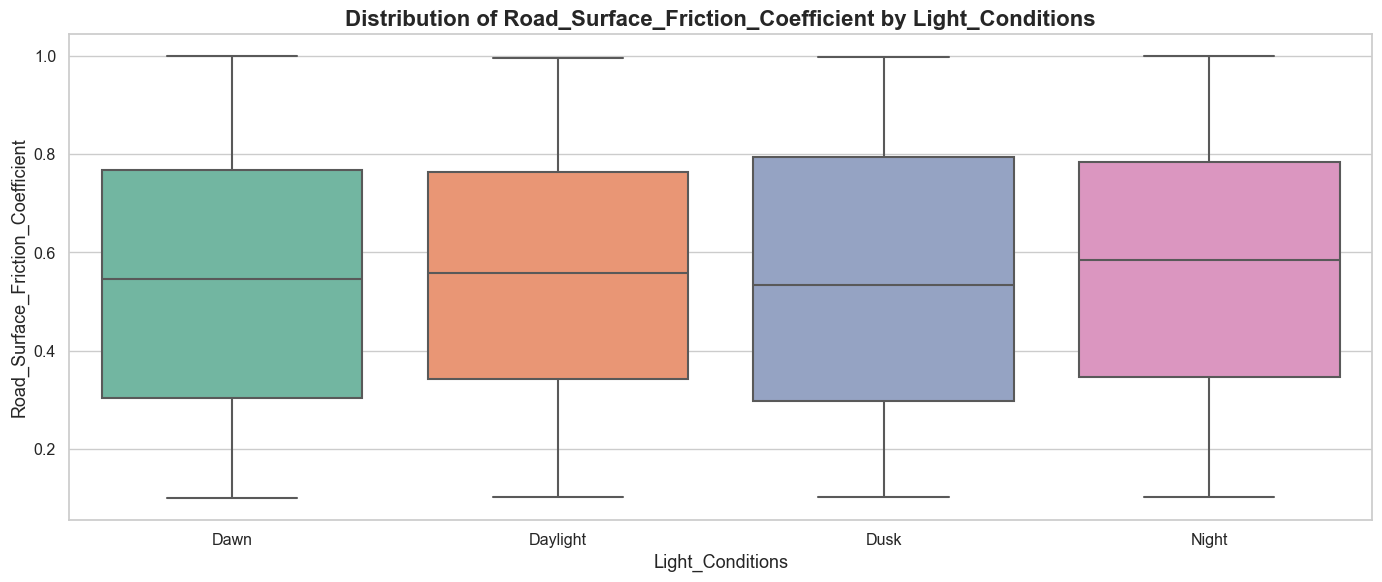

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


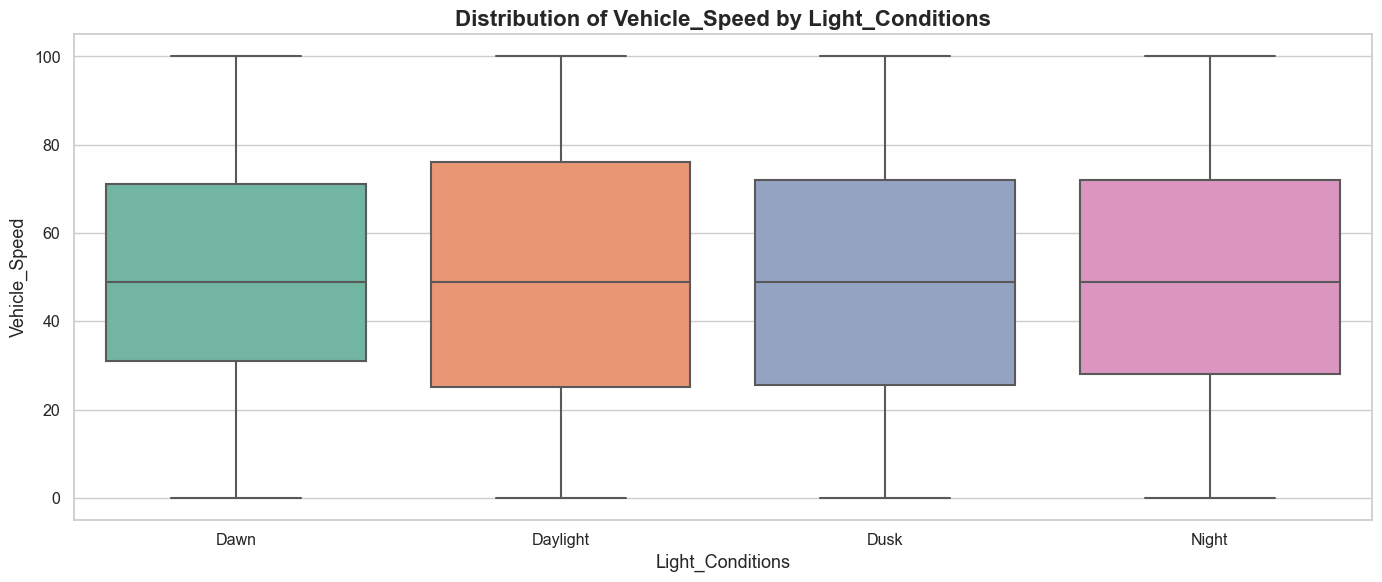

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


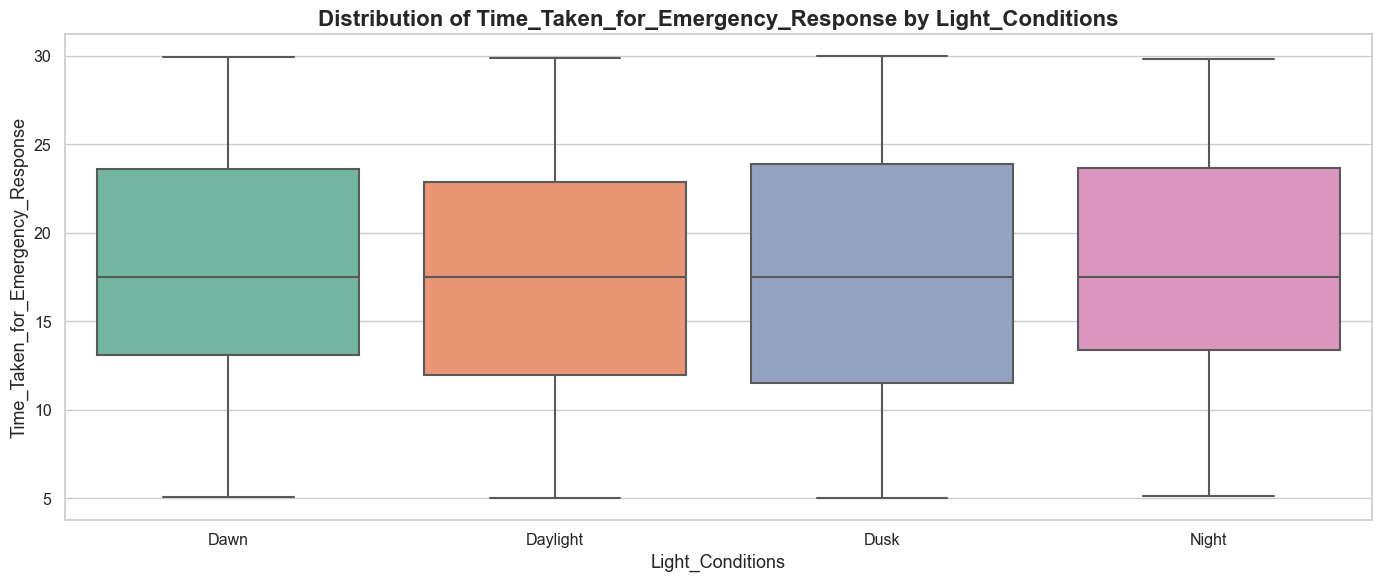

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


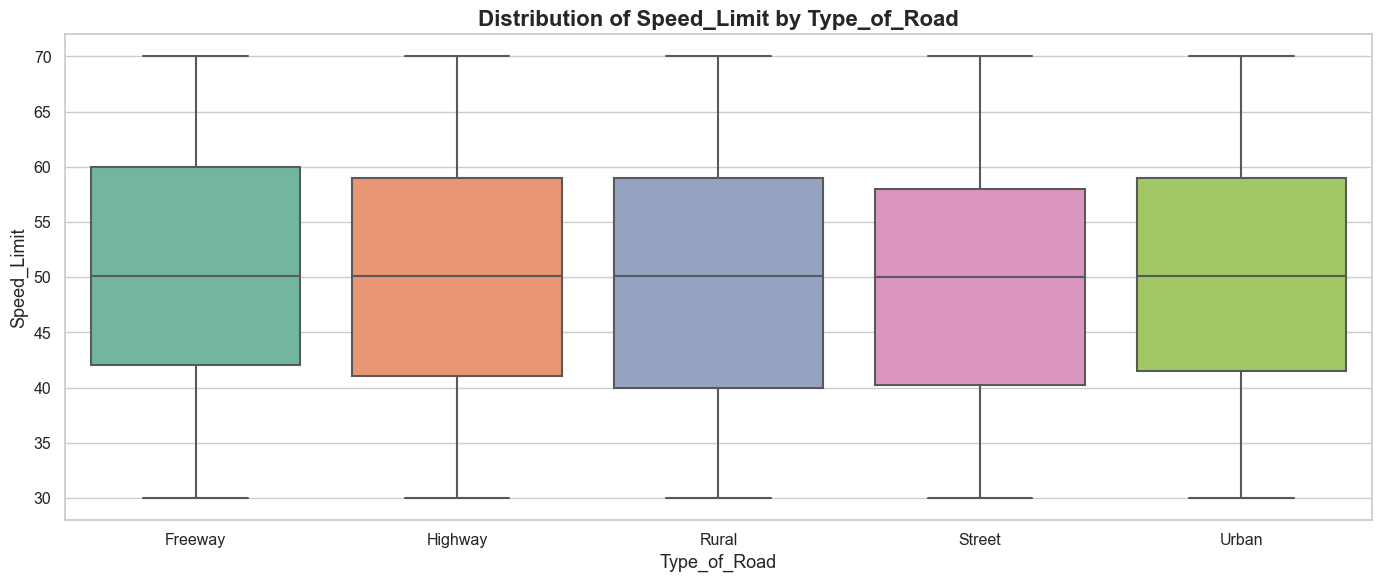

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


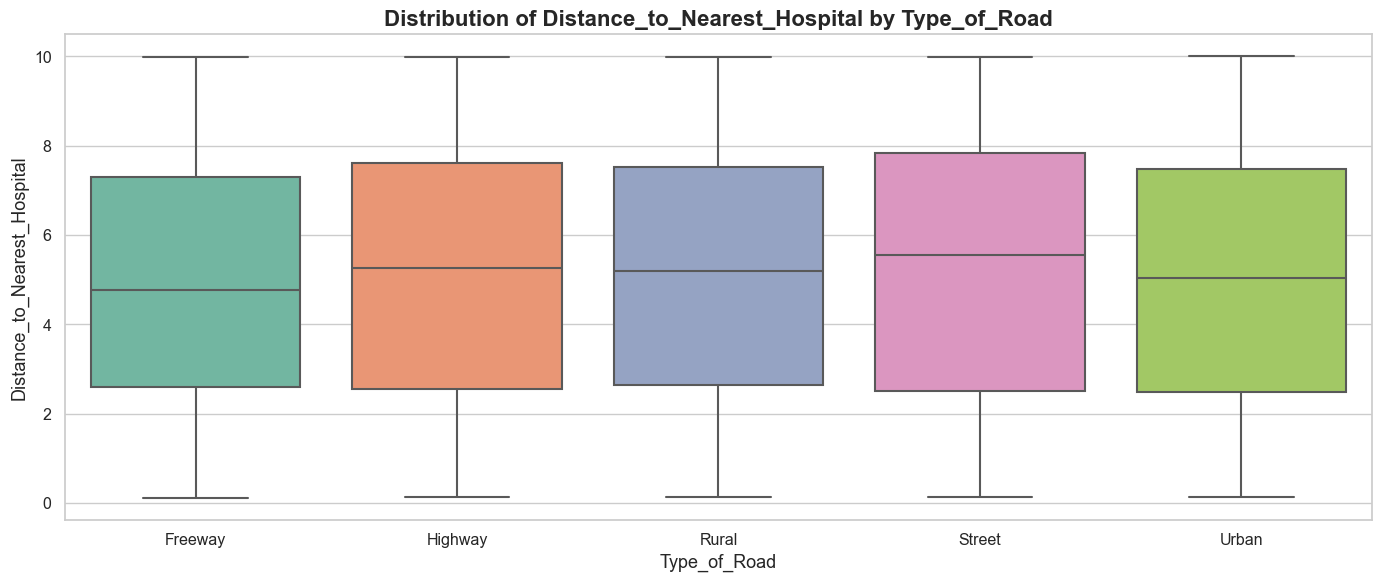

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


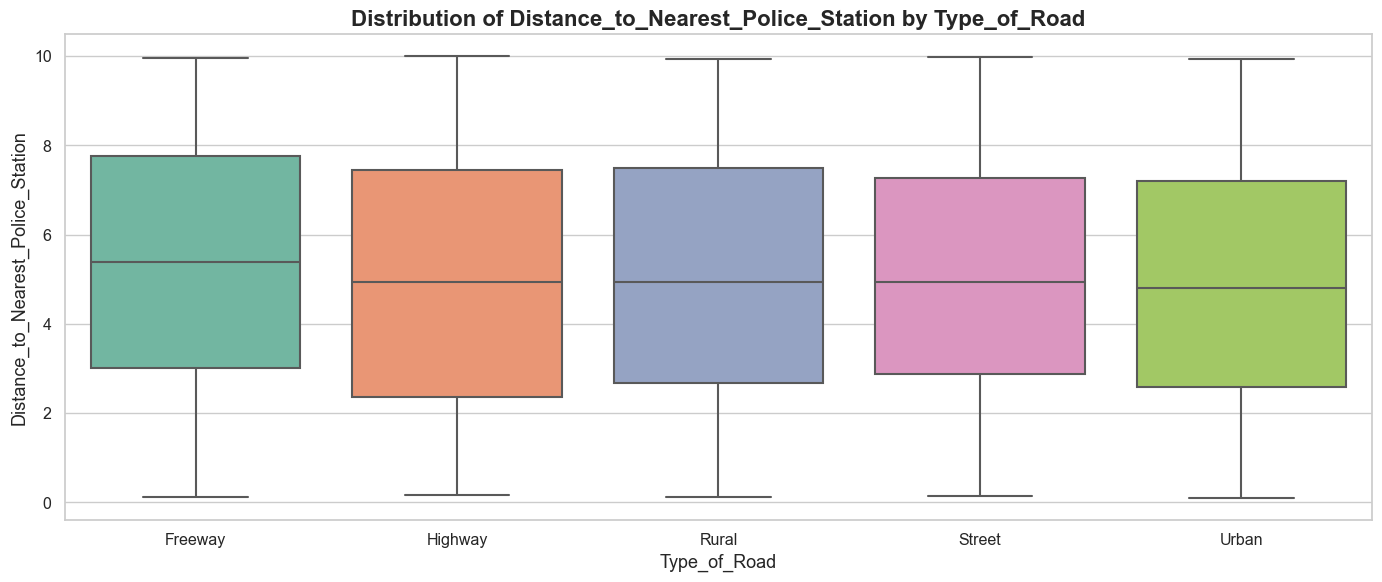

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


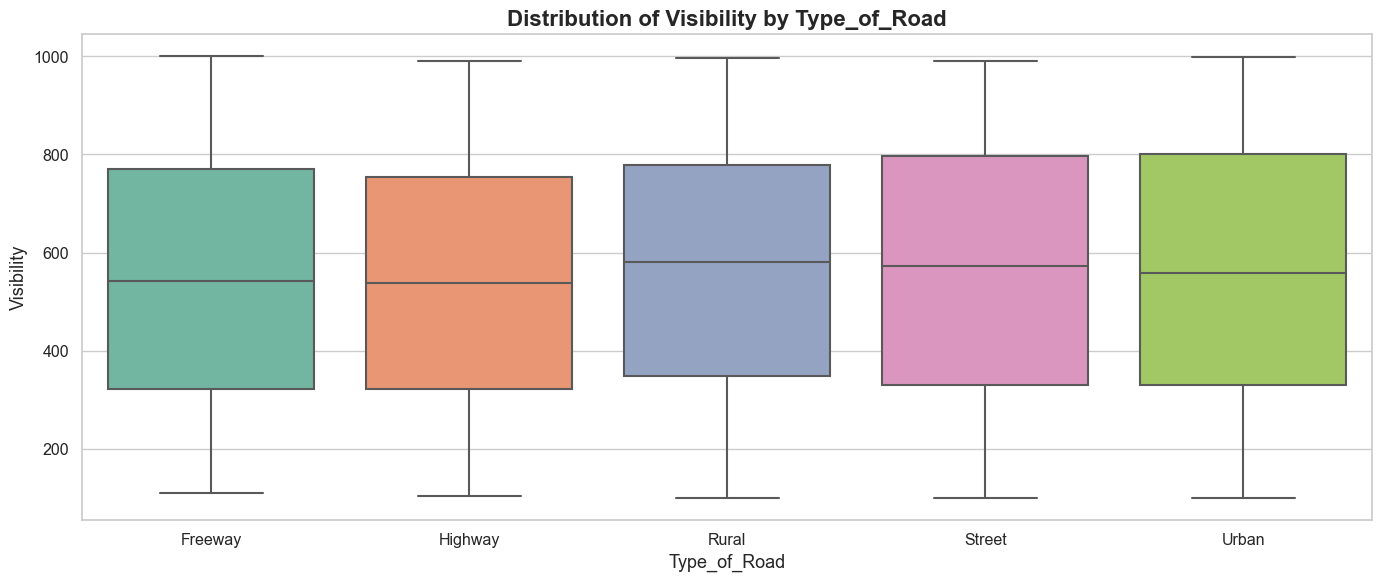

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


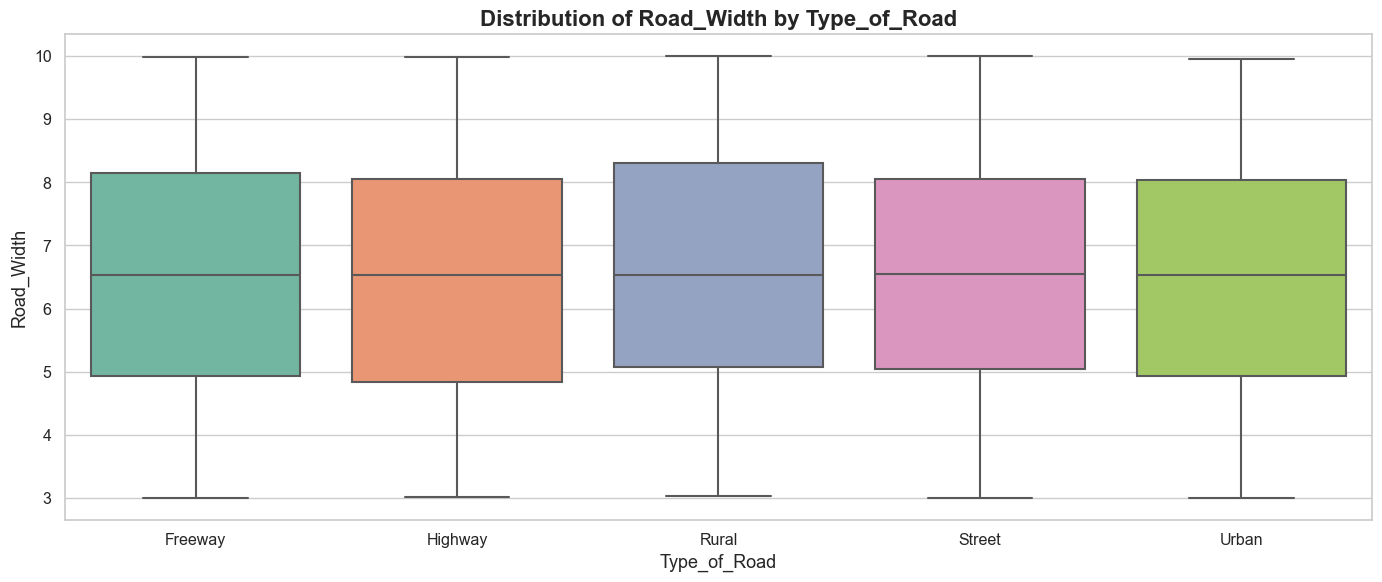

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


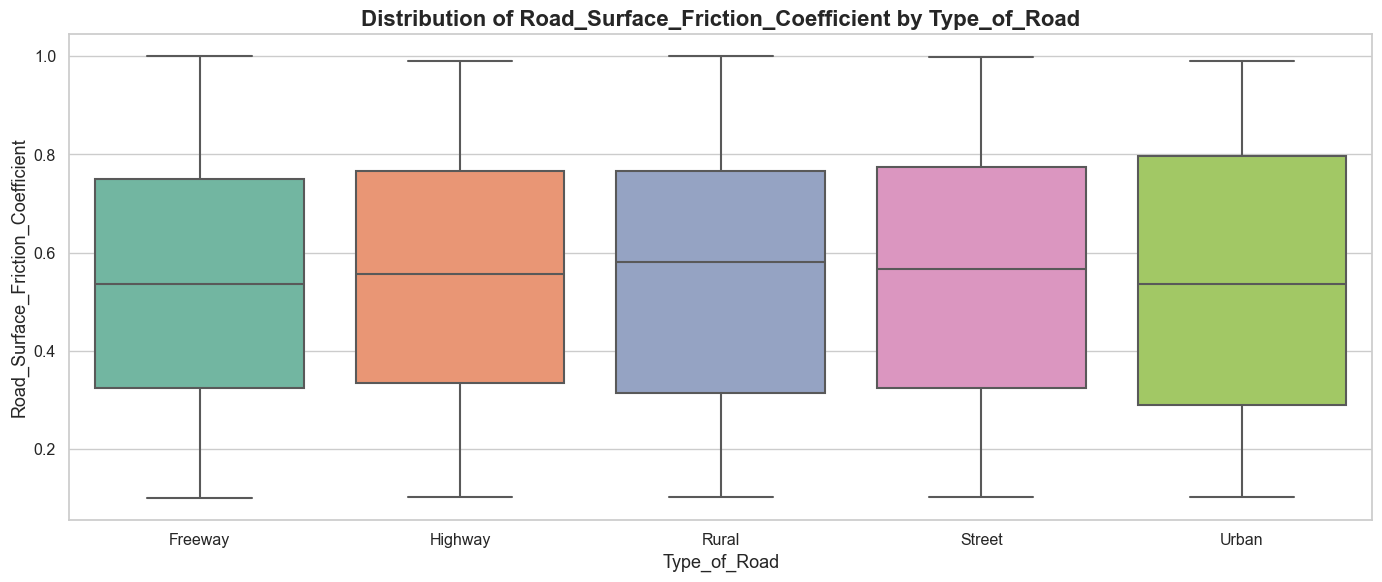

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


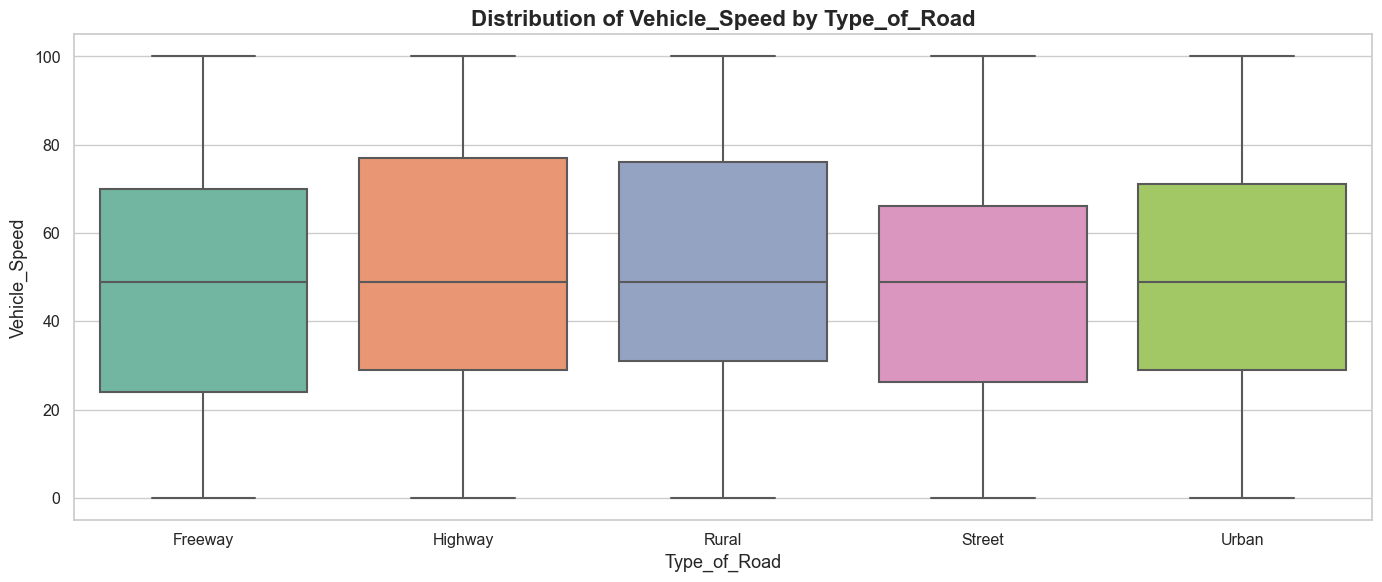

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


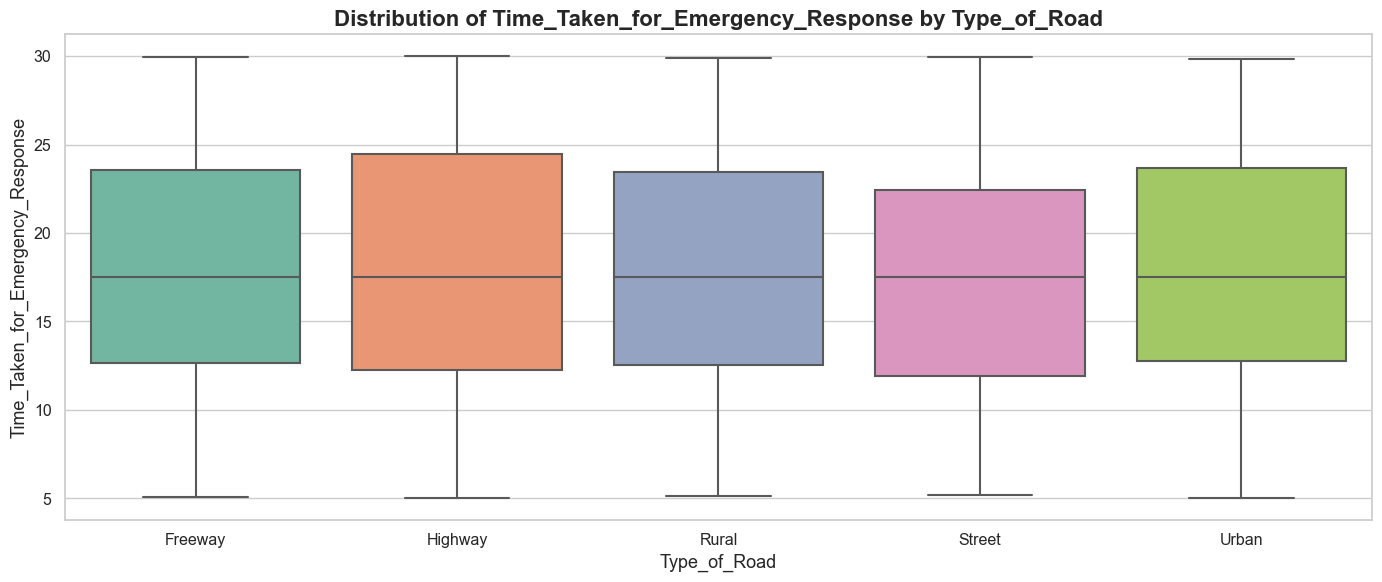

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


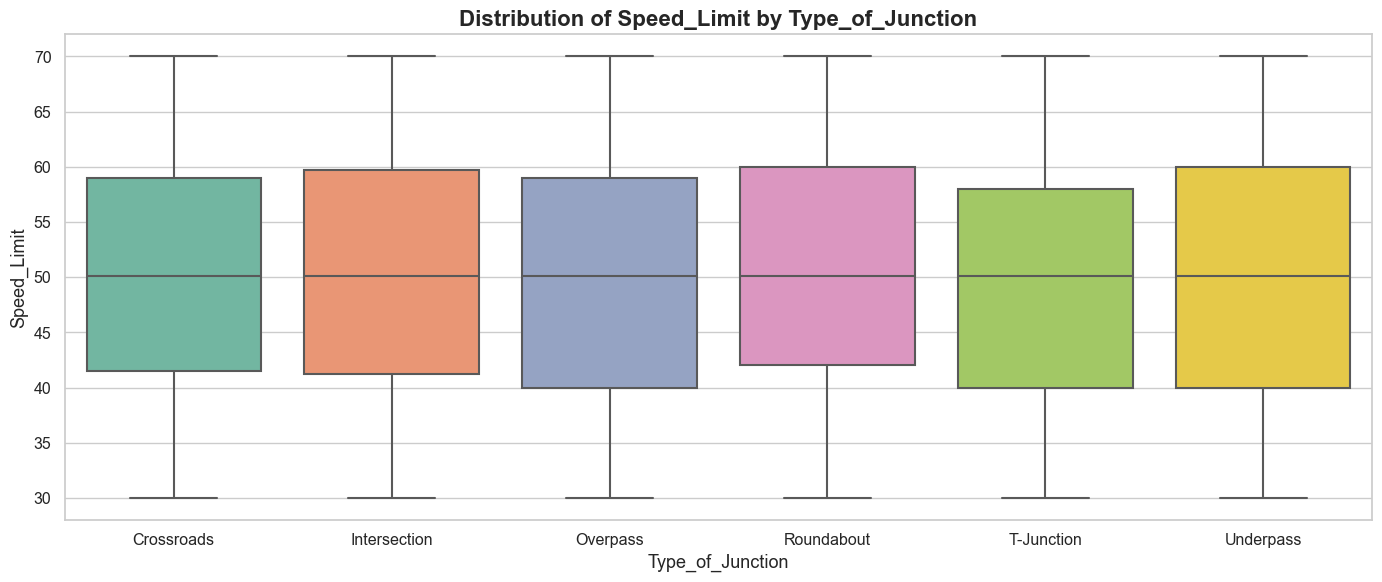

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


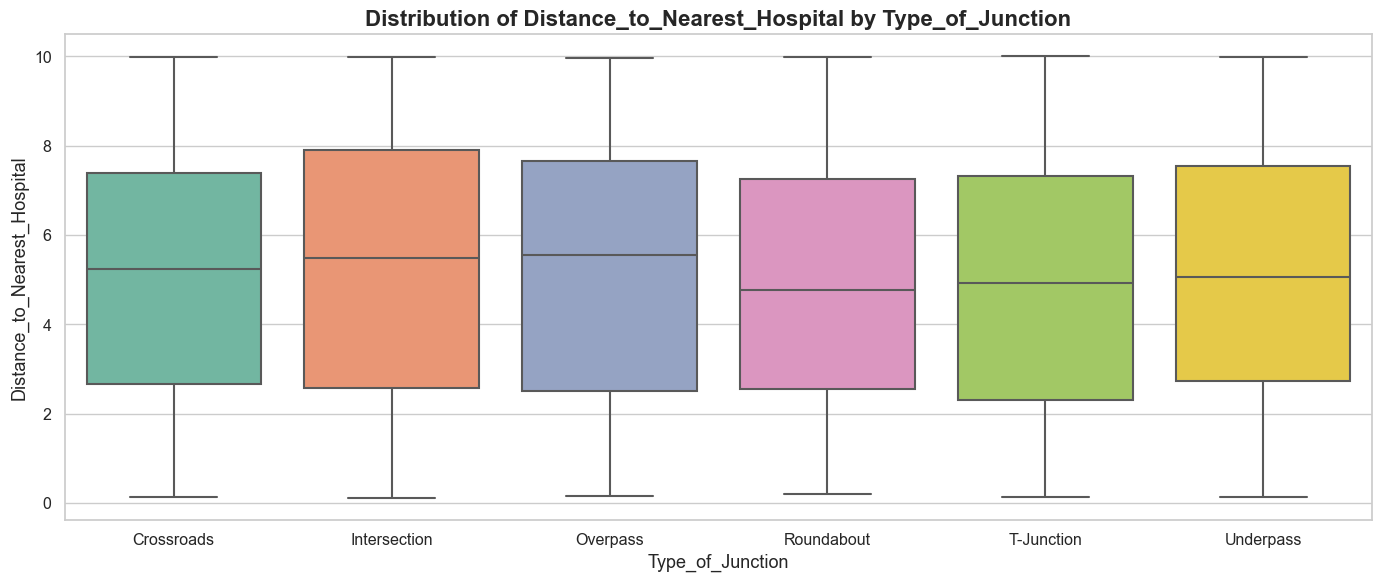

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


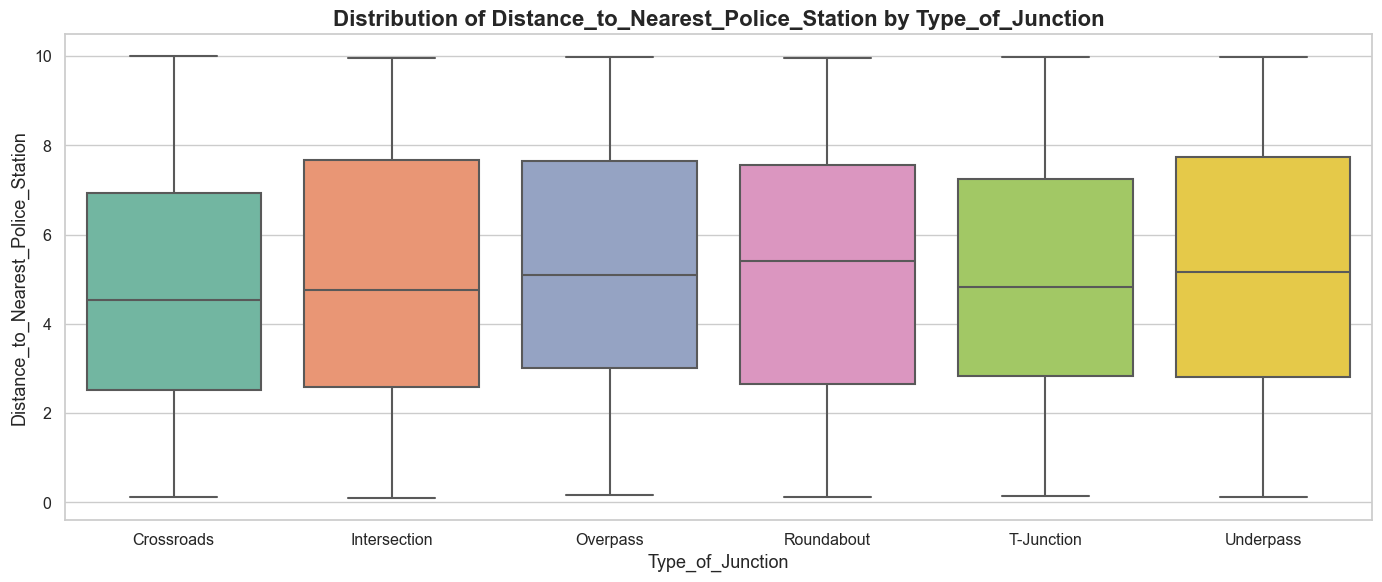

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


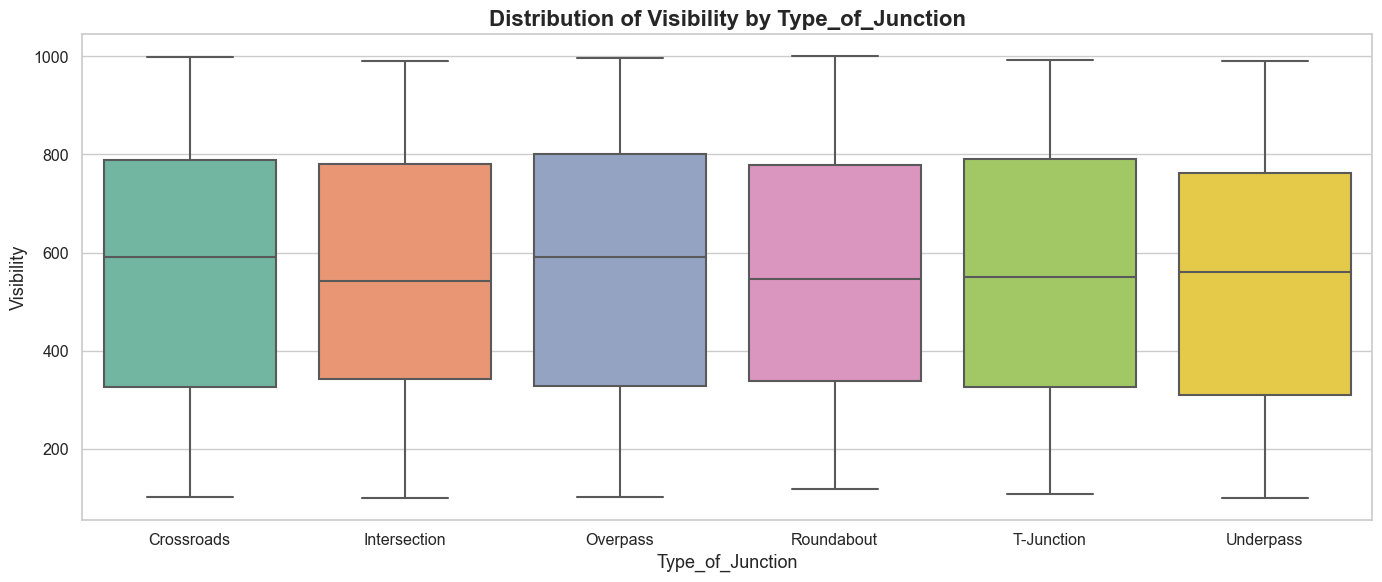

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


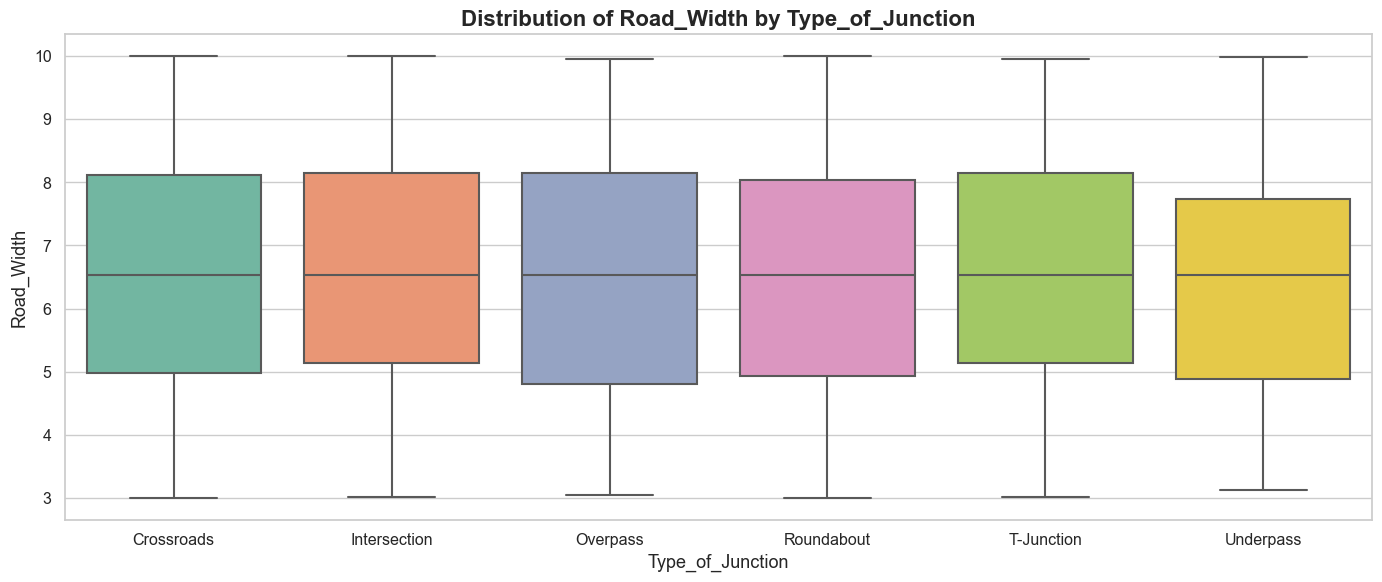

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


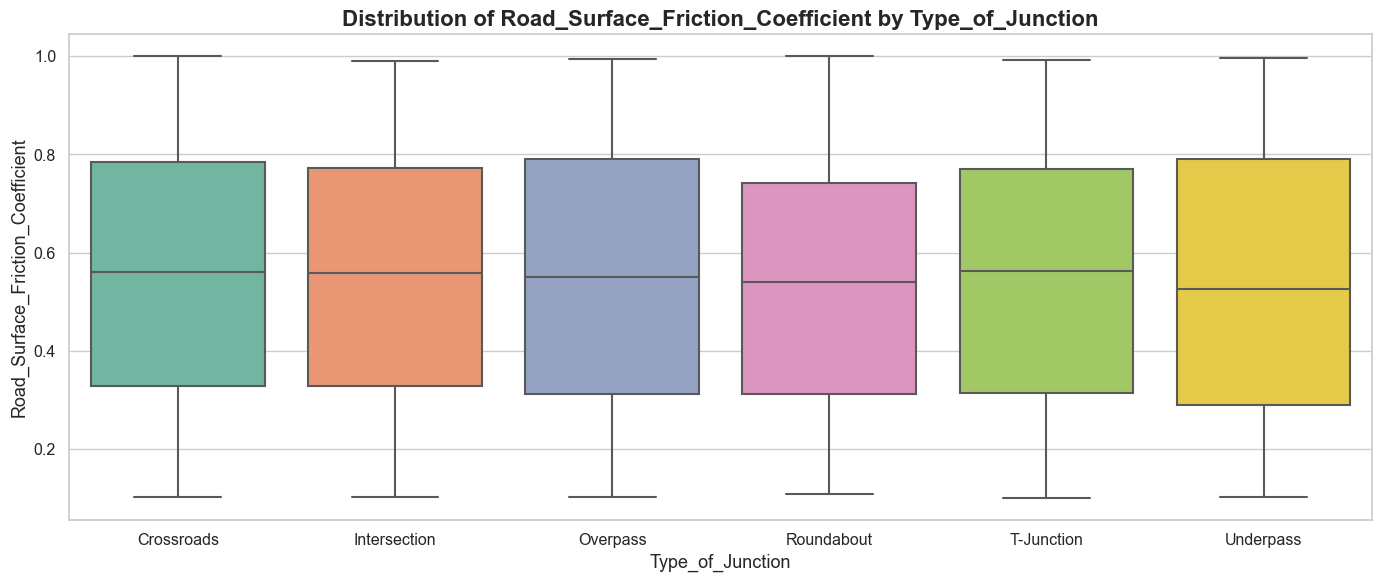

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


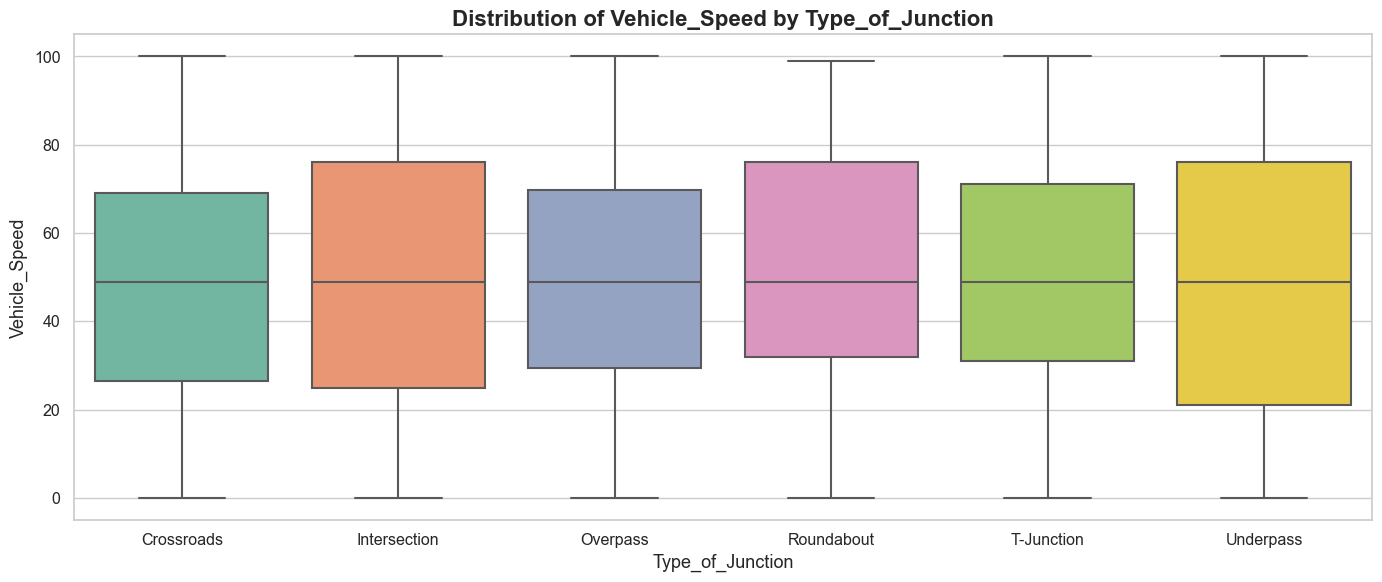

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


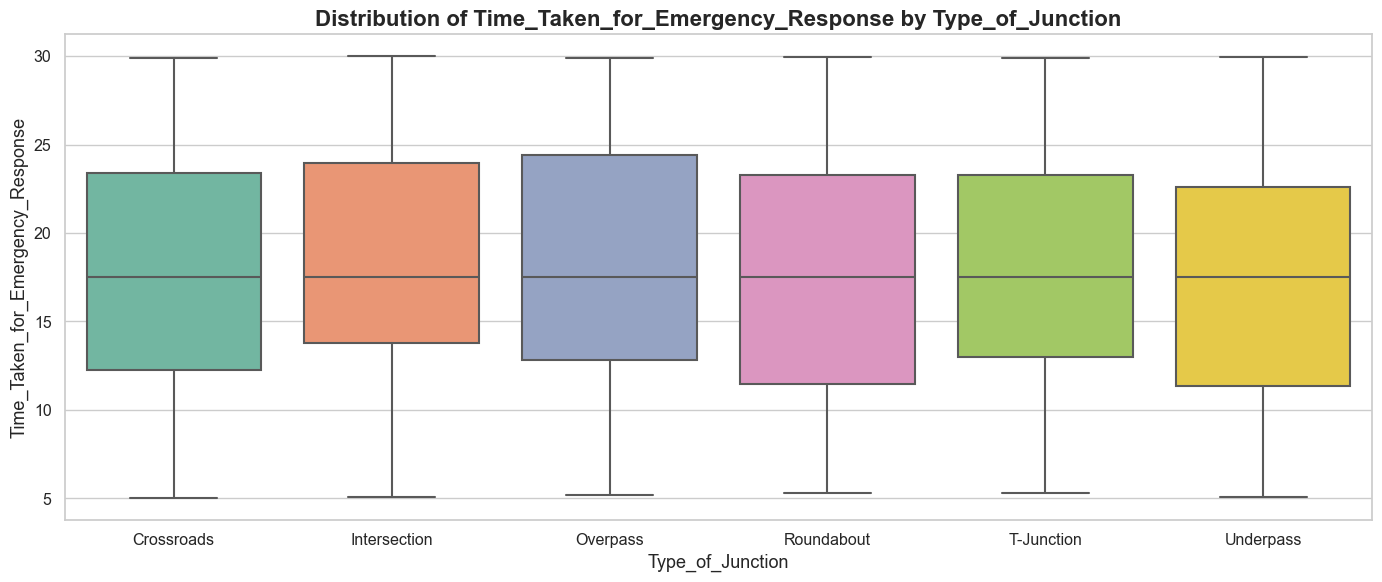

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


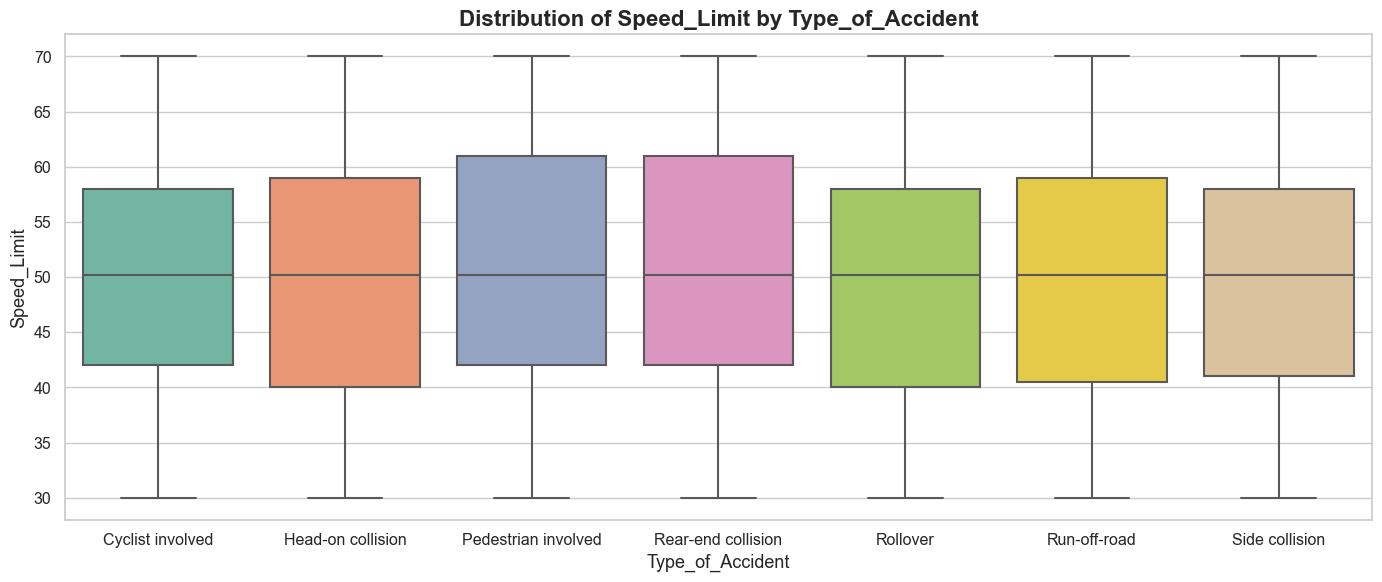

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


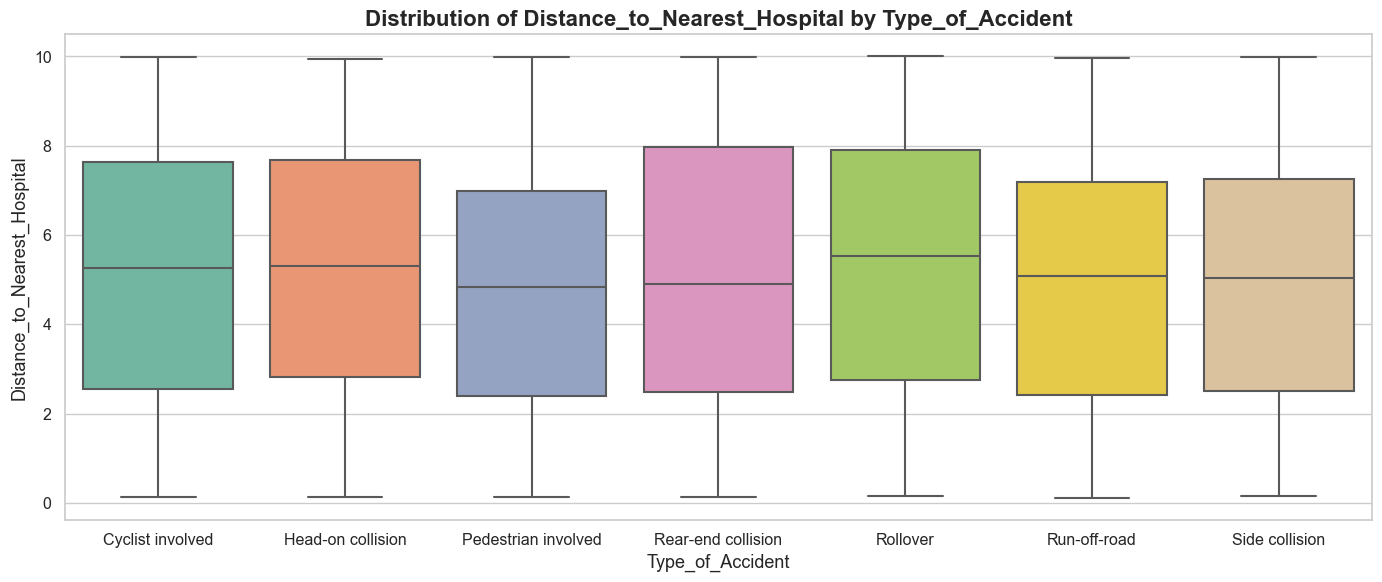

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


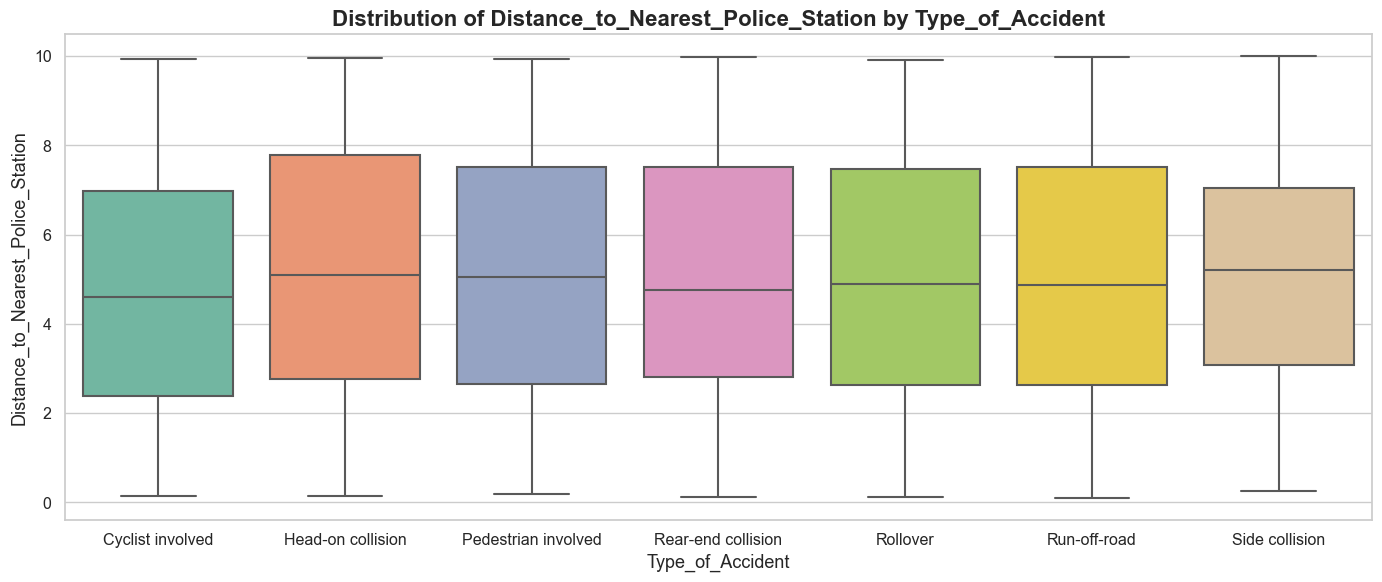

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


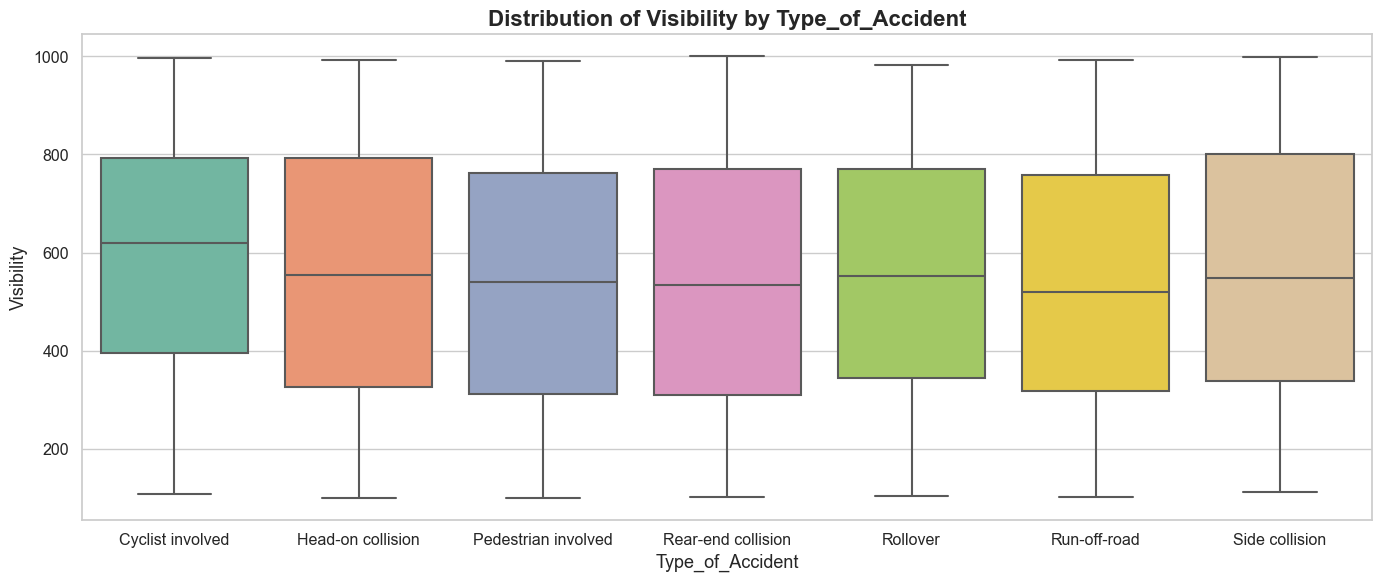

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


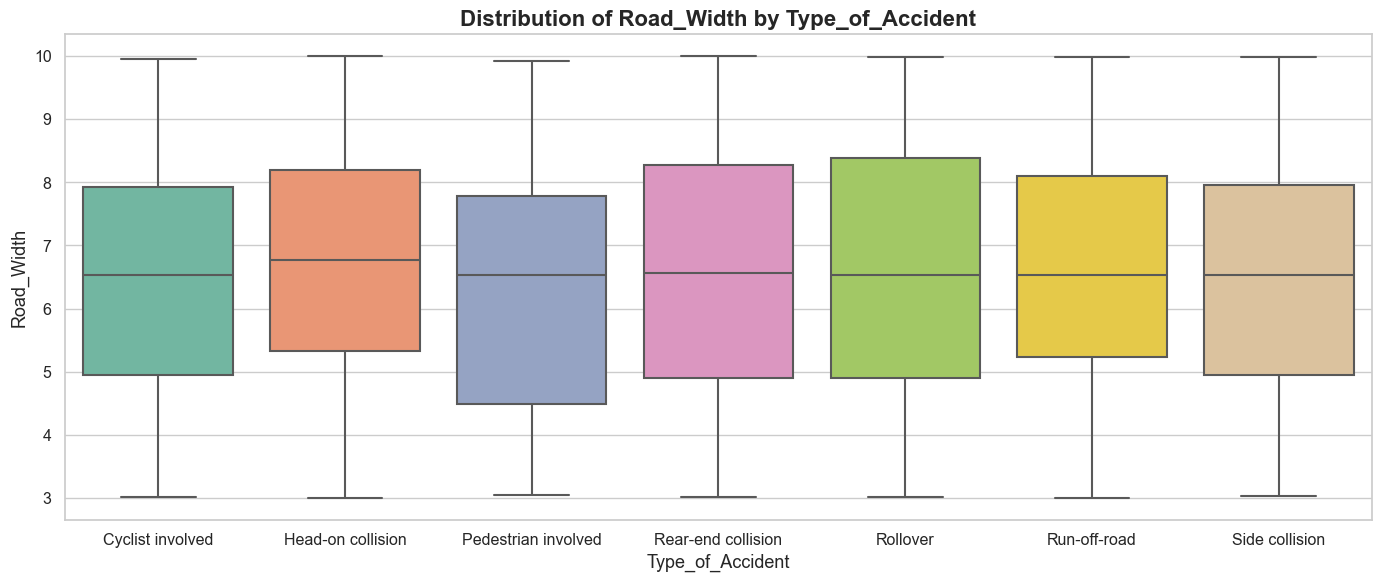

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


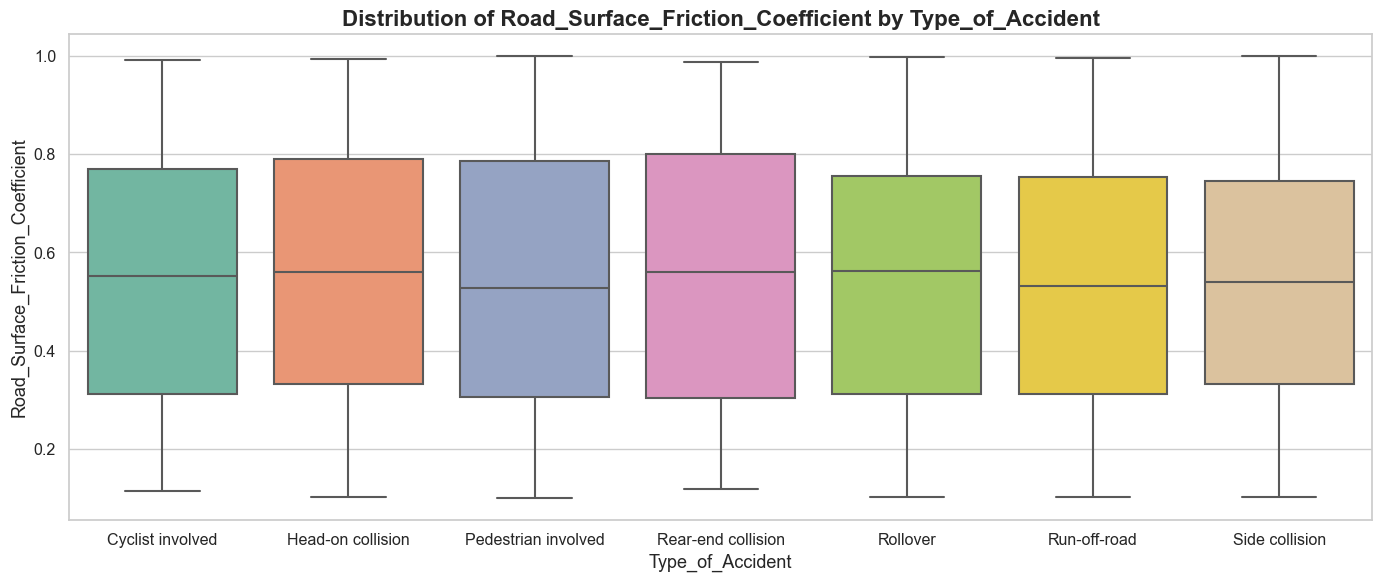

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


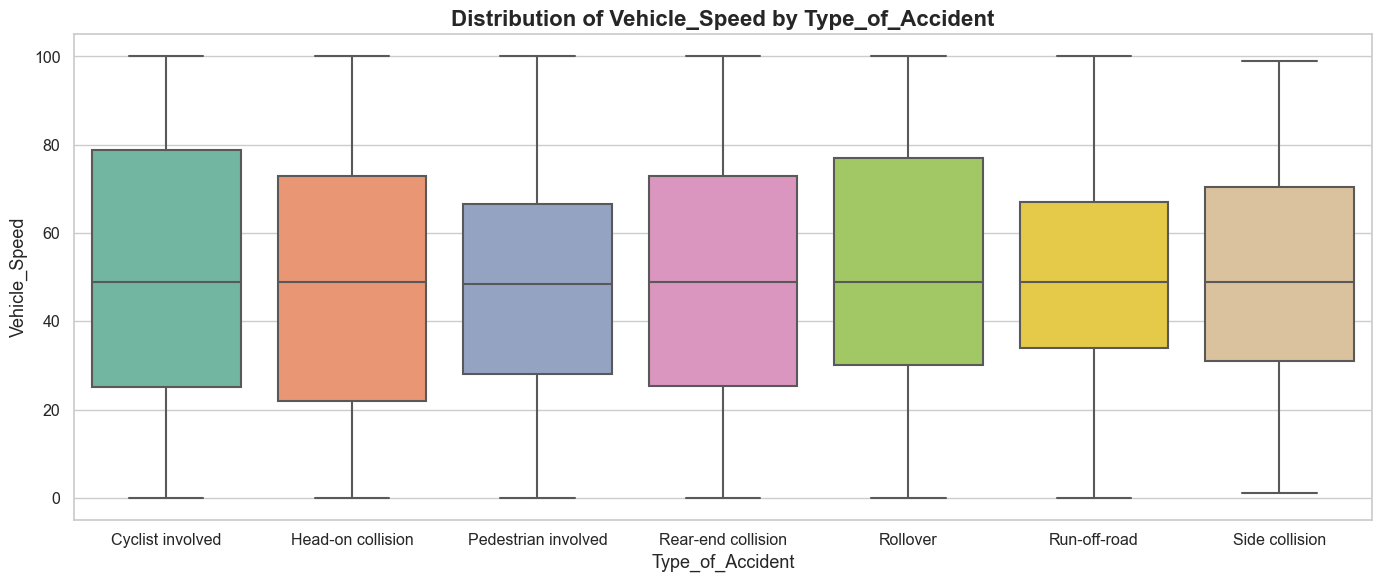

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


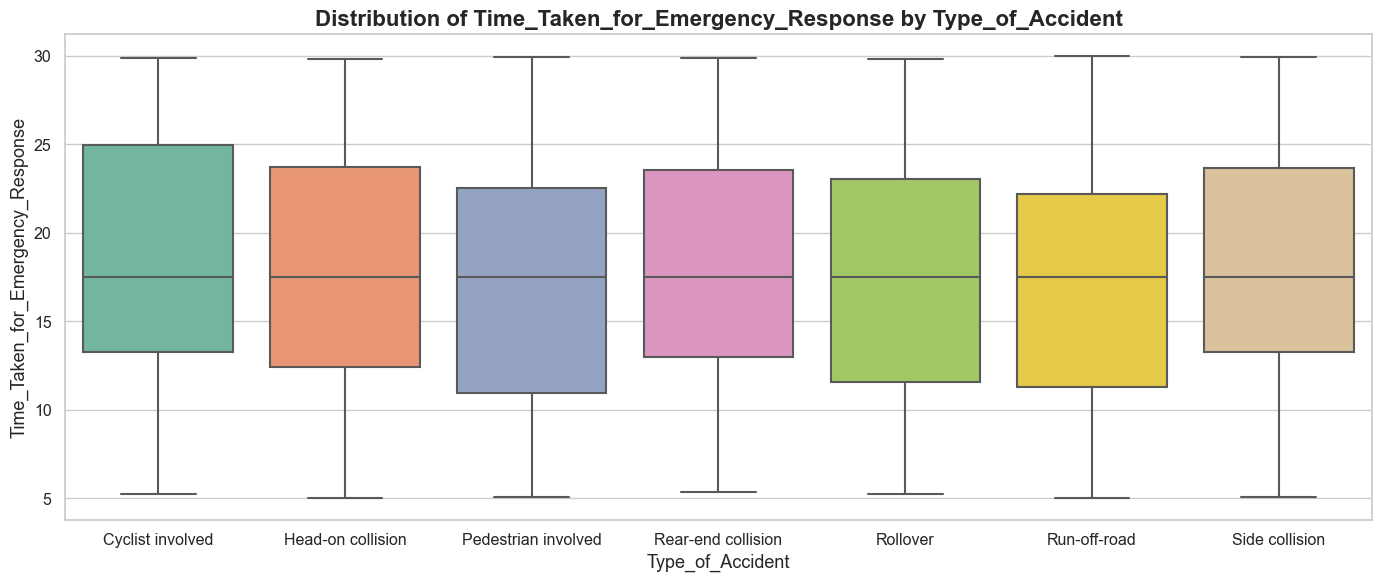

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


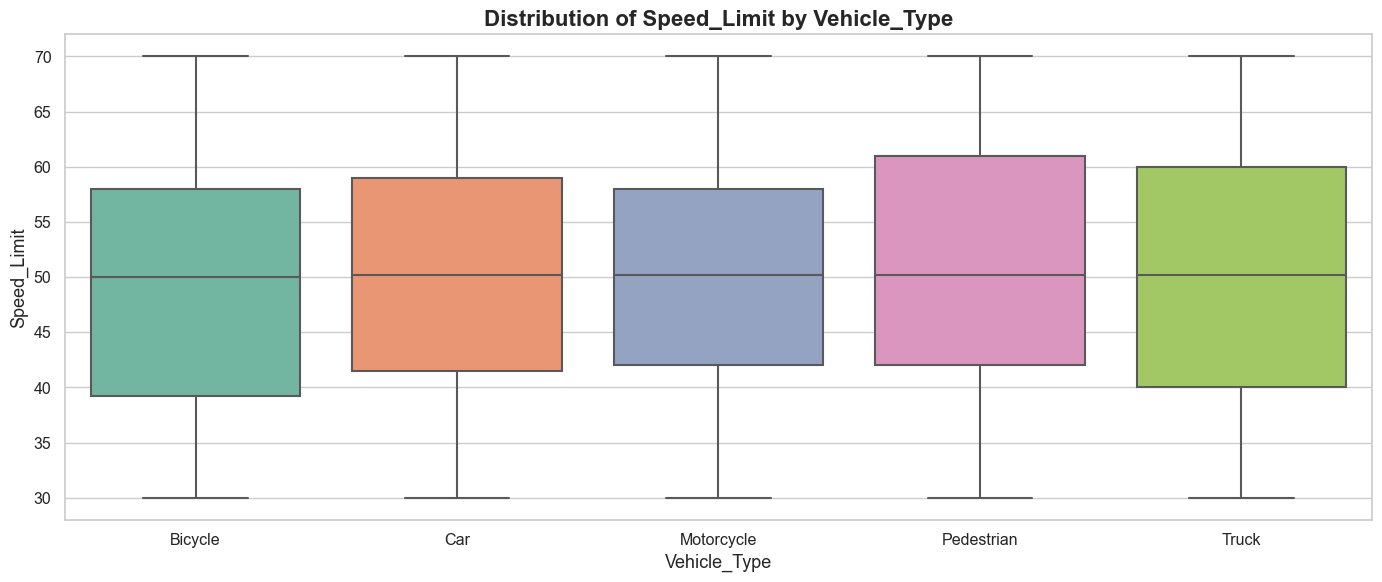

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


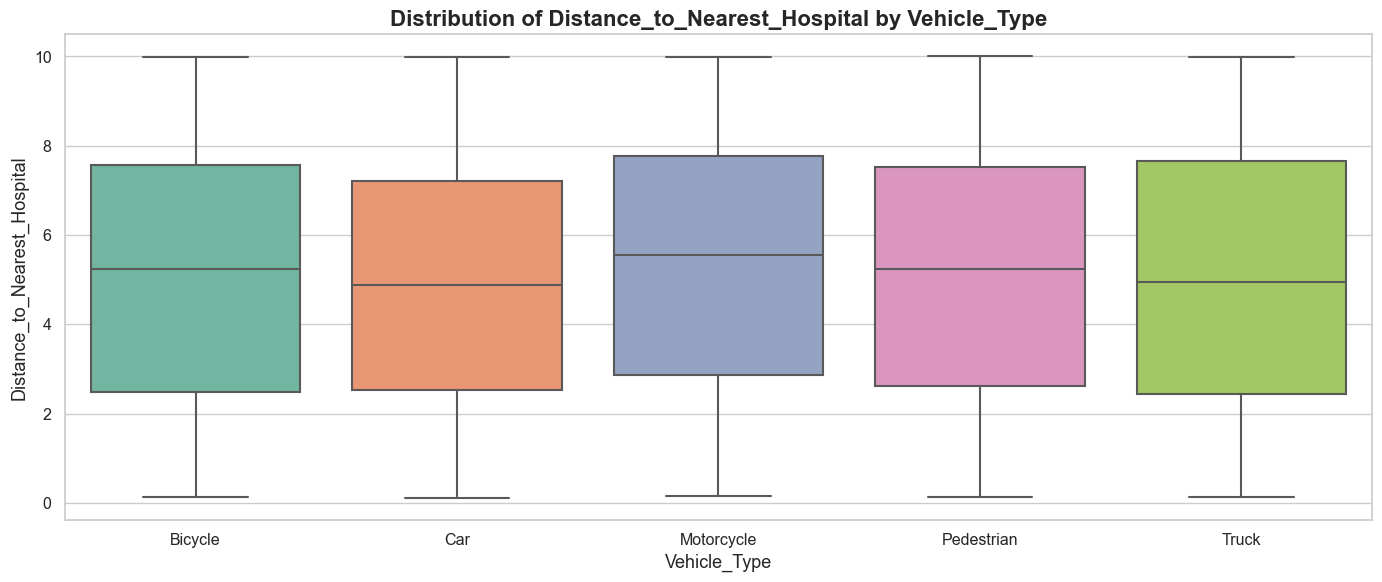

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


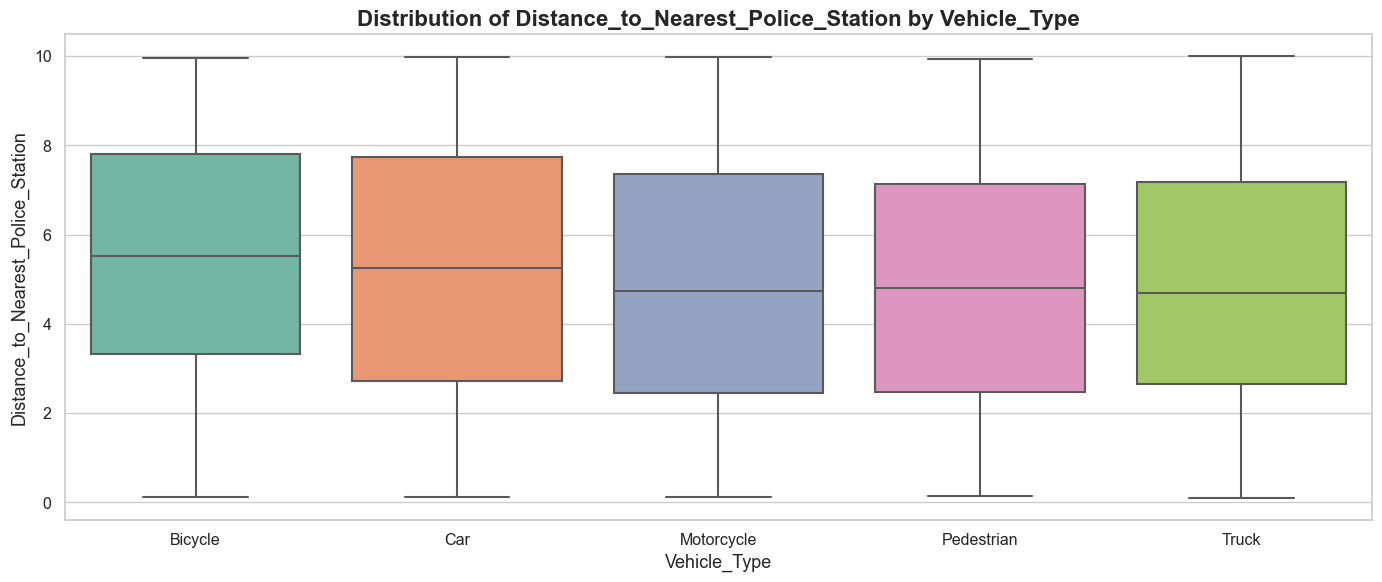

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


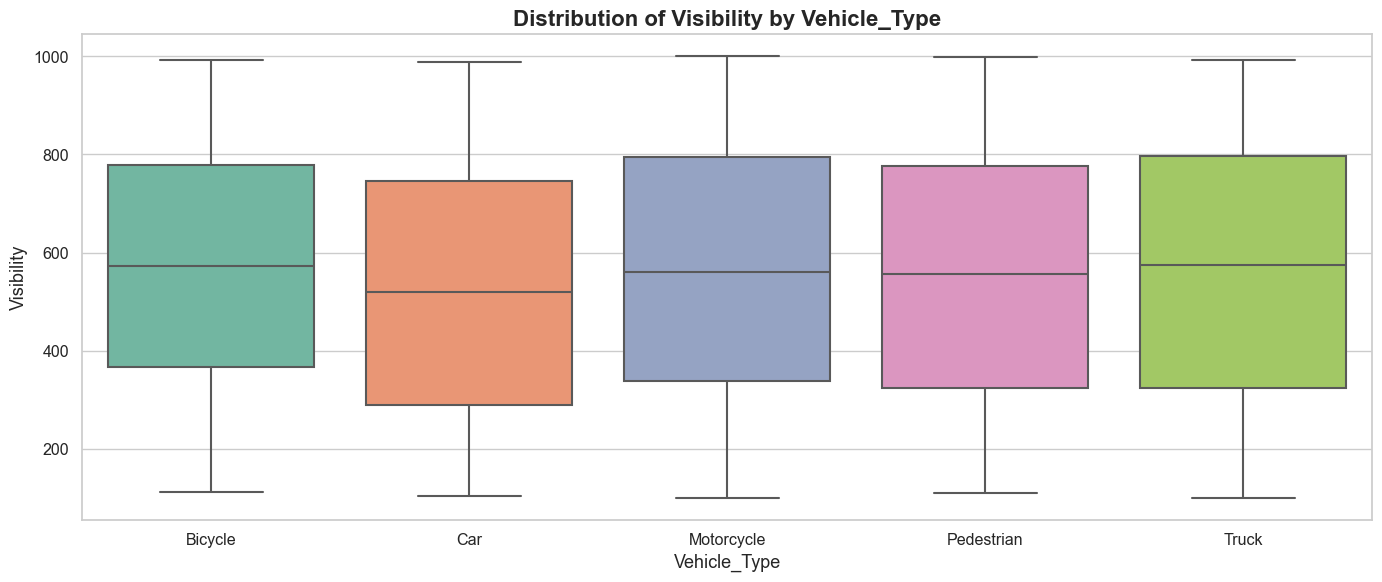

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


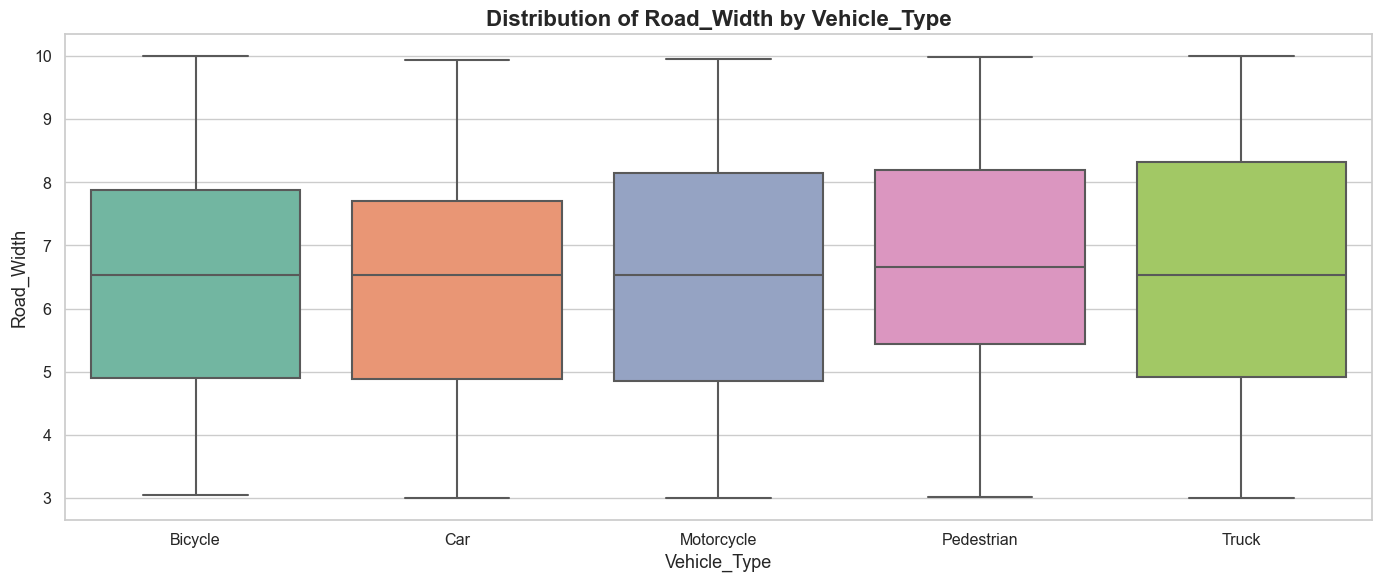

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


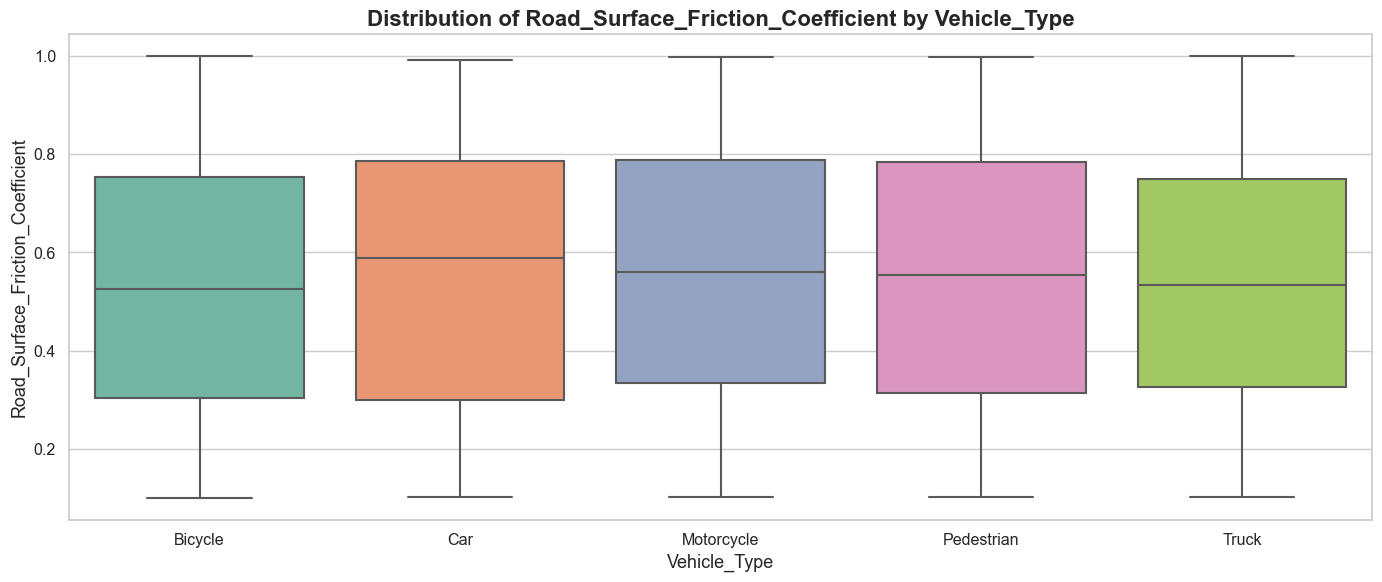

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


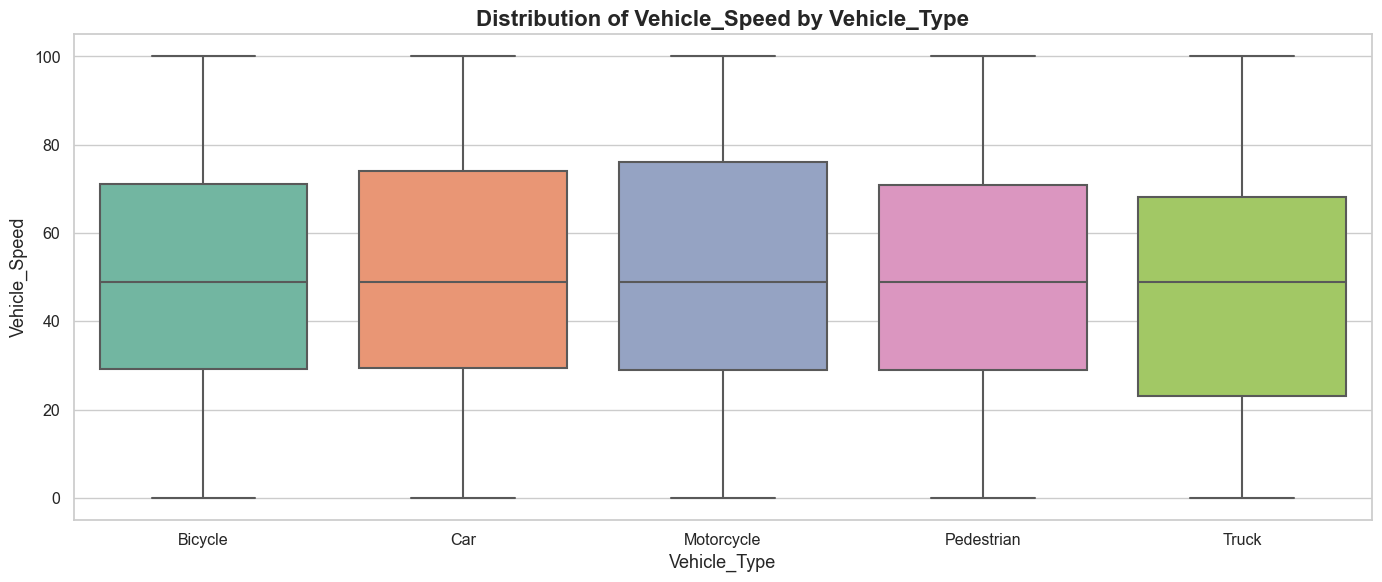

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


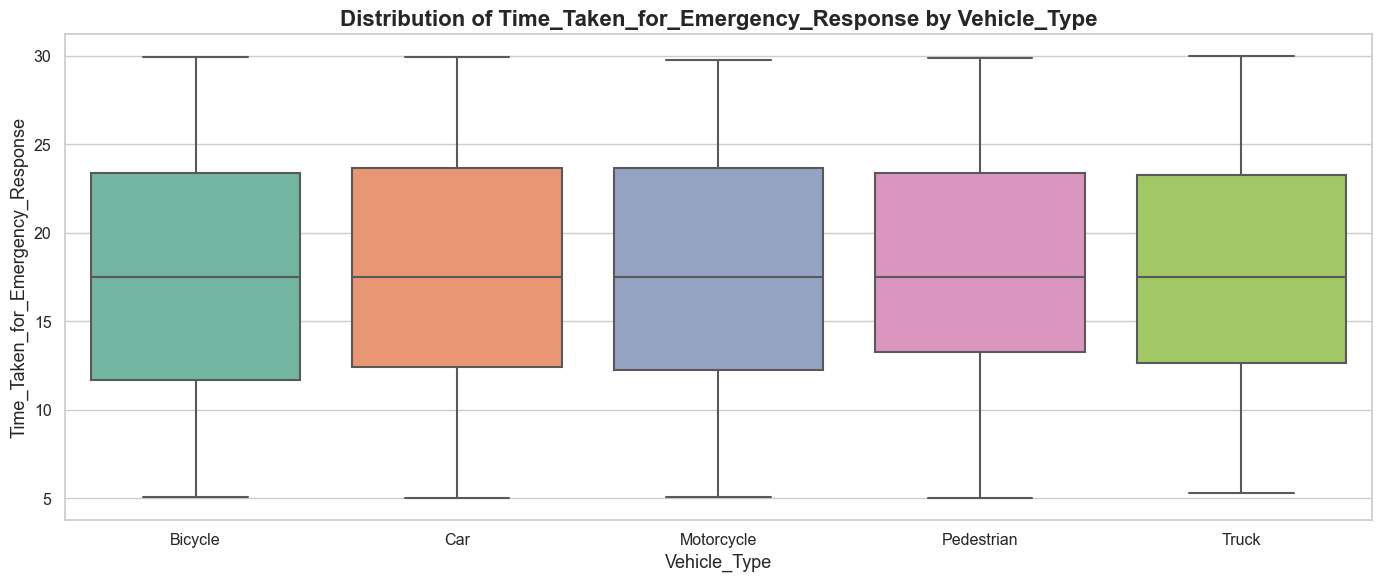

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


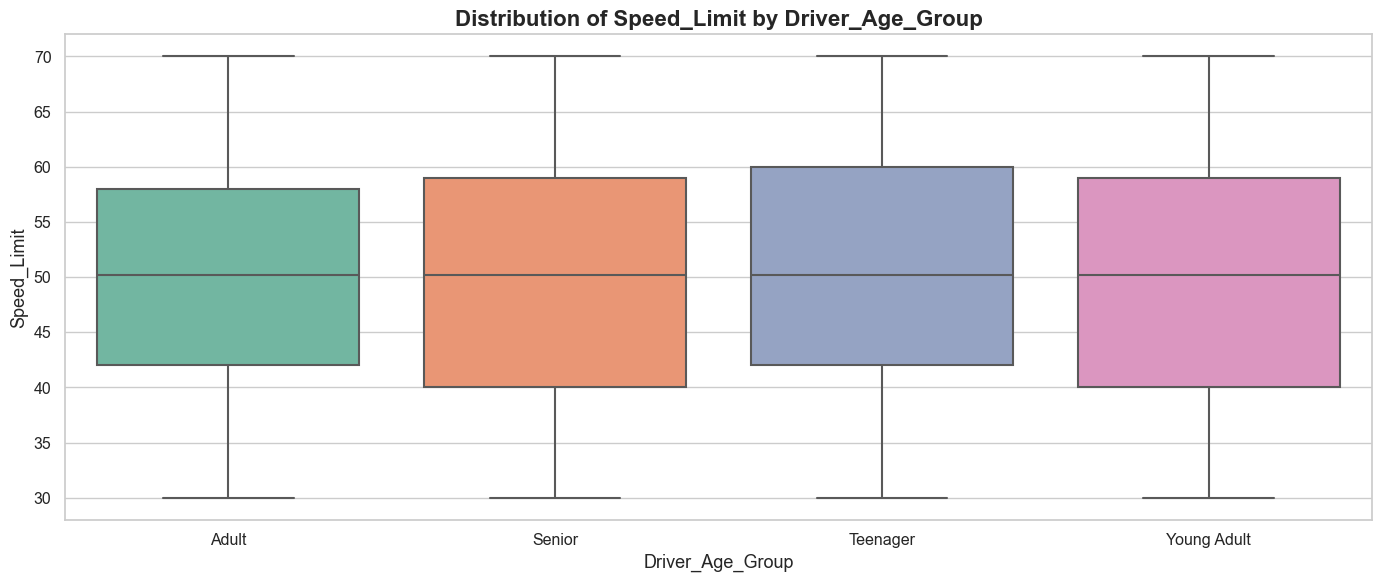

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


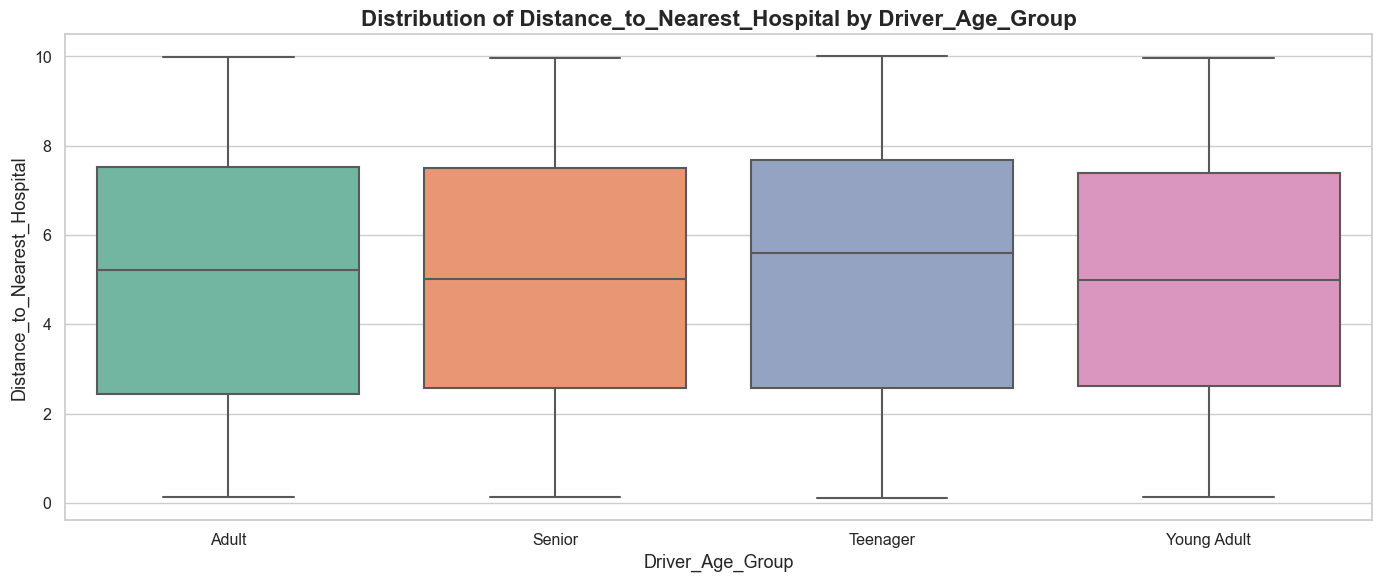

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


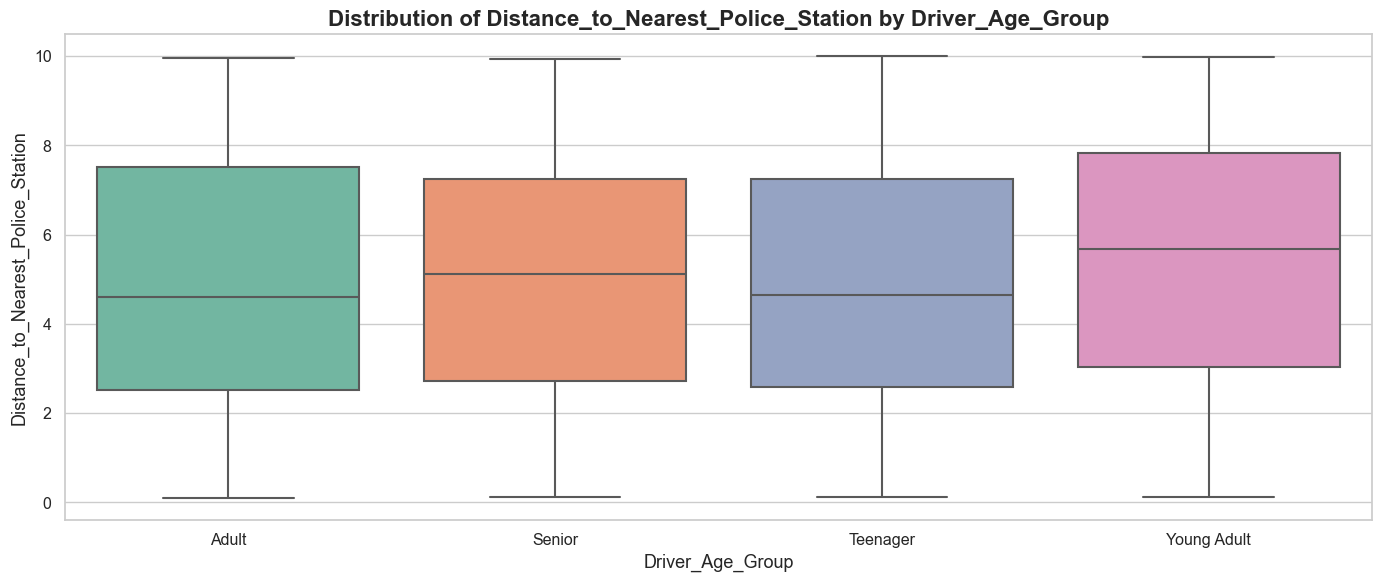

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


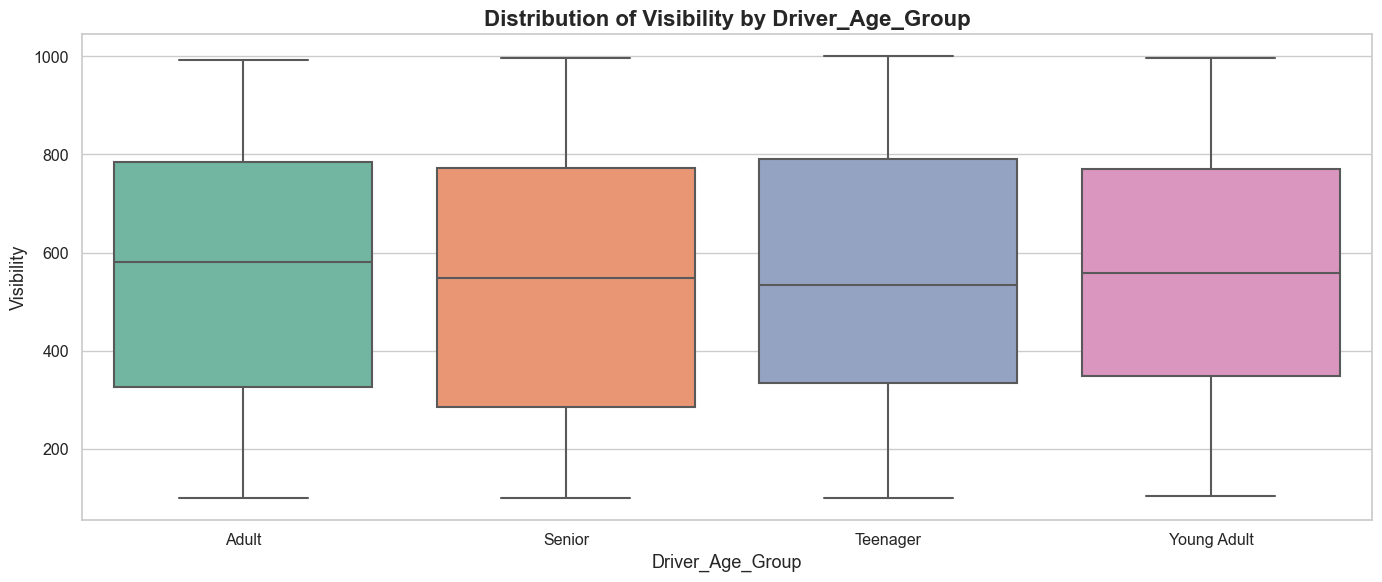

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


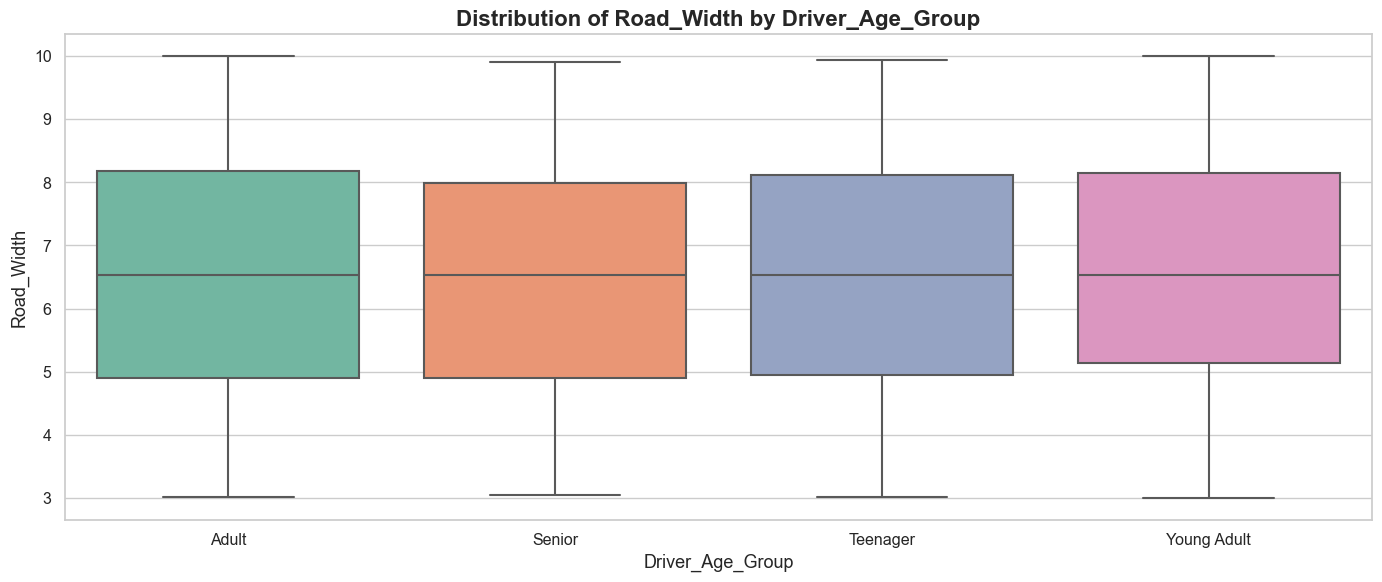

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


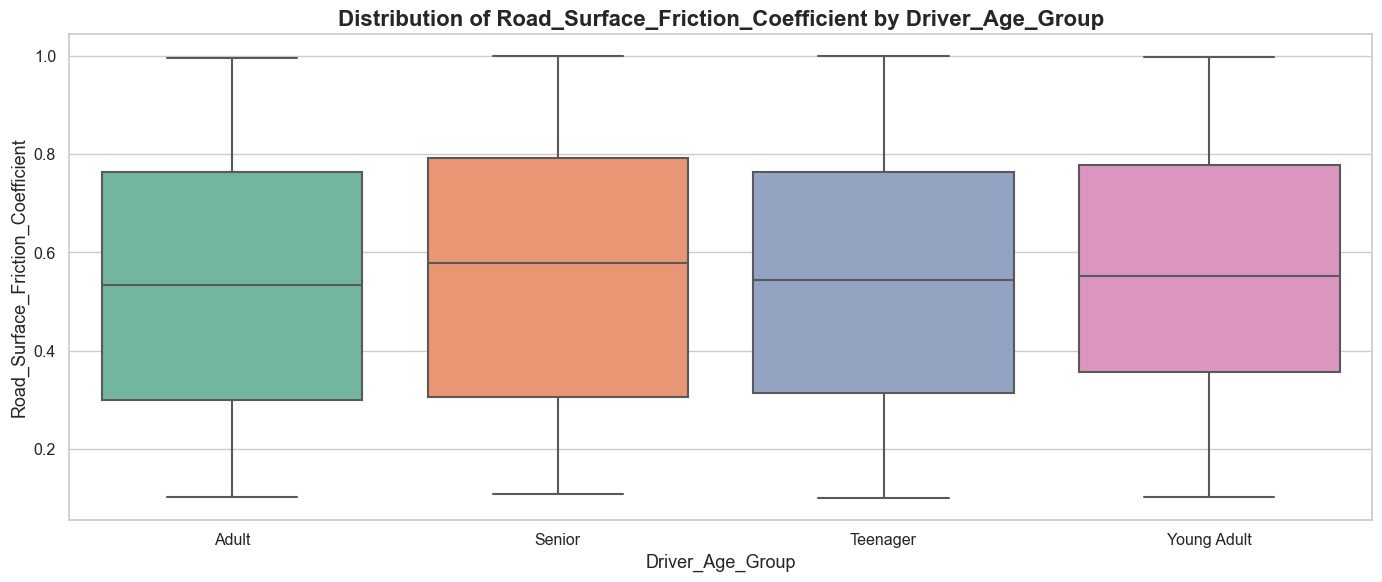

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


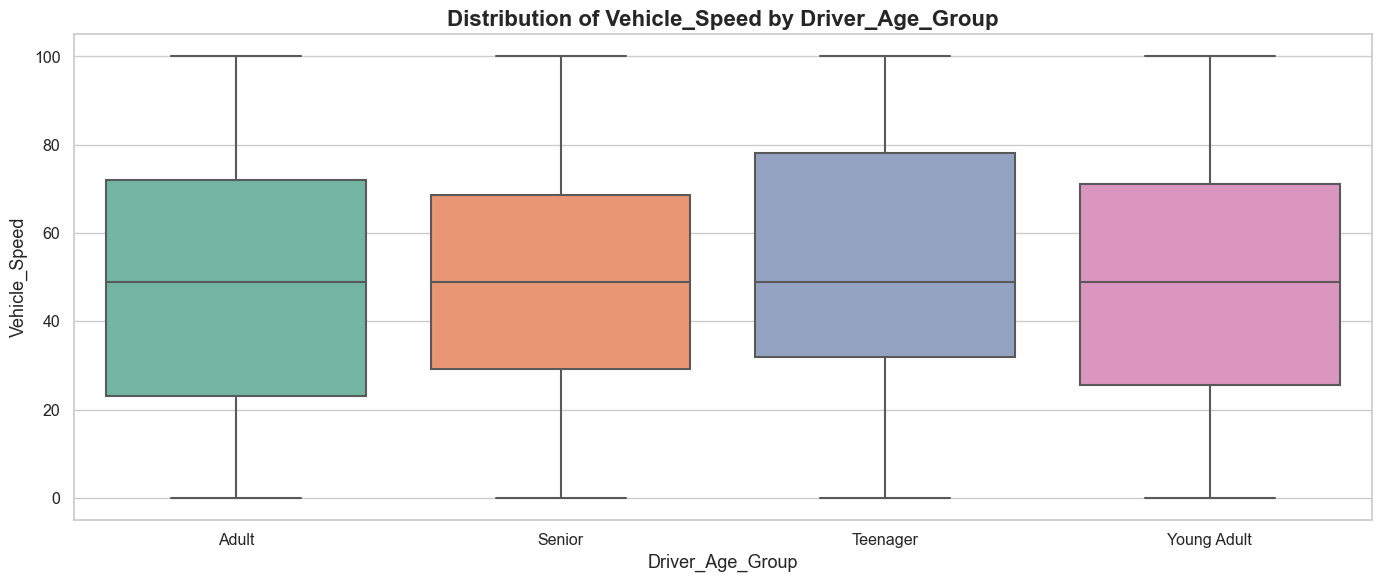

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


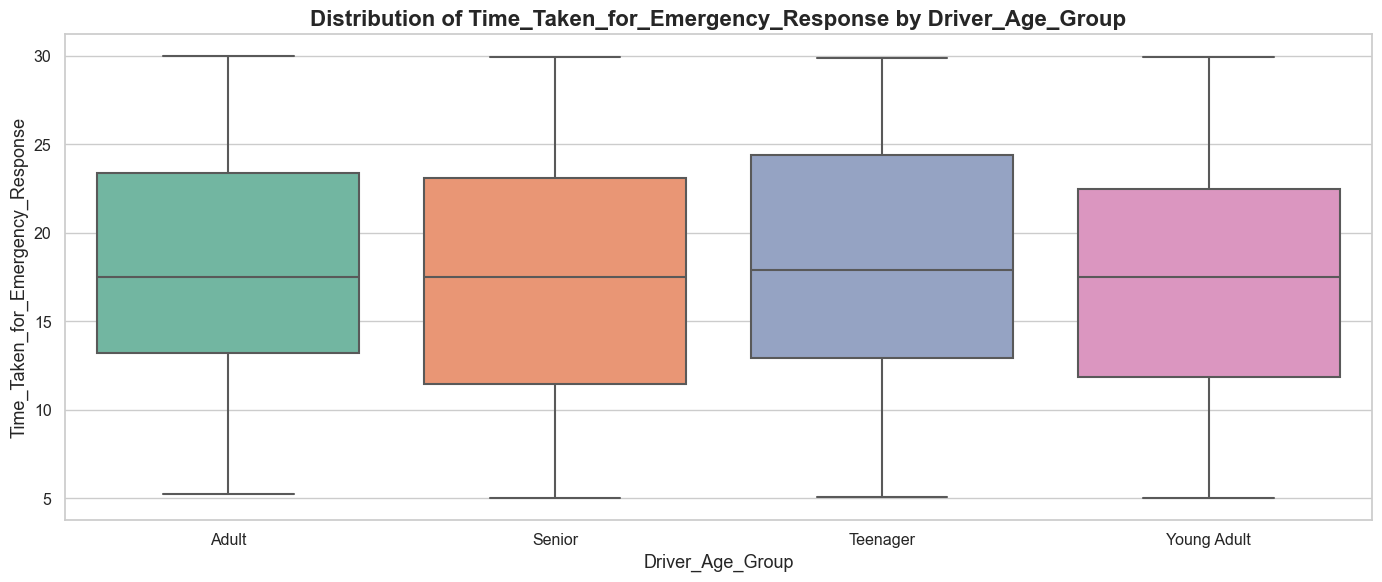

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


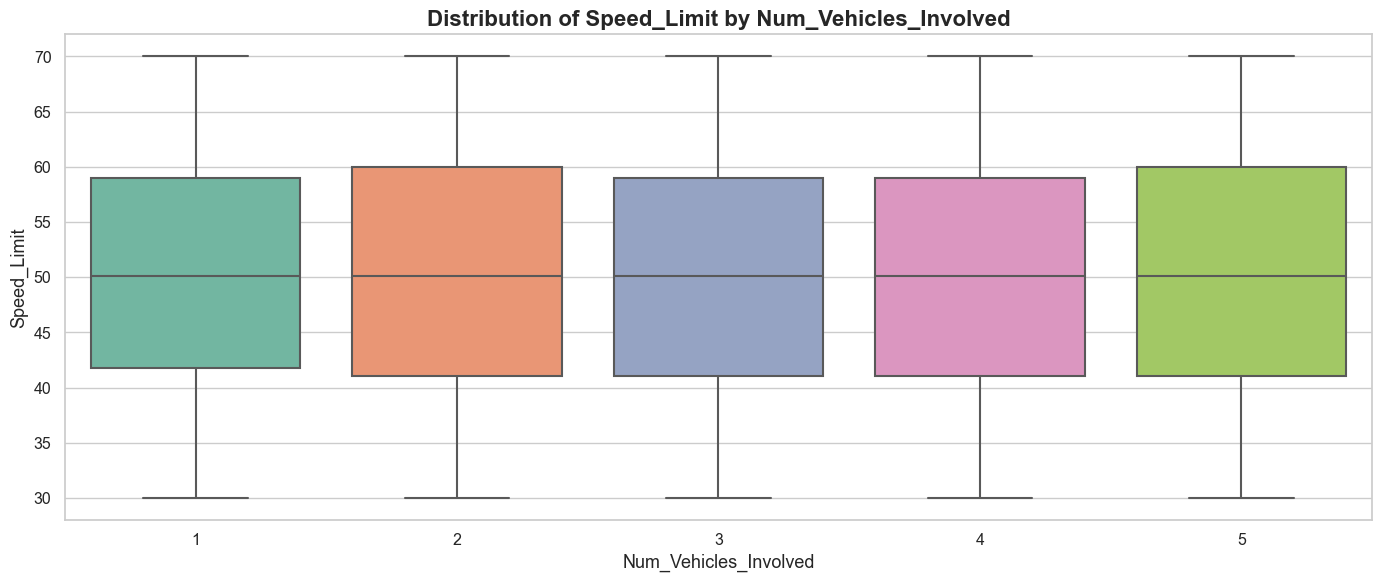

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


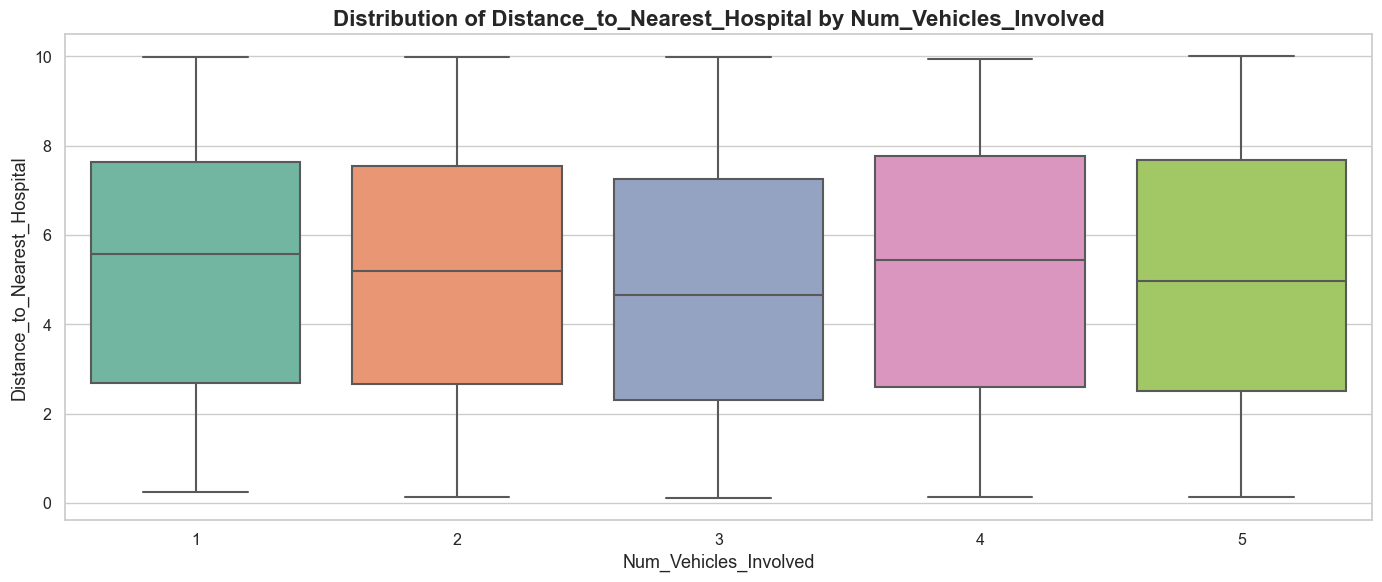

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


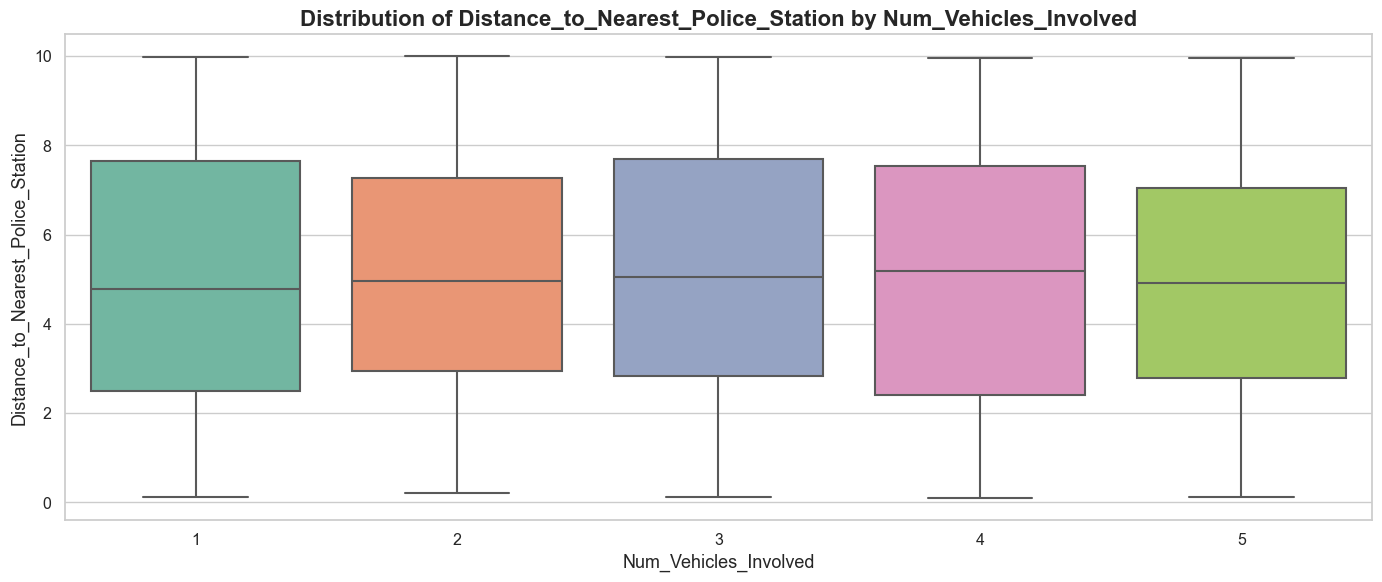

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


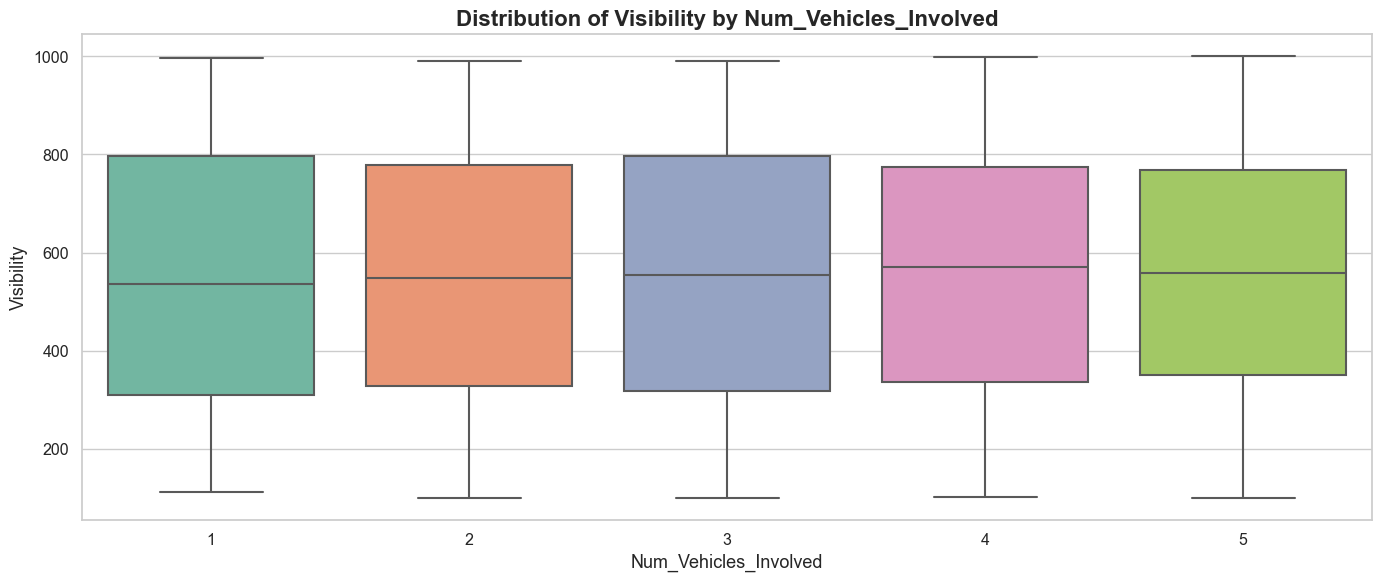

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


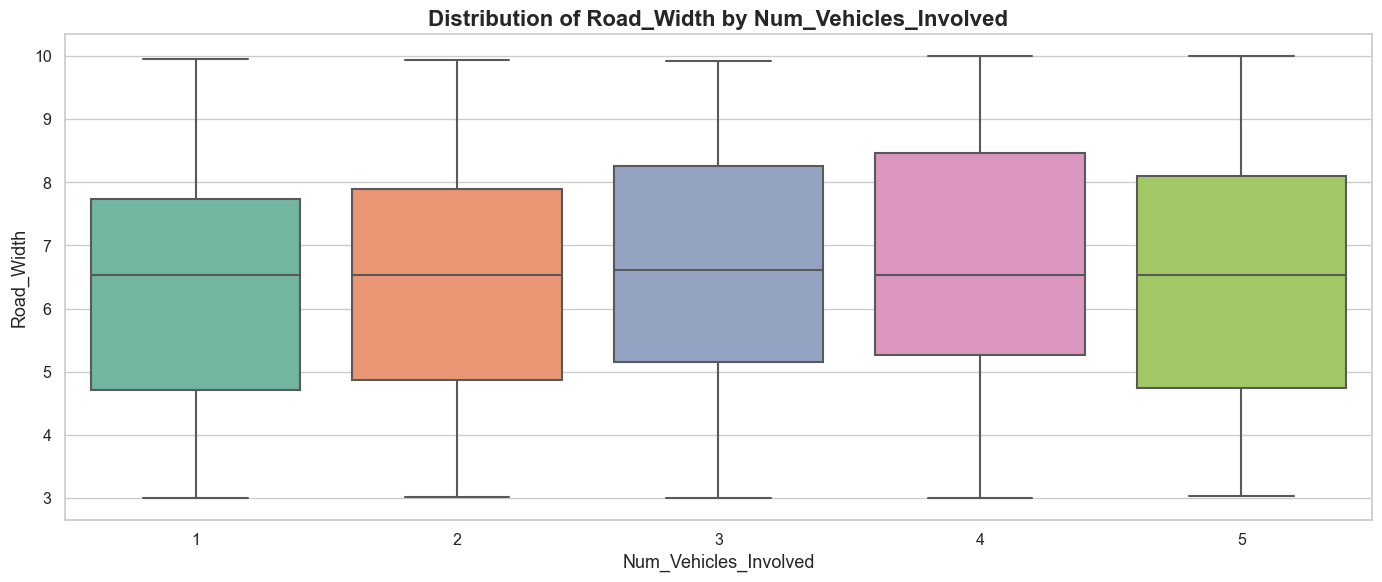

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


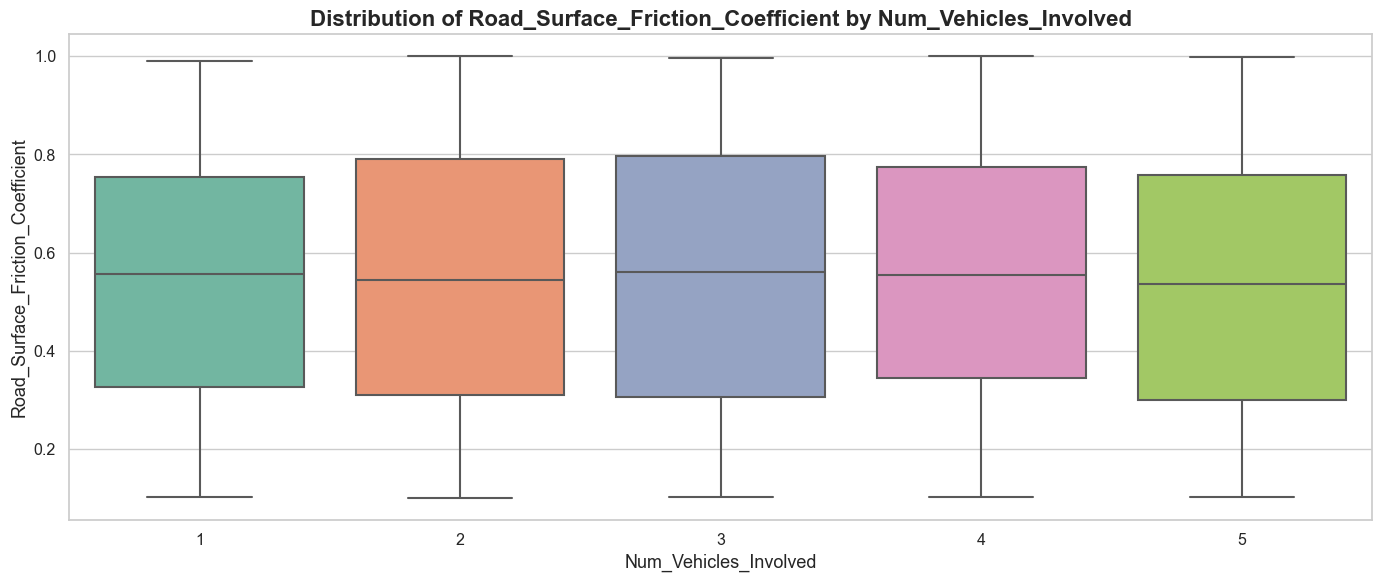

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


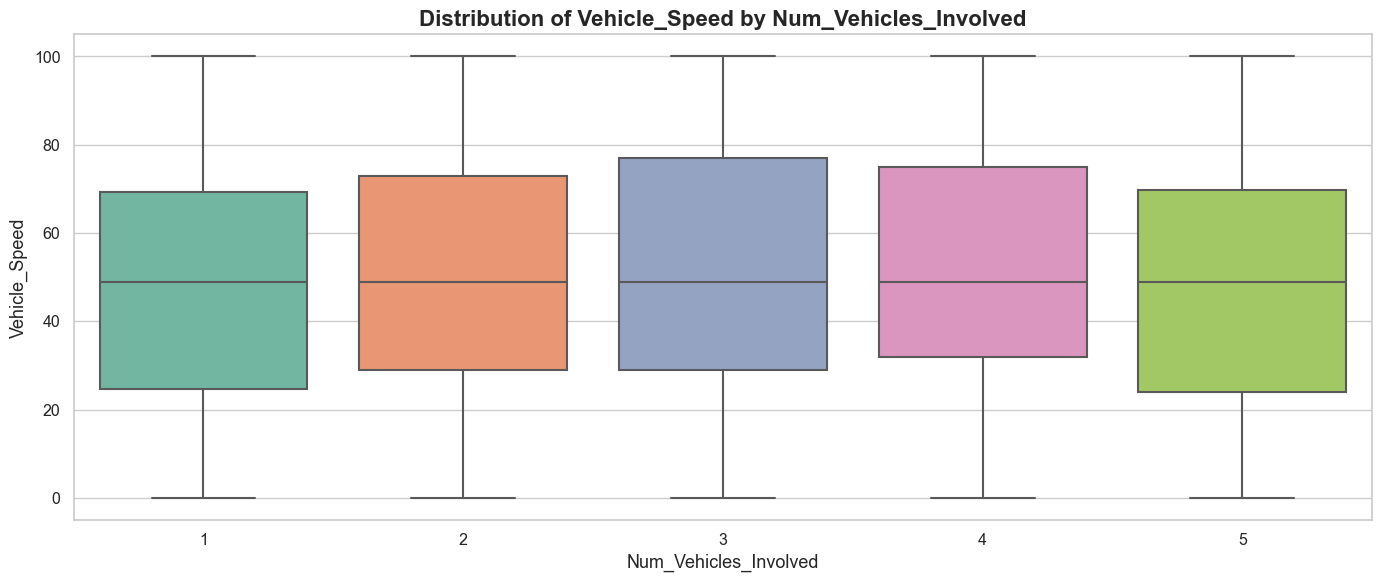

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


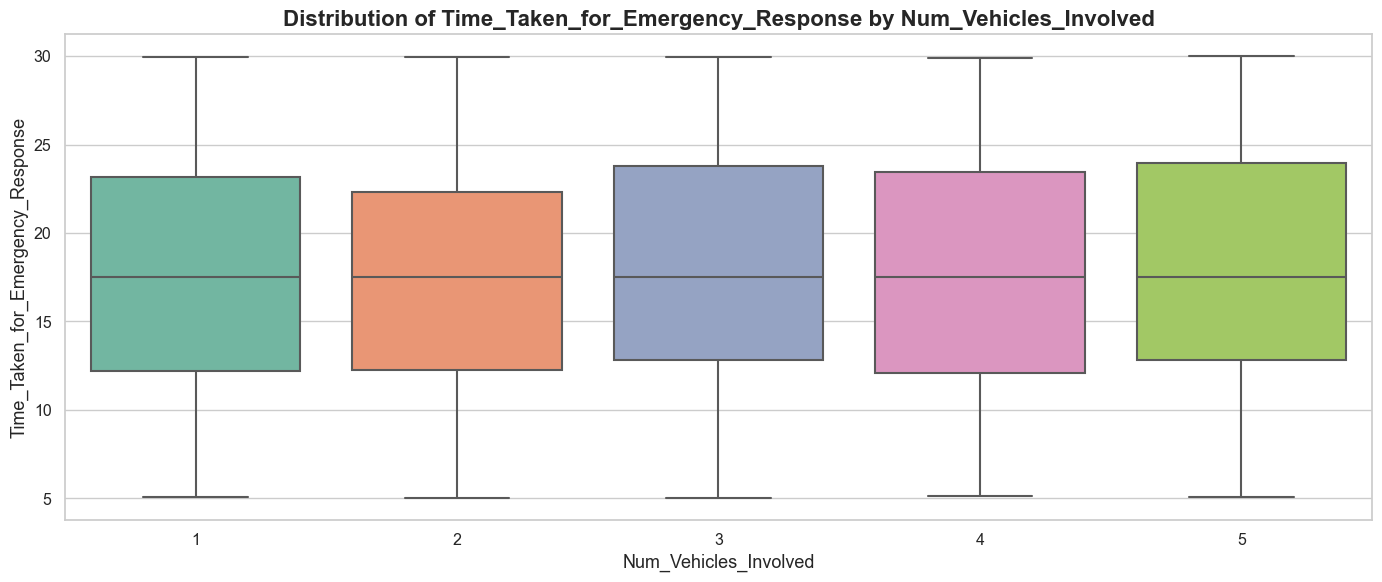

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


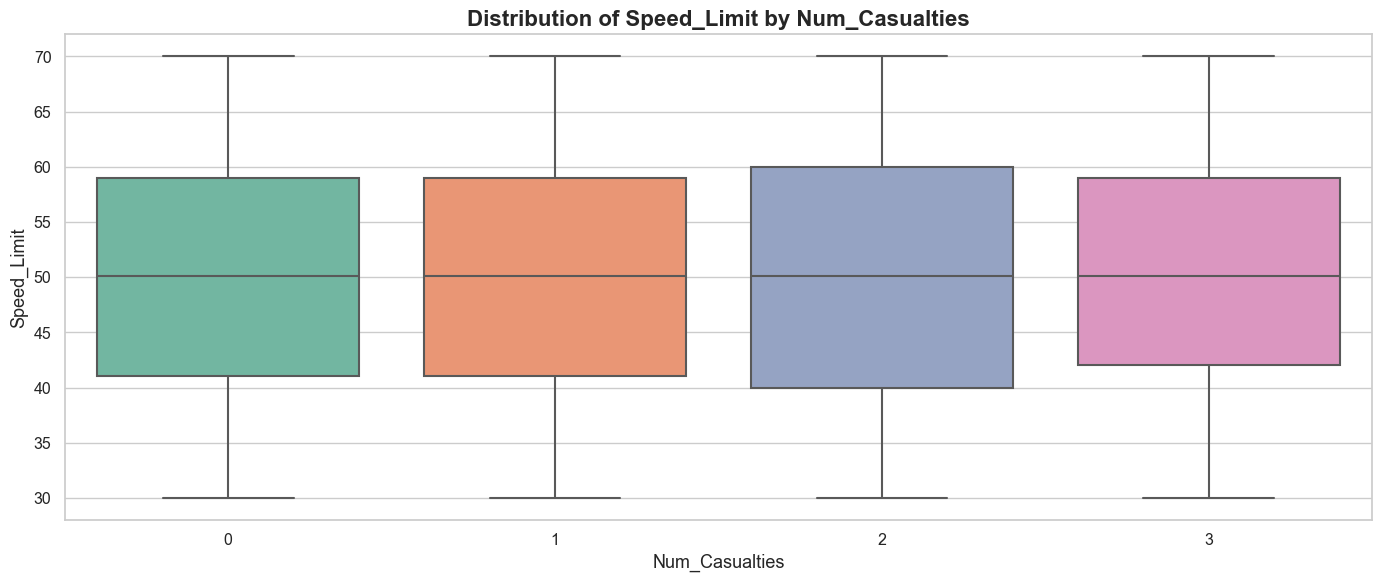

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


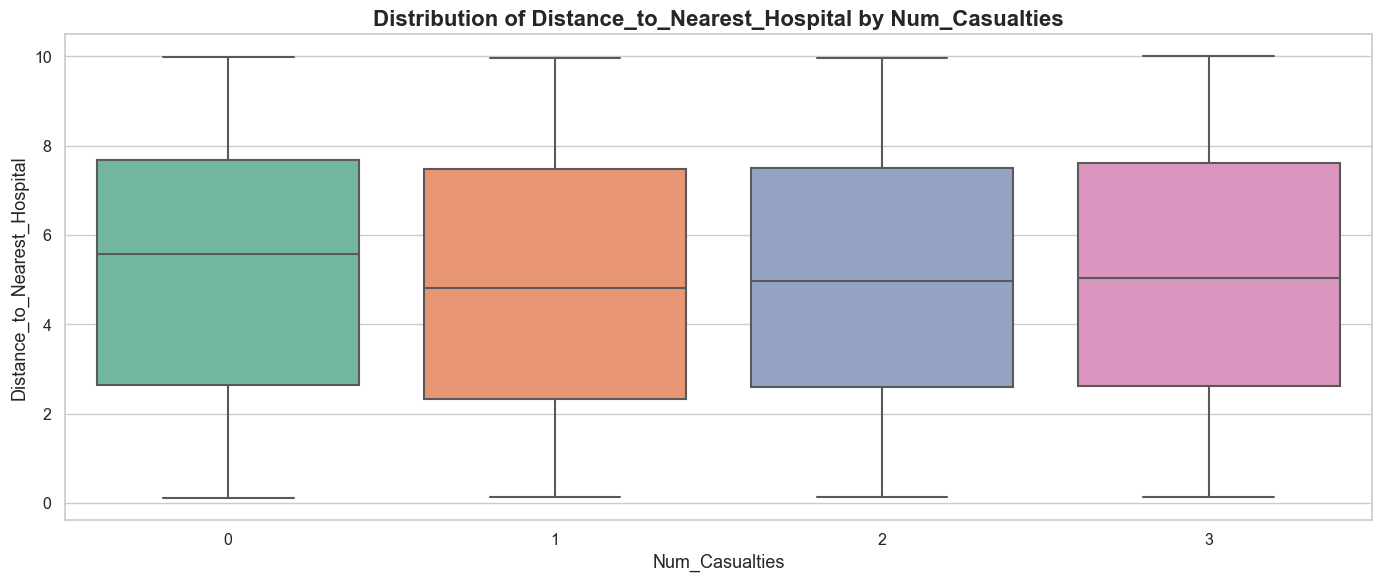

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


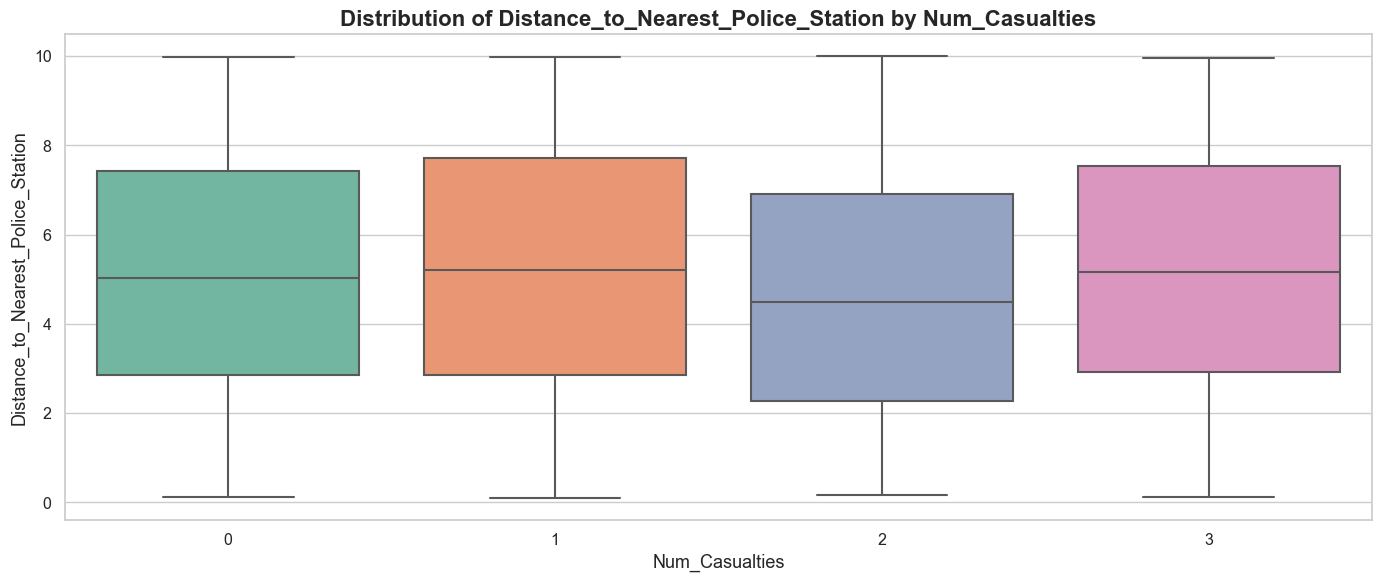

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


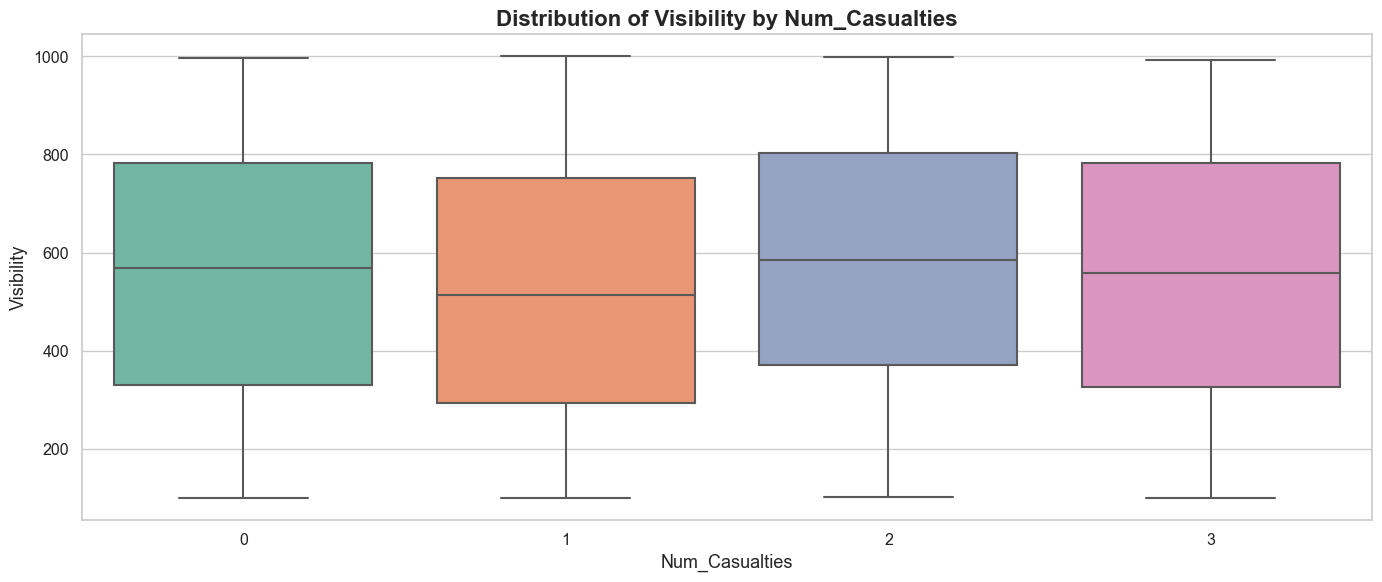

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


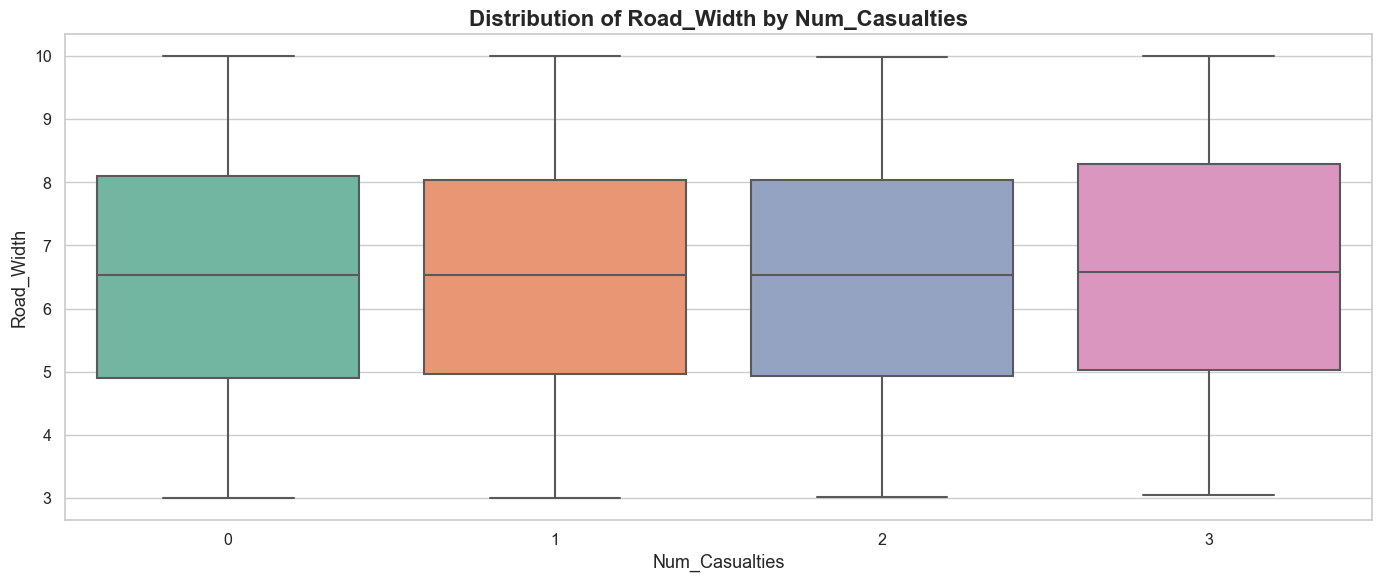

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


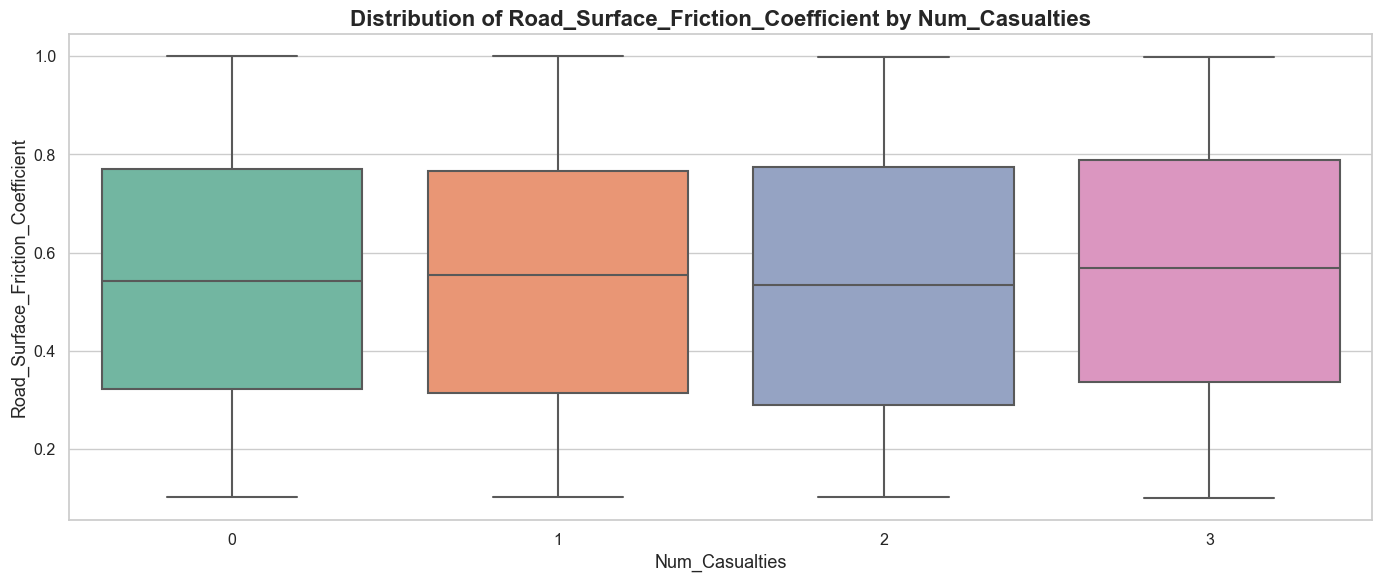

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


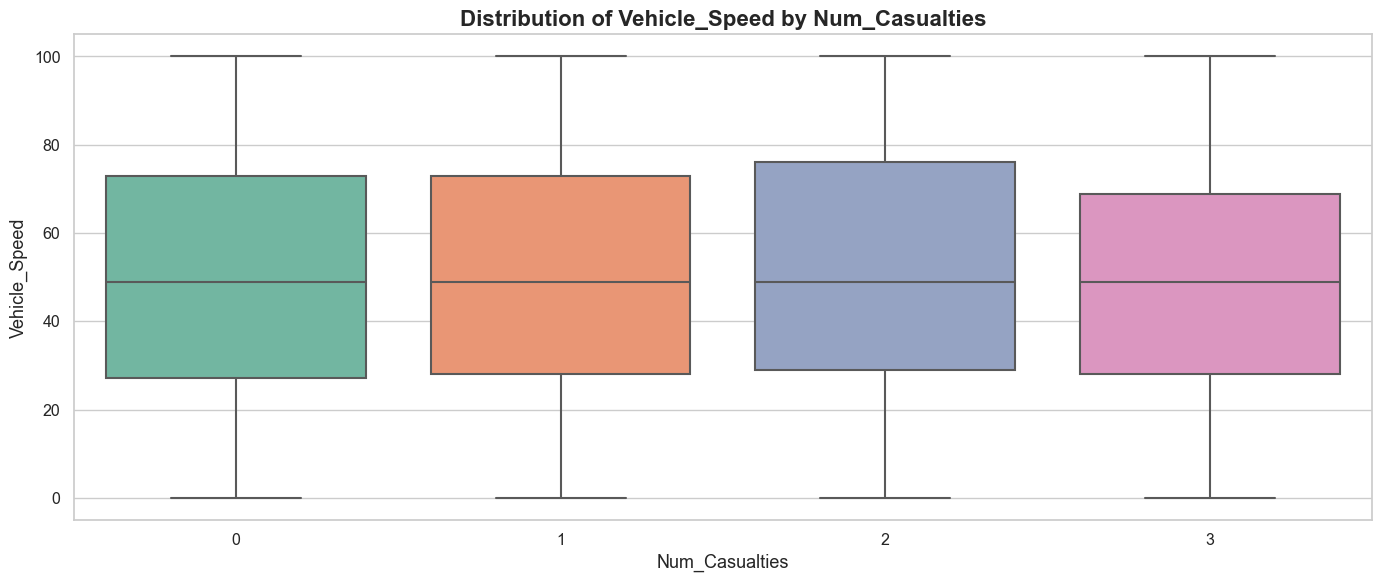

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\1802197713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


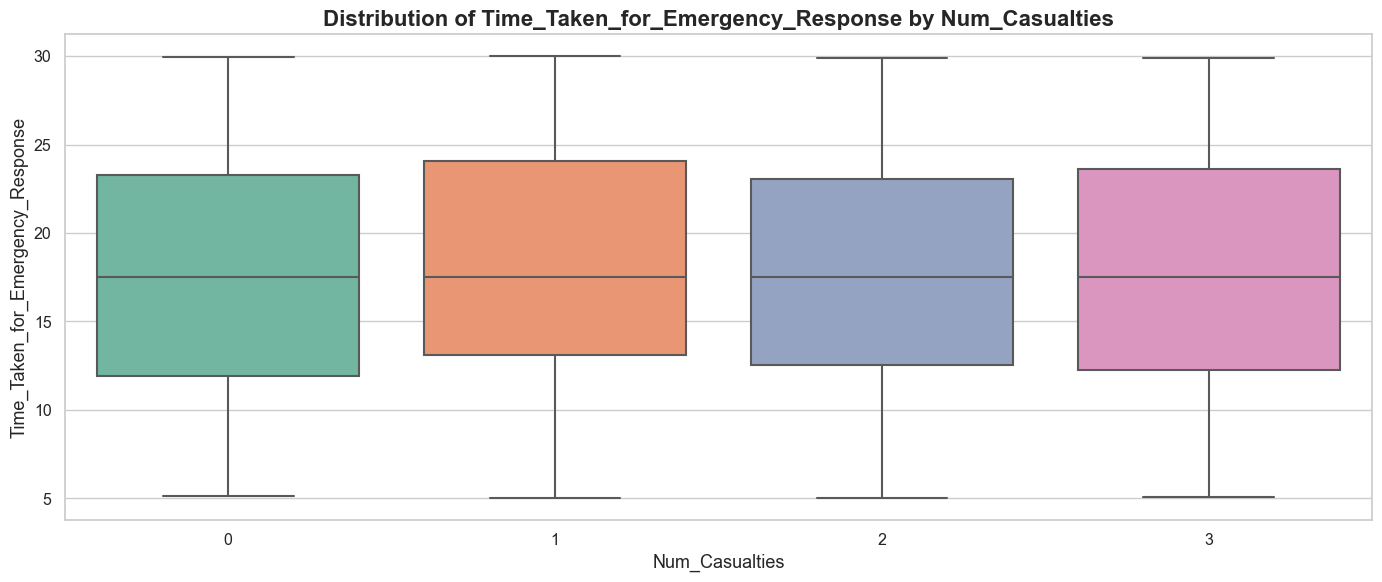

In [82]:
selected_categorical_features = main_df.select_dtypes("category")

for cat_feature in selected_categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(14, 6))
        ax = sns.boxplot(
            x=cat_feature,
            y=num_feature,
            data=main_df,
            palette="Set2",
            showfliers=True,  # set to False if you want to hide outliers
            linewidth=1.5
        )

        # Add plot title and axis labels
        plt.title(f'Distribution of {num_feature} by {cat_feature}', fontsize=16, fontweight='bold')
        plt.xlabel(cat_feature, fontsize=13)
        plt.ylabel(num_feature, fontsize=13)
        
        # Rotate x-axis labels if they are long
        plt.xticks(rotation=90 if main_df[cat_feature].nunique() > 8 else 0)

        # Improve layout
        plt.tight_layout()
        plt.show()


---
### Correlation Heatmap

To understand how numerical features relate to one another, we calculate the **Pearson correlation coefficient**  
and display it in a heatmap to identify potential multicollinearity or strong relationships.


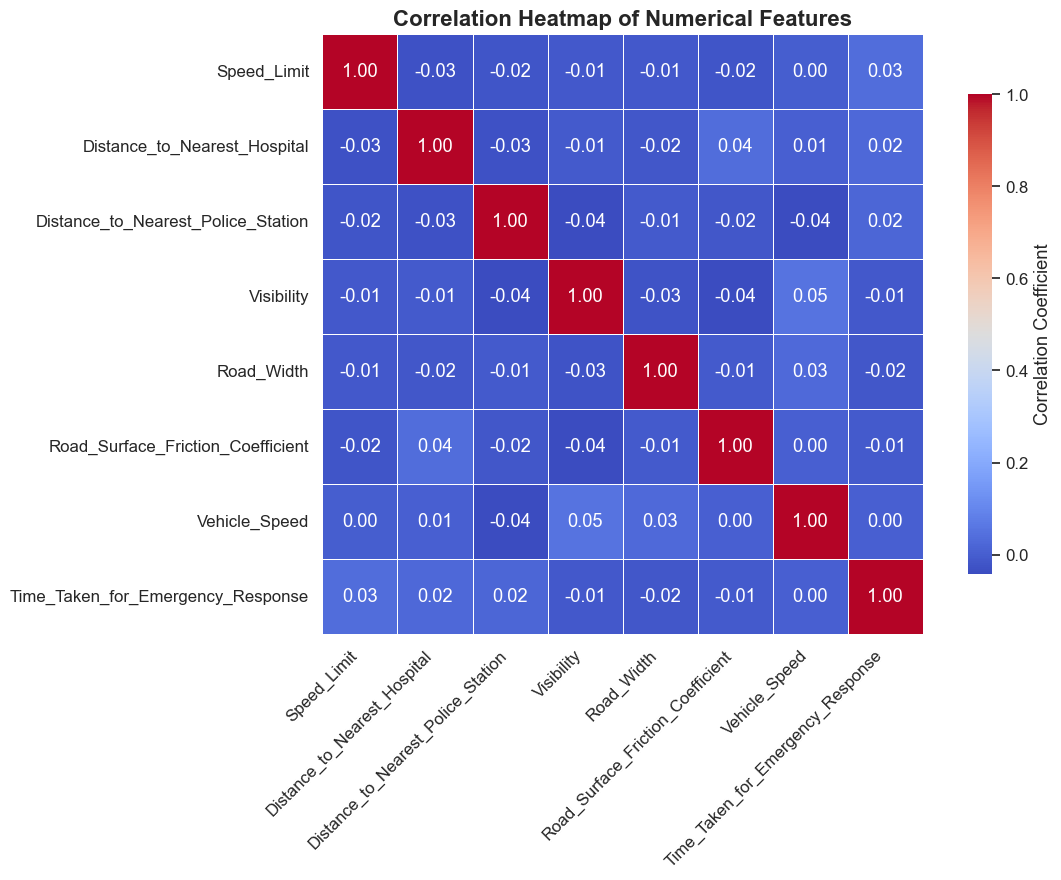

In [83]:
# Set visual style
sns.set(style="whitegrid", font_scale=1.1)

# Compute correlation matrix
correlation_matrix = main_df[numerical_features].corr()

# Create figure
plt.figure(figsize=(12, 9))

# Plot heatmap with enhancements
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',  # You can use 'viridis', 'crest', or 'YlGnBu' for alternatives
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

# Title and styling
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---
### Categorical Feature Distributions

We visualize the frequency of each category using countplots.  
This helps detect class imbalance or dominant categories in features.


C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


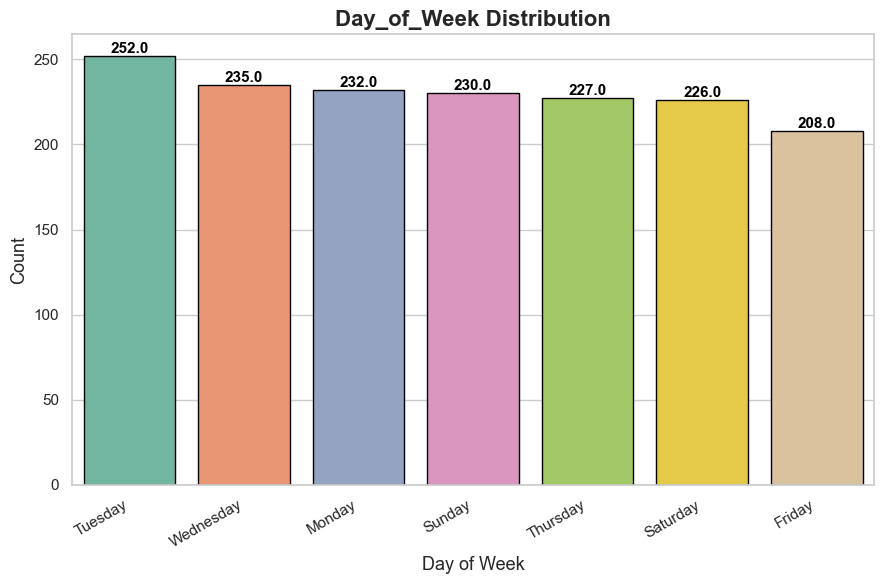

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


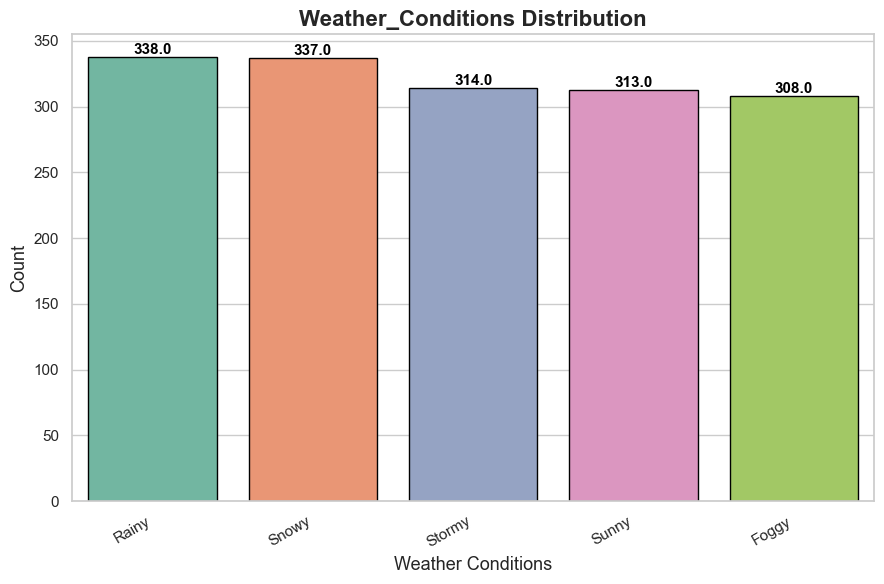

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


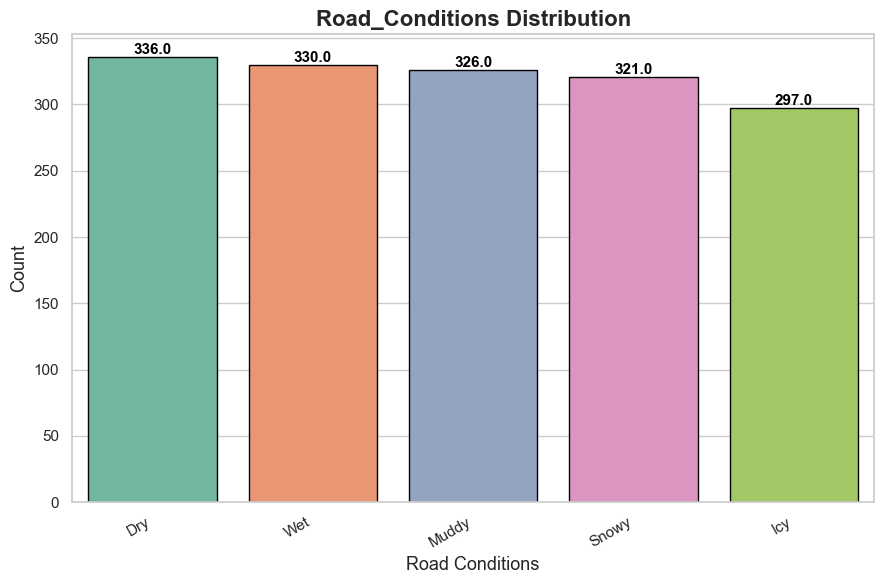

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


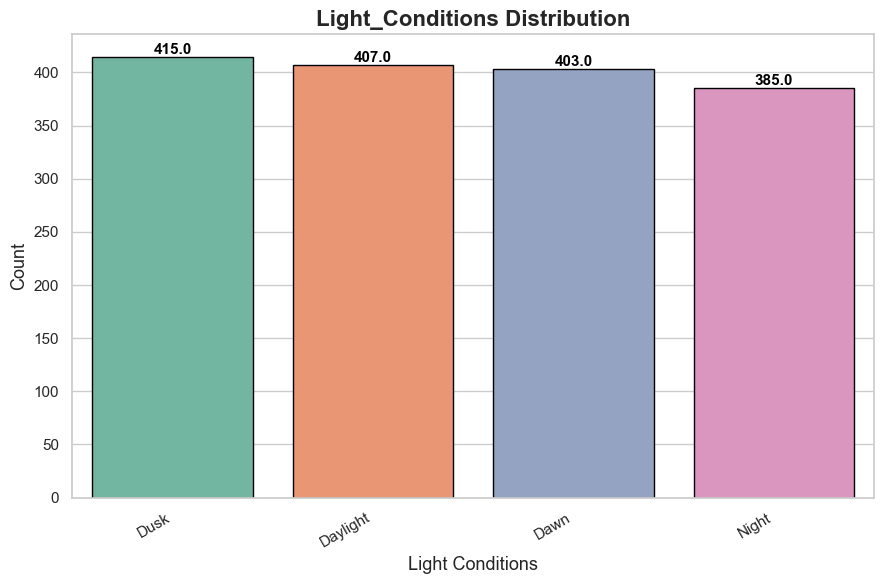

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


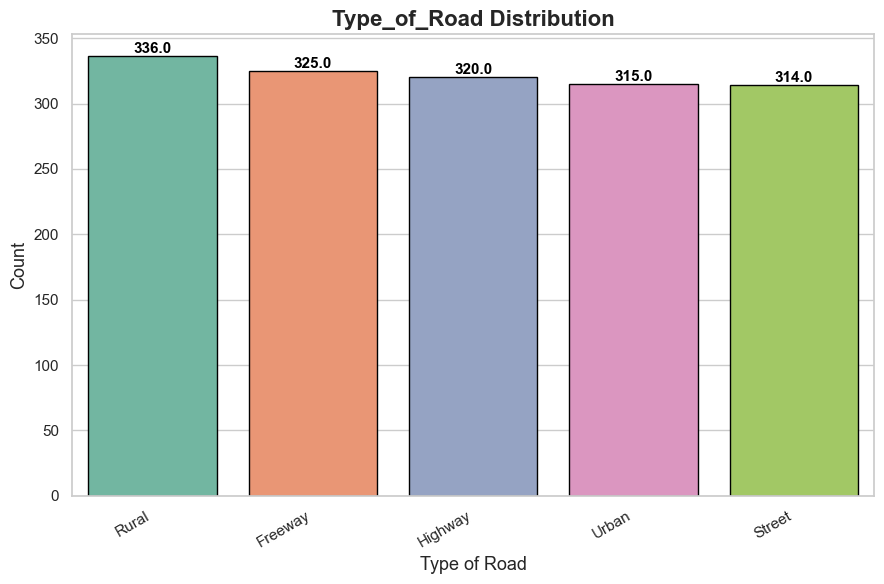

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


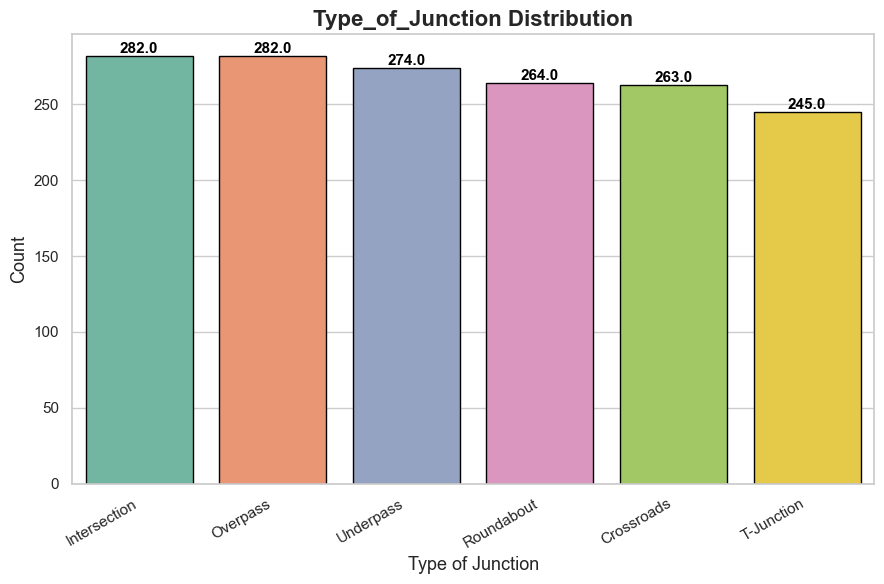

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


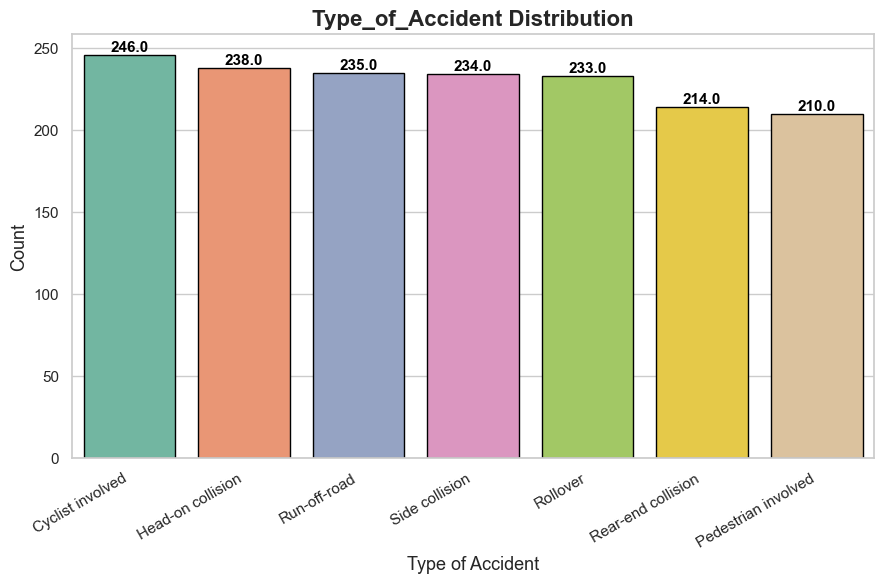

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


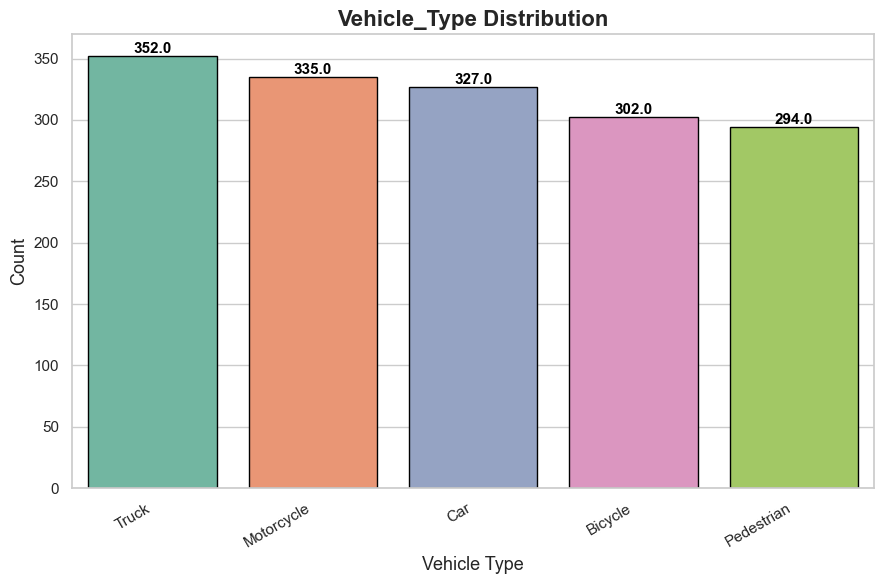

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


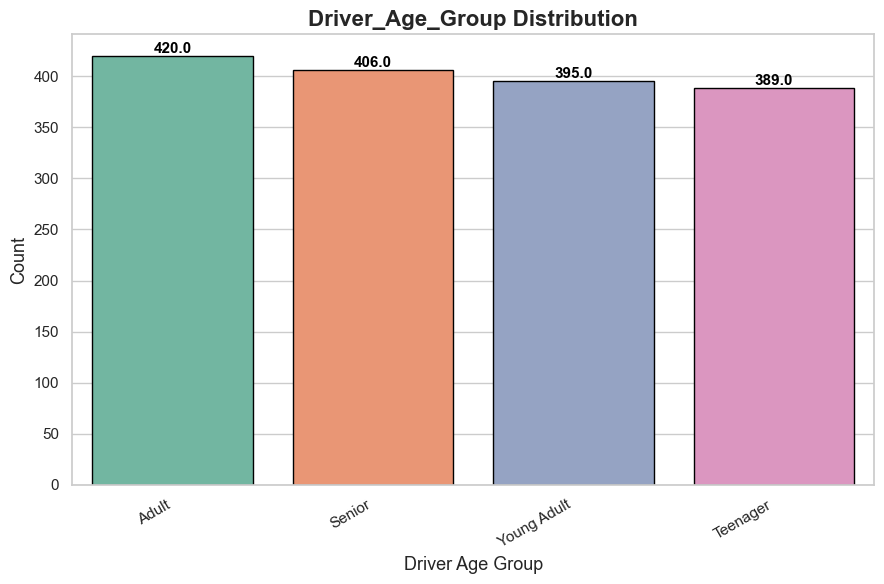

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


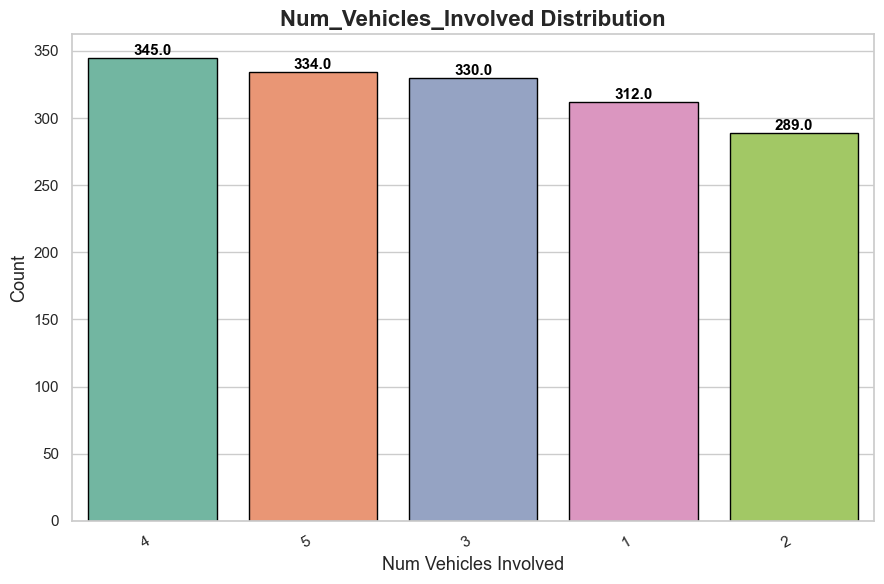

C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2476113068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


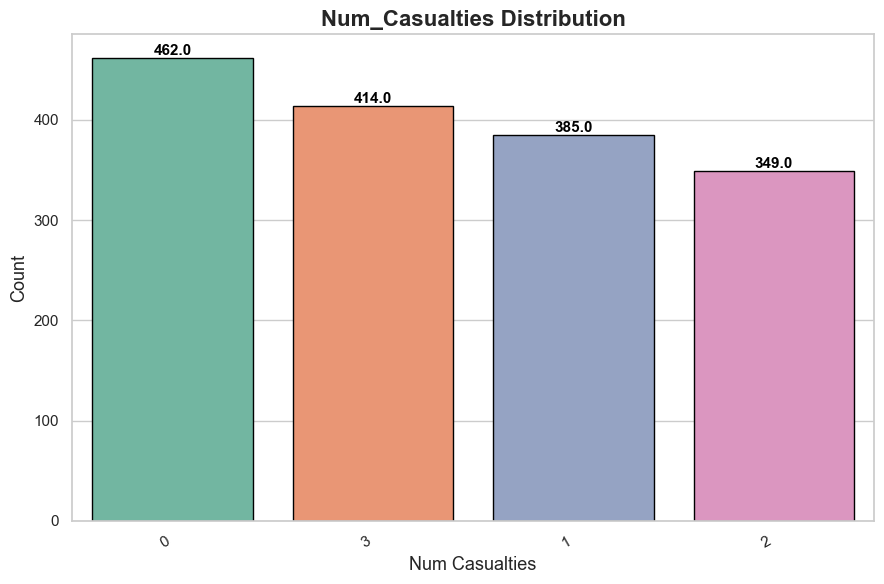

In [84]:
# Set overall Seaborn style for clean visuals
sns.set(style="whitegrid", palette="pastel")

# Loop through each categorical feature and create a count plot
for col in selected_categorical_features.columns:
    plt.figure(figsize=(9, 6))

    # Sort categories by frequency for better readability
    order = main_df[col].value_counts().index

    # Create a count plot
    ax = sns.countplot(
        x=col,
        data=main_df,
        order=order,
        palette="Set2",  # Professional and soft color palette
        edgecolor='black'
    )

    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height}', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=11, fontweight='semibold', color='black'
        )

    # Set plot title and axis labels
    plt.title(f"{col} Distribution", fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' '), fontsize=13)
    plt.ylabel("Count", fontsize=13)

    # Rotate x-axis labels if too long
    plt.xticks(rotation=30, ha='right')

    # Improve layout to avoid overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

---
### Average Emergency Response Time by Day of the Week

We analyze how response times vary across the week.  
This may reveal operational delays or efficiencies in emergency services.


C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2632023411.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Ahmed Sobhy\AppData\Local\Temp\ipykernel_29312\2632023411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


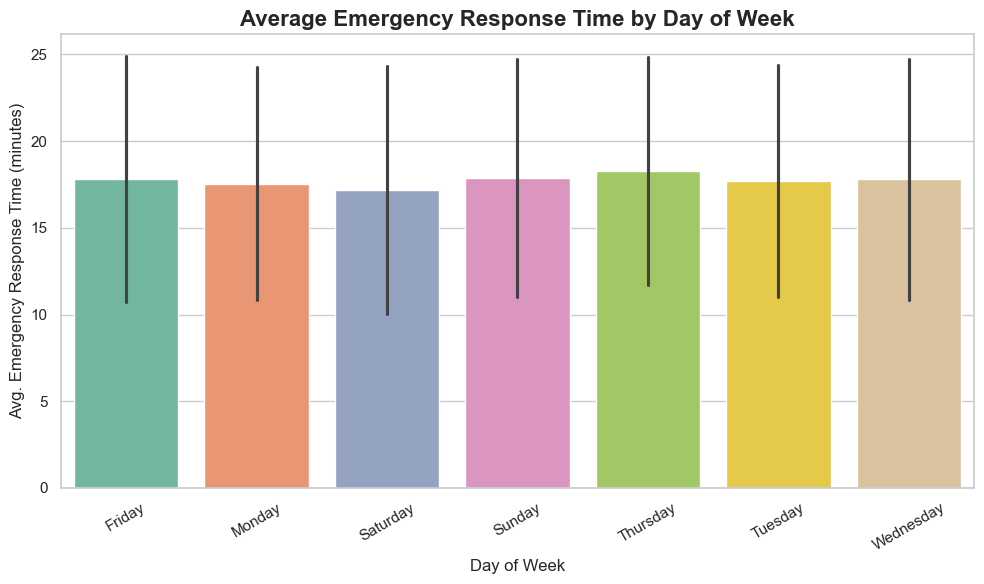

In [85]:
# Barplot: Average response time by day of week
plt.figure(figsize=(10, 6))
sns.barplot(
    data=main_df,
    x="Day_of_Week",
    y="Time_Taken_for_Emergency_Response",
    estimator="mean",
    ci="sd",  # Show standard deviation as error bars
    palette="Set2"
)
plt.title("Average Emergency Response Time by Day of Week", fontsize=16, fontweight="bold")
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Avg. Emergency Response Time (minutes)", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()